# Voorwoord

Voor u ligt de Jupyter Notebook ter afronding van de module IPBDAMH aan de Hogeschool Leiden. Dit rapport is geschreven in opdracht van de Hogeschool, voor Provinciehuis Zuid-Holland. In de afgelopen tien weken zijn de projectleden aan de slag gegaan met het onderzoeken van data voor de organisatie, met als doel om voor het bedrijf een beslis ondersteunend op te zetten voor bedienaren.  

We willen graag een aantal personen bedanken die meegeholpen hebben bij de vooruitgang van het project. We willen Chaimae, Stefan en Herman bedanken voor het opzetten van het toffe project en de ondersteuning tijdens de lessen met de opdracht. We willen Rob, Michael en Daniël bedanken voor alle tijd die ze hebben vrijgemaakt om dit project voor ons mogelijk te maken, en hun kennis en kunde te delen om onze expertise te vergroten. 

Wij wensen u veel leesplezier. 

Raul Mihalca 

Edwin van Leeuwen 

# Inleiding

Scheepvaart is een belangrijk begrip als het gaat om de wereldhandel. Maar liefst 90 procent van het verkeer en vervoer van goederen, mensen en dieren gaat over water. Dit aandeel geeft maar aan hoe groot het belang is van scheepvaart. Scheepvaart kan je onderscheiden tussen beroepsvaart en pleziervaart en kan gaan over zeevaart, binnenvaart en visserij.  

Door de technologische ontwikkelingen is er veel data beschikbaar over schepen en creëren schepen ook steeds meer en meer data. Zo houden beroepsvaartschepen hun gps-locaties bij waar ze varen (AIS). Zijn er meetpunten langs de vaarwegen die werken middels LIDAR (laser) en telt schepen, richting en lengte. Ook zijn er meetpunten op de slagbomen en lampen van bruggen waar schepen varen om te bepalen of de brug open is.  

Door de enorme hoeveelheid toegenomen data tegenwoordig, is het de vraag voor organisaties wat ze daar allemaal mee kunnen doen. De primaire focus moet liggen op het opslaan, verwerken en analyseren van de data. Het op basis van data, analyses uitvoeren wordt steeds belangrijker voor een organisatie. Data is het nieuwe olie voor het verbeteren van processen, verhogen van de omzet en winst binnen organisaties. 

De organisatie waar deze Jupyter Notebook voor is geschreven is Provinciehuis Zuid-Holland. Provinciehuis Zuid-Holland richt zich op veel verschillende onderdelen in de samenleving in de omgeving Zuid-Holland. Zo zijn actuele onderwerpen waar Provinciehuis Zuid-Holland mee bezig zijn 'nieuwe voorzieningen en extra parkeerplaatsen voor Veerhalte Veerweg' en 'RijnlandRoute'. In deze Jupyter Notebook wordt onderzoek gedaan voor Provinciehuis Zuid-Holland naar de tijden dat de schepen bij de bruggen aankomen in omgeving Leiden om de scheepvaart ongehinderd door te laten gaan, m.u.v. hulpdiensten, storingen en werkzaamheden.  

Om het onderzoek uit te kunnen voeren is er een hoofdvraag opgesteld, die als volgt luidt: 

“Hoe betrouwbaar is te voorspellen wanneer de schepen bij de bruggen in en rondom Leiden aankomen?” 

# Verkennende Analyse:

Allereerst beginnen we met het importeren van de pandas files en de mogelijkheden instellen dat we alle functies krijgen om een dataframe te beheren.

In [1]:
import pandas as pd
from IPython.display import display
import folium

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

Testen van het uitlezen van één parquet filebestand.

In [2]:
df_parquet = pd.read_parquet(r'C:\temp\comm-ais-2021-september.parquet\day2=2021-09-20\part-00001-tid-4130866538564398649-490aff5c-4c83-4962-9a29-8bcb624c5d49-1534-20.c000.snappy.parquet', engine='pyarrow')

df_parquet.head()

,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,517328.354579,None,4.499780,52.158548,"{'coordinates': [4.49978, 52.158548333333336], 'type': 'Point'}",190.8,1632147173000,PASSENGER,UNDER_WAY_USING_ENGINE,3.5,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
1,670286.769626,None,4.533343,52.143752,"{'coordinates': [4.533343333333334, 52.14375166666667], 'type': 'Point'}",292.3,1632141832999,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,517328.354579,None,4.499305,52.156885,"{'coordinates': [4.4993050000000006, 52.156885], 'type': 'Point'}",189.8,1632150783000,PASSENGER,UNDER_WAY_USING_ENGINE,4.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,517328.354579,None,4.485427,52.161848,"{'coordinates': [4.485426666666667, 52.16184833333333], 'type': 'Point'}",170.7,1632125276000,PASSENGER,UNDER_WAY_USING_ENGINE,1.3,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
4,517328.354579,None,4.485403,52.161963,"{'coordinates': [4.485403333333333, 52.16196333333333], 'type': 'Point'}",9.6,1632156904000,PASSENGER,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10


Lijst van alle dagen die we nodig hebben oftewel maand september.

In [3]:
    li_dagen = ["day2=2021-08-31", "day2=2021-09-01", "day2=2021-09-02", "day2=2021-09-03", "day2=2021-09-04", "day2=2021-09-05", "day2=2021-09-06",
          "day2=2021-09-07", "day2=2021-09-08", "day2=2021-09-09", "day2=2021-09-10", "day2=2021-09-11", "day2=2021-09-12", "day2=2021-09-13",
          "day2=2021-09-14", "day2=2021-09-15", "day2=2021-09-16", "day2=2021-09-17", "day2=2021-09-18", "day2=2021-09-19", "day2=2021-09-20",
          "day2=2021-09-21", "day2=2021-09-22", "day2=2021-09-23", "day2=2021-09-24", "day2=2021-09-25", "day2=2021-09-26", "day2=2021-09-27",
          "day2=2021-09-28", "day2=2021-09-29", "day2=2021-09-30", "day2=2021-10-01"]

Toont alle gegevens van de dagen. Voor de rendersnelheid laat die alleen de eerste 5 zien met de functie .head()

In [4]:
for li in li_dagen:
    pf_dag = pd.read_parquet(r'C:\temp\comm-ais-2021-september.parquet\{}'.format(li), engine='pyarrow')
    print()
    print(li)
    display(pf_dag.head())


day2=2021-08-31


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,166367.273194,BARGE,4.513998,52.157102,"{'coordinates': [4.513998333333333, 52.15710166666667], 'type': 'Point'}",183.7,1630454381000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,NaN,{'coms': 2},0,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,GPS,0.0,CARGOBARGE,True,7,69
1,887837.602732,LEISURE,4.501615,52.161200,"{'coordinates': [4.501615, 52.1612], 'type': 'Point'}",284.0,1630454396694,PLEASURE_CRAFT,UNDEFINED,0.0,0,NaN,{'coms': 0},-2,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,4,13
2,45316.395011,None,4.502595,52.161103,"{'coordinates': [4.502595, 52.16110333333334], 'type': 'Point'}",178.2,1630454383434,SAILING,UNDEFINED,0.2,0,NaN,{'coms': 0},0,HIGH,511,NOT_AVAILABLE,UNDEFINED,NaN,None,True,4,14



day2=2021-09-01


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,448425.058403,BARGE,4.502093,52.145572,"{'coordinates': [4.502093333333334, 52.14557166666667], 'type': 'Point'}",240.9,1630508426000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
1,448425.058403,BARGE,4.500578,52.145080,"{'coordinates': [4.500578333333333, 52.14508], 'type': 'Point'}",241.3,1630508556000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
2,448425.058403,BARGE,4.485338,52.140455,"{'coordinates': [4.485338333333333, 52.140454999999996], 'type': 'Point'}",250.3,1630511266000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
3,448425.058403,BARGE,4.485362,52.140477,"{'coordinates': [4.485361666666666, 52.14047666666667], 'type': 'Point'}",250.3,1630537706342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
4,448425.058403,BARGE,4.509402,52.148580,"{'coordinates': [4.509401666666666, 52.14858], 'type': 'Point'}",219.6,1630508085000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55



day2=2021-09-02


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533360,52.143775,"{'coordinates': [4.53336, 52.143775], 'type': 'Point'}",122.3,1630547615885,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533315,52.143655,"{'coordinates': [4.533315, 52.143654999999995], 'type': 'Point'}",126.1,1630549657943,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.3,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,448425.058403,BARGE,4.485325,52.140632,"{'coordinates': [4.4853250000000005, 52.140631666666664], 'type': 'Point'}",250.9,1630568116000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
3,448425.058403,BARGE,4.485322,52.140458,"{'coordinates': [4.485321666666667, 52.14045833333333], 'type': 'Point'}",250.3,1630560836733,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
4,747955.740272,BARGE,4.499907,52.161612,"{'coordinates': [4.499906666666666, 52.161611666666666], 'type': 'Point'}",168.9,1630562977220,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17



day2=2021-09-03


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,707483.879925,LEISURE,4.466033,52.146042,"{'coordinates': [4.466033333333333, 52.14604166666666], 'type': 'Point'}",175.3,1630671056000,PASSENGER,MOORED,6.2,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
1,707483.879925,LEISURE,4.460212,52.152770,"{'coordinates': [4.460211666666667, 52.152770000000004], 'type': 'Point'}",127.9,1630670655000,PASSENGER,MOORED,5.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
2,707483.879925,LEISURE,4.467427,52.130698,"{'coordinates': [4.467426666666666, 52.130698333333335], 'type': 'Point'}",34.6,1630674186000,PASSENGER,MOORED,5.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
3,707483.879925,LEISURE,4.467645,52.136063,"{'coordinates': [4.467645, 52.13606333333333], 'type': 'Point'}",334.1,1630674522000,PASSENGER,MOORED,3.7,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
4,707483.879925,LEISURE,4.467052,52.137677,"{'coordinates': [4.467051666666666, 52.13767666666667], 'type': 'Point'}",357.9,1630674616000,PASSENGER,MOORED,3.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27



day2=2021-09-04


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,707483.879925,LEISURE,4.459827,52.152882,"{'coordinates': [4.459826666666667, 52.152881666666666], 'type': 'Point'}",132.3,1630753940987,PASSENGER,MOORED,5.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
1,707483.879925,LEISURE,4.480318,52.137733,"{'coordinates': [4.480318333333333, 52.13773333333334], 'type': 'Point'}",64.1,1630755014000,PASSENGER,MOORED,7.5,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
2,707483.879925,LEISURE,4.491412,52.142265,"{'coordinates': [4.491411666666666, 52.142264999999995], 'type': 'Point'}",63.8,1630755364000,PASSENGER,MOORED,7.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
3,707483.879925,LEISURE,4.513750,52.154317,"{'coordinates': [4.51375, 52.154316666666666], 'type': 'Point'}",9.1,1630756074000,PASSENGER,MOORED,1.3,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
4,707483.879925,LEISURE,4.513950,52.155230,"{'coordinates': [4.5139499999999995, 52.155229999999996], 'type': 'Point'}",3.5,1630756226383,PASSENGER,MOORED,5.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27



day2=2021-09-05


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533303,52.143508,"{'coordinates': [4.5333033333333335, 52.14350833333333], 'type': 'Point'}",148.6,1630839391376,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533357,52.143738,"{'coordinates': [4.533356666666666, 52.14373833333333], 'type': 'Point'}",65.8,1630840411720,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533367,52.143670,"{'coordinates': [4.533366666666667, 52.14367], 'type': 'Point'}",332.7,1630845902907,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533380,52.143628,"{'coordinates': [4.533379999999999, 52.14362833333333], 'type': 'Point'}",15.3,1630845421000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,5.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.533068,52.143803,"{'coordinates': [4.5330683333333335, 52.14380333333334], 'type': 'Point'}",335.6,1630883346187,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10



day2=2021-09-06


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533442,52.143727,"{'coordinates': [4.533441666666667, 52.143726666666666], 'type': 'Point'}",157.6,1630911508136,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533292,52.143777,"{'coordinates': [4.533291666666667, 52.14377666666667], 'type': 'Point'}",329.0,1630965463230,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533265,52.143725,"{'coordinates': [4.533265, 52.143725], 'type': 'Point'}",343.7,1630890224119,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.6,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,747955.740272,BARGE,4.499862,52.161603,"{'coordinates': [4.499861666666666, 52.16160333333333], 'type': 'Point'}",356.2,1630936134532,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499888,52.161630,"{'coordinates': [4.499888333333333, 52.161629999999995], 'type': 'Point'}",356.2,1630937212596,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17



day2=2021-09-07


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,619189.370225,None,4.523260,52.149305,"{'coordinates': [4.52326, 52.149305], 'type': 'Point'}",345.4,1631029366514,None,UNDER_WAY_USING_ENGINE,2.9,0,109.0,{'coms': 0},0.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,None,NaN,None,True,0,0
1,670286.769626,None,4.533445,52.143808,"{'coordinates': [4.533445, 52.14380833333333], 'type': 'Point'}",125.4,1631030153429,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533310,52.143642,"{'coordinates': [4.53331, 52.14364166666667], 'type': 'Point'}",159.1,1631043030779,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.9,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,747955.740272,BARGE,4.499843,52.161593,"{'coordinates': [4.499843333333333, 52.161593333333336], 'type': 'Point'}",356.2,1631036928244,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499852,52.161552,"{'coordinates': [4.499851666666667, 52.16155166666667], 'type': 'Point'}",356.2,1631004948780,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17



day2=2021-09-08


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533592,52.143665,"{'coordinates': [4.533591666666666, 52.143665000000006], 'type': 'Point'}",141.4,1631091268866,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,3.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533247,52.143727,"{'coordinates': [4.533246666666667, 52.143726666666666], 'type': 'Point'}",171.5,1631104286916,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.532945,52.143493,"{'coordinates': [4.532945, 52.14349333333333], 'type': 'Point'}",295.1,1631138454000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533348,52.143800,"{'coordinates': [4.5333483333333335, 52.143800000000006], 'type': 'Point'}",306.3,1631134106805,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.533410,52.143757,"{'coordinates': [4.53341, 52.14375666666667], 'type': 'Point'}",351.5,1631090851002,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10



day2=2021-09-09


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533255,52.143670,"{'coordinates': [4.533255, 52.14367], 'type': 'Point'}",229.0,1631199640945,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533323,52.143745,"{'coordinates': [4.533323333333333, 52.143744999999996], 'type': 'Point'}",25.5,1631171291455,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533140,52.143875,"{'coordinates': [4.53314, 52.143875], 'type': 'Point'}",288.8,1631205342863,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.6,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533352,52.143733,"{'coordinates': [4.5333516666666664, 52.14373333333333], 'type': 'Point'}",312.4,1631178903151,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.533275,52.143845,"{'coordinates': [4.533275000000001, 52.143845000000006], 'type': 'Point'}",194.7,1631193545131,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.3,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10



day2=2021-09-10


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,832525.938887,BARGE,4.466117,52.145445,"{'coordinates': [4.466116666666666, 52.145445], 'type': 'Point'}",173.2,1631264473000,PASSENGER,MOORED,6.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
1,832525.938887,BARGE,4.458390,52.153858,"{'coordinates': [4.45839, 52.15385833333333], 'type': 'Point'}",137.9,1631263987000,PASSENGER,MOORED,5.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
2,832525.938887,BARGE,4.463010,52.151425,"{'coordinates': [4.46301, 52.151425], 'type': 'Point'}",129.6,1631264163000,PASSENGER,MOORED,1.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
3,832525.938887,BARGE,4.509930,52.148960,"{'coordinates': [4.50993, 52.14896], 'type': 'Point'}",44.7,1631266018000,PASSENGER,MOORED,2.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
4,832525.938887,BARGE,4.495602,52.143507,"{'coordinates': [4.495601666666667, 52.14350666666667], 'type': 'Point'}",61.6,1631265589284,PASSENGER,MOORED,5.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17



day2=2021-09-11


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533463,52.143728,"{'coordinates': [4.533463333333333, 52.143728333333335], 'type': 'Point'}",24.9,1631354466497,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.6,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533193,52.143615,"{'coordinates': [4.533193333333333, 52.143615], 'type': 'Point'}",56.5,1631357497174,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.8,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533268,52.143585,"{'coordinates': [4.533268333333334, 52.143585], 'type': 'Point'}",212.9,1631360617282,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.9,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533168,52.143938,"{'coordinates': [4.533168333333333, 52.14393833333334], 'type': 'Point'}",355.8,1631322063520,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.533503,52.143317,"{'coordinates': [4.533503333333333, 52.14331666666667], 'type': 'Point'}",155.3,1631323864105,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.8,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10



day2=2021-09-12


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533355,52.143743,"{'coordinates': [4.533355, 52.14374333333333], 'type': 'Point'}",8.3,1631426640456,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533308,52.143653,"{'coordinates': [4.533308333333333, 52.14365333333333], 'type': 'Point'}",164.4,1631481090087,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.7,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533317,52.143508,"{'coordinates': [4.533316666666667, 52.14350833333333], 'type': 'Point'}",162.7,1631483101580,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.5,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533382,52.143773,"{'coordinates': [4.533381666666667, 52.143773333333336], 'type': 'Point'}",272.2,1631417265586,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.9,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,999144.164759,None,4.506828,52.147240,"{'coordinates': [4.506828333333333, 52.147240000000004], 'type': 'Point'}",54.5,1631444955000,PLEASURE_CRAFT,UNDEFINED,5.6,0,NaN,{'coms': 0},NaN,HIGH,511,NOT_AVAILABLE,None,NaN,None,True,5,10



day2=2021-09-13


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,832525.938887,BARGE,4.485692,52.139858,"{'coordinates': [4.485691666666667, 52.139858333333336], 'type': 'Point'}",229.0,1631527387257,PASSENGER,MOORED,6.2,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
1,832525.938887,BARGE,4.514580,52.159532,"{'coordinates': [4.51458, 52.159531666666666], 'type': 'Point'}",183.0,1631525699000,PASSENGER,MOORED,6.6,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
2,832525.938887,BARGE,4.513880,52.155662,"{'coordinates': [4.51388, 52.15566166666667], 'type': 'Point'}",185.8,1631526219573,PASSENGER,MOORED,0.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
3,832525.938887,BARGE,4.509908,52.149013,"{'coordinates': [4.509908333333333, 52.14901333333333], 'type': 'Point'}",219.1,1631526546000,PASSENGER,MOORED,5.6,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
4,832525.938887,BARGE,4.503597,52.146108,"{'coordinates': [4.503596666666667, 52.14610833333334], 'type': 'Point'}",240.3,1631526716000,PASSENGER,MOORED,7.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17



day2=2021-09-14


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,747955.740272,BARGE,4.499895,52.161590,"{'coordinates': [4.4998949999999995, 52.161590000000004], 'type': 'Point'}",356.2,1631620369029,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
1,747955.740272,BARGE,4.499855,52.161593,"{'coordinates': [4.499855, 52.161593333333336], 'type': 'Point'}",356.2,1631635668489,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499855,52.161612,"{'coordinates': [4.499855, 52.161611666666666], 'type': 'Point'}",356.2,1631638367114,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499897,52.161537,"{'coordinates': [4.499896666666667, 52.16153666666666], 'type': 'Point'}",356.2,1631652348802,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499892,52.161607,"{'coordinates': [4.499891666666667, 52.161606666666664], 'type': 'Point'}",356.2,1631618389211,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17



day2=2021-09-15


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,448425.058403,BARGE,4.485358,52.140497,"{'coordinates': [4.485358333333334, 52.140496666666664], 'type': 'Point'}",245.8,1631699530000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
1,448425.058403,BARGE,4.513213,52.152605,"{'coordinates': [4.513213333333334, 52.152605], 'type': 'Point'}",193.8,1631693339000,CARGO,UNDER_WAY_USING_ENGINE,4.1,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
2,448425.058403,BARGE,4.485495,52.140280,"{'coordinates': [4.485495, 52.14028], 'type': 'Point'}",244.0,1631694869000,CARGO,UNDER_WAY_USING_ENGINE,1.1,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
3,448425.058403,BARGE,4.487648,52.140775,"{'coordinates': [4.4876483333333335, 52.140775], 'type': 'Point'}",235.2,1631694668000,CARGO,UNDER_WAY_USING_ENGINE,3.2,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
4,448425.058403,BARGE,4.486762,52.140417,"{'coordinates': [4.486761666666666, 52.14041666666667], 'type': 'Point'}",235.0,1631694720118,CARGO,UNDER_WAY_USING_ENGINE,2.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55



day2=2021-09-16


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,795957.561793,None,4.489112,52.141600,"{'coordinates': [4.489111666666667, 52.141600000000004], 'type': 'Point'}",239.9,1631790715000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.8,0,NaN,{'coms': 0},NaN,HIGH,511,NOT_AVAILABLE,None,NaN,None,True,2,10
1,795957.561793,None,4.512427,52.151488,"{'coordinates': [4.512426666666667, 52.15148833333333], 'type': 'Point'}",204.8,1631789924000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.9,0,NaN,{'coms': 0},NaN,HIGH,511,NOT_AVAILABLE,None,NaN,None,True,2,10
2,832609.472540,LEISURE,4.465947,52.148113,"{'coordinates': [4.4659466666666665, 52.148113333333335], 'type': 'Point'}",357.1,1631790527000,WING_IN_GROUND,UNDER_WAY_USING_ENGINE,1.7,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,GPS,1.6,TUG,True,2,2
3,832609.472540,LEISURE,4.466655,52.142080,"{'coordinates': [4.466655, 52.14208], 'type': 'Point'}",355.9,1631790126000,WING_IN_GROUND,UNDER_WAY_USING_ENGINE,3.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,GPS,1.6,TUG,True,2,2
4,832609.472540,LEISURE,4.466365,52.143678,"{'coordinates': [4.466365, 52.143678333333334], 'type': 'Point'}",355.6,1631790246000,WING_IN_GROUND,UNDER_WAY_USING_ENGINE,2.6,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,GPS,1.6,TUG,True,2,2



day2=2021-09-17


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,747955.740272,BARGE,4.499878,52.161608,"{'coordinates': [4.499878333333333, 52.161608333333334], 'type': 'Point'}",356.2,1631876628900,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
1,747955.740272,BARGE,4.499870,52.161618,"{'coordinates': [4.4998700000000005, 52.16161833333333], 'type': 'Point'}",356.2,1631873570221,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499908,52.161610,"{'coordinates': [4.499908333333334, 52.16161], 'type': 'Point'}",356.2,1631879570368,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499892,52.161605,"{'coordinates': [4.499891666666667, 52.161605], 'type': 'Point'}",356.2,1631883712945,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499883,52.161600,"{'coordinates': [4.499883333333333, 52.1616], 'type': 'Point'}",356.2,1631922711084,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17



day2=2021-09-18


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.495900,52.143193,"{'coordinates': [4.495900000000001, 52.143193333333336], 'type': 'Point'}",116.0,1631999442365,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.6,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.495657,52.143308,"{'coordinates': [4.495656666666666, 52.14330833333334], 'type': 'Point'}",168.3,1632009540278,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.494430,52.143082,"{'coordinates': [4.4944299999999995, 52.14308166666667], 'type': 'Point'}",65.7,1631983803476,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,3.7,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.490512,52.142030,"{'coordinates': [4.4905116666666665, 52.14203], 'type': 'Point'}",69.2,1631983684082,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,5.3,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.466280,52.143030,"{'coordinates': [4.46628, 52.143029999999996], 'type': 'Point'}",177.4,1631982843376,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,7.8,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10



day2=2021-09-19


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.502052,52.145510,"{'coordinates': [4.5020516666666675, 52.145509999999994], 'type': 'Point'}",63.7,1632038874468,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.498618,52.144338,"{'coordinates': [4.498618333333334, 52.14433833333333], 'type': 'Point'}",66.3,1632038723000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,3.8,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.495603,52.143297,"{'coordinates': [4.495603333333333, 52.143296666666664], 'type': 'Point'}",163.2,1632009602073,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.7,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.495408,52.143228,"{'coordinates': [4.495408333333333, 52.14322833333333], 'type': 'Point'}",199.4,1632010019000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.495158,52.143567,"{'coordinates': [4.495158333333333, 52.143566666666665], 'type': 'Point'}",312.5,1632025884000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,8.7,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10



day2=2021-09-20


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,517328.354579,None,4.485367,52.161885,"{'coordinates': [4.485366666666667, 52.161885], 'type': 'Point'}",316.2,1632139574000,PASSENGER,UNDER_WAY_USING_ENGINE,0.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
1,517328.354579,None,4.503625,52.156573,"{'coordinates': [4.5036249999999995, 52.156573333333334], 'type': 'Point'}",50.9,1632142954000,PASSENGER,UNDER_WAY_USING_ENGINE,3.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.497135,52.156132,"{'coordinates': [4.497135, 52.15613166666667], 'type': 'Point'}",95.9,1632146395279,PASSENGER,UNDER_WAY_USING_ENGINE,4.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,517328.354579,None,4.501292,52.160995,"{'coordinates': [4.501291666666666, 52.160995], 'type': 'Point'}",257.8,1632147014348,PASSENGER,UNDER_WAY_USING_ENGINE,4.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
4,517328.354579,None,4.504708,52.159607,"{'coordinates': [4.504708333333334, 52.15960666666667], 'type': 'Point'}",350.1,1632146824446,PASSENGER,UNDER_WAY_USING_ENGINE,5.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10



day2=2021-09-21


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,517328.354579,None,4.504683,52.158802,"{'coordinates': [4.504683333333333, 52.15880166666667], 'type': 'Point'}",16.0,1632229322000,PASSENGER,UNDER_WAY_USING_ENGINE,1.2,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
1,517328.354579,None,4.480860,52.160153,"{'coordinates': [4.480860000000001, 52.160153333333334], 'type': 'Point'}",200.7,1632218879000,PASSENGER,UNDER_WAY_USING_ENGINE,1.6,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.499265,52.156263,"{'coordinates': [4.499264999999999, 52.15626333333333], 'type': 'Point'}",192.4,1632229872000,PASSENGER,UNDER_WAY_USING_ENGINE,2.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,517328.354579,None,4.482720,52.161117,"{'coordinates': [4.48272, 52.161116666666665], 'type': 'Point'}",271.4,1632222540020,PASSENGER,UNDER_WAY_USING_ENGINE,4.9,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
4,517328.354579,None,4.503298,52.156135,"{'coordinates': [4.503298333333333, 52.156135], 'type': 'Point'}",80.7,1632236723000,PASSENGER,UNDER_WAY_USING_ENGINE,3.3,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10



day2=2021-09-22


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,517328.354579,None,4.485372,52.162475,"{'coordinates': [4.4853716666666665, 52.162475], 'type': 'Point'}",4.1,1632305188000,PASSENGER,UNDER_WAY_USING_ENGINE,2.4,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
1,747955.740272,BARGE,4.499897,52.161595,"{'coordinates': [4.499896666666667, 52.161595000000005], 'type': 'Point'}",356.2,1632292970661,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499885,52.161613,"{'coordinates': [4.499885000000001, 52.161613333333335], 'type': 'Point'}",356.2,1632330409774,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499858,52.161562,"{'coordinates': [4.499858333333333, 52.161561666666664], 'type': 'Point'}",356.2,1632317692685,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499915,52.161610,"{'coordinates': [4.499915, 52.16161], 'type': 'Point'}",356.2,1632272993329,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17



day2=2021-09-23


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,517328.354579,None,4.485310,52.161728,"{'coordinates': [4.48531, 52.161728333333336], 'type': 'Point'}",258.7,1632394790000,PASSENGER,UNDER_WAY_USING_ENGINE,1.6,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
1,517328.354579,None,4.485480,52.162000,"{'coordinates': [4.48548, 52.162], 'type': 'Point'}",333.8,1632398101000,PASSENGER,UNDER_WAY_USING_ENGINE,3.2,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.500103,52.159335,"{'coordinates': [4.500103333333333, 52.159335000000006], 'type': 'Point'}",183.4,1632406306000,PASSENGER,UNDER_WAY_USING_ENGINE,3.7,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,517328.354579,None,4.498313,52.156070,"{'coordinates': [4.498313333333333, 52.15607], 'type': 'Point'}",238.6,1632409979000,PASSENGER,UNDER_WAY_USING_ENGINE,3.9,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
4,517328.354579,None,4.504567,52.159842,"{'coordinates': [4.504566666666666, 52.159841666666665], 'type': 'Point'}",0.7,1632396831000,PASSENGER,UNDER_WAY_USING_ENGINE,4.6,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10



day2=2021-09-24


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,679395.957038,LEISURE,4.520618,52.157220,"{'coordinates': [4.520618333333333, 52.15722], 'type': 'Point'}",0.0,1632460022699,PLEASURE_CRAFT,UNDEFINED,0.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15
1,679395.957038,LEISURE,4.520610,52.157072,"{'coordinates': [4.5206100000000005, 52.15707166666667], 'type': 'Point'}",0.0,1632449224350,PLEASURE_CRAFT,UNDEFINED,0.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15
2,679395.957038,LEISURE,4.532497,52.141282,"{'coordinates': [4.532496666666666, 52.14128166666667], 'type': 'Point'}",110.4,1632469439000,PLEASURE_CRAFT,UNDEFINED,5.5,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15
3,679395.957038,LEISURE,4.523868,52.147658,"{'coordinates': [4.523868333333334, 52.14765833333333], 'type': 'Point'}",160.7,1632469020000,PLEASURE_CRAFT,UNDEFINED,1.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15
4,679395.957038,LEISURE,4.522010,52.152612,"{'coordinates': [4.52201, 52.152611666666665], 'type': 'Point'}",164.0,1632468720000,PLEASURE_CRAFT,UNDEFINED,1.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15



day2=2021-09-25


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,832525.938887,BARGE,4.466700,52.129957,"{'coordinates': [4.4667, 52.129956666666665], 'type': 'Point'}",209.0,1632575261248,PASSENGER,MOORED,5.9,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
1,832525.938887,BARGE,4.466935,52.138543,"{'coordinates': [4.466935, 52.13854333333334], 'type': 'Point'}",177.5,1632574901000,PASSENGER,MOORED,5.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
2,832525.938887,BARGE,4.466830,52.129938,"{'coordinates': [4.46683, 52.129938333333335], 'type': 'Point'}",28.2,1632580120000,PASSENGER,MOORED,5.7,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
3,832525.938887,BARGE,4.466372,52.143720,"{'coordinates': [4.466371666666666, 52.14372], 'type': 'Point'}",354.9,1632580670000,PASSENGER,MOORED,6.9,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
4,832525.938887,BARGE,4.465863,52.148055,"{'coordinates': [4.465863333333333, 52.148055], 'type': 'Point'}",357.6,1632580810000,PASSENGER,MOORED,6.3,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17



day2=2021-09-26


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533973,52.143818,"{'coordinates': [4.533973333333334, 52.143818333333336], 'type': 'Point'}",214.2,1632647778869,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,517328.354579,None,4.485403,52.161848,"{'coordinates': [4.485403333333333, 52.16184833333333], 'type': 'Point'}",20.4,1632618629000,PASSENGER,UNDER_WAY_USING_ENGINE,0.2,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.485430,52.161942,"{'coordinates': [4.48543, 52.161941666666664], 'type': 'Point'}",181.5,1632633786000,PASSENGER,UNDER_WAY_USING_ENGINE,0.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,670286.769626,None,4.535828,52.145092,"{'coordinates': [4.535828333333333, 52.145091666666666], 'type': 'Point'}",225.8,1632647627000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.5,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,517328.354579,None,4.485495,52.161928,"{'coordinates': [4.485495, 52.161928333333336], 'type': 'Point'}",43.3,1632626367837,PASSENGER,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10



day2=2021-09-27


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,509601.884245,LEISURE,4.474338,52.135262,"{'coordinates': [4.474338333333334, 52.135261666666665], 'type': 'Point'}",237.6,1632743576000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,5.8,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22
1,509601.884245,LEISURE,4.509073,52.148525,"{'coordinates': [4.509073333333333, 52.148525], 'type': 'Point'}",226.6,1632742127000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,5.0,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22
2,509601.884245,LEISURE,4.503047,52.145933,"{'coordinates': [4.503046666666666, 52.14593333333333], 'type': 'Point'}",241.6,1632742317000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,4.8,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22
3,509601.884245,LEISURE,4.524858,52.146215,"{'coordinates': [4.5248583333333325, 52.146215], 'type': 'Point'}",350.8,1632740255000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.5,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22
4,509601.884245,LEISURE,4.525563,52.145277,"{'coordinates': [4.525563333333333, 52.14527666666667], 'type': 'Point'}",332.6,1632740178382,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,4.0,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22



day2=2021-09-28


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,747955.740272,BARGE,4.499868,52.161600,"{'coordinates': [4.499868333333334, 52.1616], 'type': 'Point'}",356.2,1632815636127,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
1,747955.740272,BARGE,4.499918,52.161633,"{'coordinates': [4.499918333333333, 52.161633333333334], 'type': 'Point'}",356.2,1632826133474,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499875,52.161607,"{'coordinates': [4.499875, 52.161606666666664], 'type': 'Point'}",356.2,1632818694459,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499852,52.161587,"{'coordinates': [4.499851666666667, 52.16158666666667], 'type': 'Point'}",356.2,1632852231514,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499877,52.161572,"{'coordinates': [4.499876666666666, 52.16157166666667], 'type': 'Point'}",356.2,1632856372471,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17



day2=2021-09-29


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,747955.740272,BARGE,4.499880,52.161597,"{'coordinates': [4.49988, 52.16159666666667], 'type': 'Point'}",356.2,1632956935697,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
1,747955.740272,BARGE,4.499873,52.161627,"{'coordinates': [4.4998733333333325, 52.16162666666666], 'type': 'Point'}",356.2,1632906114859,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499897,52.161607,"{'coordinates': [4.499896666666667, 52.161606666666664], 'type': 'Point'}",356.2,1632959093438,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499893,52.161608,"{'coordinates': [4.4998933333333335, 52.161608333333334], 'type': 'Point'}",356.2,1632915112129,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499852,52.161588,"{'coordinates': [4.499851666666667, 52.161588333333334], 'type': 'Point'}",356.2,1632935753824,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17



day2=2021-09-30


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,263228.090412,None,4.464795,52.150100,"{'coordinates': [4.464795, 52.150099999999995], 'type': 'Point'}",323.5,1633005115000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,3.2,0,NaN,{'coms': 0},-708.0,HIGH,511,NOT_AVAILABLE,None,NaN,None,True,6,14
1,517328.354579,None,4.504322,52.157353,"{'coordinates': [4.504321666666667, 52.15735333333334], 'type': 'Point'}",35.8,1633011179000,PASSENGER,UNDER_WAY_USING_ENGINE,2.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.484988,52.161365,"{'coordinates': [4.484988333333334, 52.161365], 'type': 'Point'}",319.0,1633002973000,PASSENGER,UNDER_WAY_USING_ENGINE,2.6,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,517328.354579,None,4.485532,52.161838,"{'coordinates': [4.485531666666666, 52.161838333333336], 'type': 'Point'}",350.9,1633003172000,PASSENGER,UNDER_WAY_USING_ENGINE,0.1,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
4,670286.769626,None,4.534145,52.142848,"{'coordinates': [4.534145, 52.14284833333333], 'type': 'Point'}",146.3,1633017529117,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,9.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10



day2=2021-10-01


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,197963.070558,None,4.464460,52.130337,"{'coordinates': [4.46446, 52.13033666666667], 'type': 'Point'}",51.1,1633046551629,PASSENGER,AT_ANCHOR,0.0,0,NaN,{'coms': 0},NaN,HIGH,511,NOT_AVAILABLE,UNDEFINED,NaN,None,True,4,8
1,935096.892902,None,4.521500,52.155987,"{'coordinates': [4.5215000000000005, 52.155986666666664], 'type': 'Point'}",355.6,1633047016000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,GPS,1.6,None,True,6,19
2,405604.240962,None,4.485433,52.162008,"{'coordinates': [4.485433333333333, 52.16200833333333], 'type': 'Point'}",2.2,1633046568291,PASSENGER,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.0,None,True,4,10
3,441605.169590,LEISURE,4.456817,52.155395,"{'coordinates': [4.456816666666667, 52.155395], 'type': 'Point'}",315.8,1633046748490,PLEASURE_CRAFT,UNDEFINED,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,4,15
4,151994.616104,BARGE,4.512057,52.156467,"{'coordinates': [4.512056666666667, 52.15646666666667], 'type': 'Point'}",80.3,1633047044000,TUG,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,UNDEFINED,0.2,TUG,True,4,16


- Toont alle gegevens van de dagen. Voor de rendersnelheid laat die alleen de eerste 5 zien met de functie .head()
- Nu is ook de functie .isnull() toegevoegd die checkt of er NULL of NaN waardes inzitten en telt dit op met de .sum() functie
- import display is hier gebruikt omdat anders de dataframes niet meer mooi naast elkaar komen

In [5]:
for li in li_dagen:
    pf_dag = pd.read_parquet(r'C:\temp\comm-ais-2021-september.parquet\{}'.format(li), engine='pyarrow')
    print()
    print(li)
    display(pf_dag.head())
    print(pf_dag.isnull().sum())


day2=2021-08-31


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,166367.273194,BARGE,4.513998,52.157102,"{'coordinates': [4.513998333333333, 52.15710166666667], 'type': 'Point'}",183.7,1630454381000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,NaN,{'coms': 2},0,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,GPS,0.0,CARGOBARGE,True,7,69
1,887837.602732,LEISURE,4.501615,52.161200,"{'coordinates': [4.501615, 52.1612], 'type': 'Point'}",284.0,1630454396694,PLEASURE_CRAFT,UNDEFINED,0.0,0,NaN,{'coms': 0},-2,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,4,13
2,45316.395011,None,4.502595,52.161103,"{'coordinates': [4.502595, 52.16110333333334], 'type': 'Point'}",178.2,1630454383434,SAILING,UNDEFINED,0.2,0,NaN,{'coms': 0},0,HIGH,511,NOT_AVAILABLE,UNDEFINED,NaN,None,True,4,14


shipIdRandom                0
category                    1
lon                         0
lat                         0
location                    0
courseOverGround            0
timeLastUpdate              0
shipType                    0
status                      0
speedOverGround             0
coms                        0
calculatedHeading           3
extras                      0
rateOfTurn                  0
positionAccuracy            0
trueHeading                 0
specialManeuverIndicator    0
positionSensorType          0
maxDraught                  1
role                        2
visible                     0
width                       0
length                      0
dtype: int64

day2=2021-09-01


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,448425.058403,BARGE,4.502093,52.145572,"{'coordinates': [4.502093333333334, 52.14557166666667], 'type': 'Point'}",240.9,1630508426000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
1,448425.058403,BARGE,4.500578,52.145080,"{'coordinates': [4.500578333333333, 52.14508], 'type': 'Point'}",241.3,1630508556000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
2,448425.058403,BARGE,4.485338,52.140455,"{'coordinates': [4.485338333333333, 52.140454999999996], 'type': 'Point'}",250.3,1630511266000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
3,448425.058403,BARGE,4.485362,52.140477,"{'coordinates': [4.485361666666666, 52.14047666666667], 'type': 'Point'}",250.3,1630537706342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
4,448425.058403,BARGE,4.509402,52.148580,"{'coordinates': [4.509401666666666, 52.14858], 'type': 'Point'}",219.6,1630508085000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55


shipIdRandom                   0
category                    2980
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       9
status                        41
speedOverGround                0
coms                           0
calculatedHeading           4855
extras                         0
rateOfTurn                  1004
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator      41
positionSensorType          2302
maxDraught                   965
role                        4296
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-02


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533360,52.143775,"{'coordinates': [4.53336, 52.143775], 'type': 'Point'}",122.3,1630547615885,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533315,52.143655,"{'coordinates': [4.533315, 52.143654999999995], 'type': 'Point'}",126.1,1630549657943,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.3,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,448425.058403,BARGE,4.485325,52.140632,"{'coordinates': [4.4853250000000005, 52.140631666666664], 'type': 'Point'}",250.9,1630568116000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
3,448425.058403,BARGE,4.485322,52.140458,"{'coordinates': [4.485321666666667, 52.14045833333333], 'type': 'Point'}",250.3,1630560836733,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
4,747955.740272,BARGE,4.499907,52.161612,"{'coordinates': [4.499906666666666, 52.161611666666666], 'type': 'Point'}",168.9,1630562977220,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17


shipIdRandom                  0
category                    322
lon                           0
lat                           0
location                      0
courseOverGround              0
timeLastUpdate                0
shipType                      4
status                        0
speedOverGround               0
coms                          0
calculatedHeading           629
extras                        0
rateOfTurn                  106
positionAccuracy              0
trueHeading                   0
specialManeuverIndicator      0
positionSensorType          152
maxDraught                  167
role                        433
visible                       0
width                         0
length                        0
dtype: int64

day2=2021-09-03


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,707483.879925,LEISURE,4.466033,52.146042,"{'coordinates': [4.466033333333333, 52.14604166666666], 'type': 'Point'}",175.3,1630671056000,PASSENGER,MOORED,6.2,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
1,707483.879925,LEISURE,4.460212,52.152770,"{'coordinates': [4.460211666666667, 52.152770000000004], 'type': 'Point'}",127.9,1630670655000,PASSENGER,MOORED,5.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
2,707483.879925,LEISURE,4.467427,52.130698,"{'coordinates': [4.467426666666666, 52.130698333333335], 'type': 'Point'}",34.6,1630674186000,PASSENGER,MOORED,5.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
3,707483.879925,LEISURE,4.467645,52.136063,"{'coordinates': [4.467645, 52.13606333333333], 'type': 'Point'}",334.1,1630674522000,PASSENGER,MOORED,3.7,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
4,707483.879925,LEISURE,4.467052,52.137677,"{'coordinates': [4.467051666666666, 52.13767666666667], 'type': 'Point'}",357.9,1630674616000,PASSENGER,MOORED,3.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27


shipIdRandom                   0
category                    2745
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       5
status                         3
speedOverGround                0
coms                           0
calculatedHeading           3927
extras                         0
rateOfTurn                   933
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       3
positionSensorType          2133
maxDraught                   795
role                        3702
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-04


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,707483.879925,LEISURE,4.459827,52.152882,"{'coordinates': [4.459826666666667, 52.152881666666666], 'type': 'Point'}",132.3,1630753940987,PASSENGER,MOORED,5.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
1,707483.879925,LEISURE,4.480318,52.137733,"{'coordinates': [4.480318333333333, 52.13773333333334], 'type': 'Point'}",64.1,1630755014000,PASSENGER,MOORED,7.5,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
2,707483.879925,LEISURE,4.491412,52.142265,"{'coordinates': [4.491411666666666, 52.142264999999995], 'type': 'Point'}",63.8,1630755364000,PASSENGER,MOORED,7.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
3,707483.879925,LEISURE,4.513750,52.154317,"{'coordinates': [4.51375, 52.154316666666666], 'type': 'Point'}",9.1,1630756074000,PASSENGER,MOORED,1.3,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27
4,707483.879925,LEISURE,4.513950,52.155230,"{'coordinates': [4.5139499999999995, 52.155229999999996], 'type': 'Point'}",3.5,1630756226383,PASSENGER,MOORED,5.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.2,None,True,5,27


shipIdRandom                   0
category                    3141
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       7
status                        53
speedOverGround                0
coms                           0
calculatedHeading           4524
extras                         0
rateOfTurn                  1159
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator      53
positionSensorType          2503
maxDraught                  1082
role                        4170
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-05


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533303,52.143508,"{'coordinates': [4.5333033333333335, 52.14350833333333], 'type': 'Point'}",148.6,1630839391376,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533357,52.143738,"{'coordinates': [4.533356666666666, 52.14373833333333], 'type': 'Point'}",65.8,1630840411720,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533367,52.143670,"{'coordinates': [4.533366666666667, 52.14367], 'type': 'Point'}",332.7,1630845902907,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533380,52.143628,"{'coordinates': [4.533379999999999, 52.14362833333333], 'type': 'Point'}",15.3,1630845421000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,5.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.533068,52.143803,"{'coordinates': [4.5330683333333335, 52.14380333333334], 'type': 'Point'}",335.6,1630883346187,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10


shipIdRandom                   0
category                    1643
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       5
status                        25
speedOverGround                0
coms                           0
calculatedHeading           2597
extras                         0
rateOfTurn                   643
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator      25
positionSensorType          1116
maxDraught                   703
role                        2378
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-06


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533442,52.143727,"{'coordinates': [4.533441666666667, 52.143726666666666], 'type': 'Point'}",157.6,1630911508136,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533292,52.143777,"{'coordinates': [4.533291666666667, 52.14377666666667], 'type': 'Point'}",329.0,1630965463230,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533265,52.143725,"{'coordinates': [4.533265, 52.143725], 'type': 'Point'}",343.7,1630890224119,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.6,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,747955.740272,BARGE,4.499862,52.161603,"{'coordinates': [4.499861666666666, 52.16160333333333], 'type': 'Point'}",356.2,1630936134532,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499888,52.161630,"{'coordinates': [4.499888333333333, 52.161629999999995], 'type': 'Point'}",356.2,1630937212596,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17


shipIdRandom                   0
category                    1941
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       2
status                         0
speedOverGround                0
coms                           0
calculatedHeading           2929
extras                         0
rateOfTurn                   492
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1398
maxDraught                   644
role                        2498
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-07


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,619189.370225,None,4.523260,52.149305,"{'coordinates': [4.52326, 52.149305], 'type': 'Point'}",345.4,1631029366514,None,UNDER_WAY_USING_ENGINE,2.9,0,109.0,{'coms': 0},0.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,None,NaN,None,True,0,0
1,670286.769626,None,4.533445,52.143808,"{'coordinates': [4.533445, 52.14380833333333], 'type': 'Point'}",125.4,1631030153429,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533310,52.143642,"{'coordinates': [4.53331, 52.14364166666667], 'type': 'Point'}",159.1,1631043030779,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.9,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,747955.740272,BARGE,4.499843,52.161593,"{'coordinates': [4.499843333333333, 52.161593333333336], 'type': 'Point'}",356.2,1631036928244,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499852,52.161552,"{'coordinates': [4.499851666666667, 52.16155166666667], 'type': 'Point'}",356.2,1631004948780,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17


shipIdRandom                   0
category                    2089
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       6
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3808
extras                         0
rateOfTurn                   739
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1479
maxDraught                   877
role                        3430
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-08


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533592,52.143665,"{'coordinates': [4.533591666666666, 52.143665000000006], 'type': 'Point'}",141.4,1631091268866,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,3.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533247,52.143727,"{'coordinates': [4.533246666666667, 52.143726666666666], 'type': 'Point'}",171.5,1631104286916,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.532945,52.143493,"{'coordinates': [4.532945, 52.14349333333333], 'type': 'Point'}",295.1,1631138454000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533348,52.143800,"{'coordinates': [4.5333483333333335, 52.143800000000006], 'type': 'Point'}",306.3,1631134106805,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.533410,52.143757,"{'coordinates': [4.53341, 52.14375666666667], 'type': 'Point'}",351.5,1631090851002,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10


shipIdRandom                   0
category                    2152
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       3
status                         0
speedOverGround                0
coms                           0
calculatedHeading           4405
extras                         0
rateOfTurn                   666
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1313
maxDraught                   945
role                        3514
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-09


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533255,52.143670,"{'coordinates': [4.533255, 52.14367], 'type': 'Point'}",229.0,1631199640945,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533323,52.143745,"{'coordinates': [4.533323333333333, 52.143744999999996], 'type': 'Point'}",25.5,1631171291455,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533140,52.143875,"{'coordinates': [4.53314, 52.143875], 'type': 'Point'}",288.8,1631205342863,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.6,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533352,52.143733,"{'coordinates': [4.5333516666666664, 52.14373333333333], 'type': 'Point'}",312.4,1631178903151,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.533275,52.143845,"{'coordinates': [4.533275000000001, 52.143845000000006], 'type': 'Point'}",194.7,1631193545131,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.3,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10


shipIdRandom                   0
category                    2321
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       8
status                         0
speedOverGround                0
coms                           0
calculatedHeading           4098
extras                         0
rateOfTurn                   772
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1998
maxDraught                   694
role                        3397
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-10


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,832525.938887,BARGE,4.466117,52.145445,"{'coordinates': [4.466116666666666, 52.145445], 'type': 'Point'}",173.2,1631264473000,PASSENGER,MOORED,6.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
1,832525.938887,BARGE,4.458390,52.153858,"{'coordinates': [4.45839, 52.15385833333333], 'type': 'Point'}",137.9,1631263987000,PASSENGER,MOORED,5.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
2,832525.938887,BARGE,4.463010,52.151425,"{'coordinates': [4.46301, 52.151425], 'type': 'Point'}",129.6,1631264163000,PASSENGER,MOORED,1.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
3,832525.938887,BARGE,4.509930,52.148960,"{'coordinates': [4.50993, 52.14896], 'type': 'Point'}",44.7,1631266018000,PASSENGER,MOORED,2.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
4,832525.938887,BARGE,4.495602,52.143507,"{'coordinates': [4.495601666666667, 52.14350666666667], 'type': 'Point'}",61.6,1631265589284,PASSENGER,MOORED,5.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17


shipIdRandom                   0
category                    1872
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       7
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3684
extras                         0
rateOfTurn                   755
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1548
maxDraught                   785
role                        2989
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-11


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533463,52.143728,"{'coordinates': [4.533463333333333, 52.143728333333335], 'type': 'Point'}",24.9,1631354466497,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.6,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533193,52.143615,"{'coordinates': [4.533193333333333, 52.143615], 'type': 'Point'}",56.5,1631357497174,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.8,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533268,52.143585,"{'coordinates': [4.533268333333334, 52.143585], 'type': 'Point'}",212.9,1631360617282,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.9,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533168,52.143938,"{'coordinates': [4.533168333333333, 52.14393833333334], 'type': 'Point'}",355.8,1631322063520,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.533503,52.143317,"{'coordinates': [4.533503333333333, 52.14331666666667], 'type': 'Point'}",155.3,1631323864105,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.8,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10


shipIdRandom                   0
category                    2202
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       3
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3404
extras                         0
rateOfTurn                   900
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1952
maxDraught                   421
role                        3137
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-12


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533355,52.143743,"{'coordinates': [4.533355, 52.14374333333333], 'type': 'Point'}",8.3,1631426640456,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.533308,52.143653,"{'coordinates': [4.533308333333333, 52.14365333333333], 'type': 'Point'}",164.4,1631481090087,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.7,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.533317,52.143508,"{'coordinates': [4.533316666666667, 52.14350833333333], 'type': 'Point'}",162.7,1631483101580,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.5,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.533382,52.143773,"{'coordinates': [4.533381666666667, 52.143773333333336], 'type': 'Point'}",272.2,1631417265586,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,1.9,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,999144.164759,None,4.506828,52.147240,"{'coordinates': [4.506828333333333, 52.147240000000004], 'type': 'Point'}",54.5,1631444955000,PLEASURE_CRAFT,UNDEFINED,5.6,0,NaN,{'coms': 0},NaN,HIGH,511,NOT_AVAILABLE,None,NaN,None,True,5,10


shipIdRandom                   0
category                    1822
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       2
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3325
extras                         0
rateOfTurn                   639
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1547
maxDraught                   845
role                        2933
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-13


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,832525.938887,BARGE,4.485692,52.139858,"{'coordinates': [4.485691666666667, 52.139858333333336], 'type': 'Point'}",229.0,1631527387257,PASSENGER,MOORED,6.2,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
1,832525.938887,BARGE,4.514580,52.159532,"{'coordinates': [4.51458, 52.159531666666666], 'type': 'Point'}",183.0,1631525699000,PASSENGER,MOORED,6.6,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
2,832525.938887,BARGE,4.513880,52.155662,"{'coordinates': [4.51388, 52.15566166666667], 'type': 'Point'}",185.8,1631526219573,PASSENGER,MOORED,0.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
3,832525.938887,BARGE,4.509908,52.149013,"{'coordinates': [4.509908333333333, 52.14901333333333], 'type': 'Point'}",219.1,1631526546000,PASSENGER,MOORED,5.6,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
4,832525.938887,BARGE,4.503597,52.146108,"{'coordinates': [4.503596666666667, 52.14610833333334], 'type': 'Point'}",240.3,1631526716000,PASSENGER,MOORED,7.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17


shipIdRandom                   0
category                    1285
lon                            0
lat                            0
location                       0
courseOverGround               1
timeLastUpdate                 0
shipType                      10
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3386
extras                         0
rateOfTurn                   504
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1006
maxDraught                   769
role                        2489
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-14


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,747955.740272,BARGE,4.499895,52.161590,"{'coordinates': [4.4998949999999995, 52.161590000000004], 'type': 'Point'}",356.2,1631620369029,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
1,747955.740272,BARGE,4.499855,52.161593,"{'coordinates': [4.499855, 52.161593333333336], 'type': 'Point'}",356.2,1631635668489,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499855,52.161612,"{'coordinates': [4.499855, 52.161611666666666], 'type': 'Point'}",356.2,1631638367114,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499897,52.161537,"{'coordinates': [4.499896666666667, 52.16153666666666], 'type': 'Point'}",356.2,1631652348802,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499892,52.161607,"{'coordinates': [4.499891666666667, 52.161606666666664], 'type': 'Point'}",356.2,1631618389211,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17


shipIdRandom                   0
category                     808
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       5
status                         0
speedOverGround                0
coms                           0
calculatedHeading           2398
extras                         0
rateOfTurn                   531
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType           632
maxDraught                   477
role                        1854
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-15


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,448425.058403,BARGE,4.485358,52.140497,"{'coordinates': [4.485358333333334, 52.140496666666664], 'type': 'Point'}",245.8,1631699530000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
1,448425.058403,BARGE,4.513213,52.152605,"{'coordinates': [4.513213333333334, 52.152605], 'type': 'Point'}",193.8,1631693339000,CARGO,UNDER_WAY_USING_ENGINE,4.1,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
2,448425.058403,BARGE,4.485495,52.140280,"{'coordinates': [4.485495, 52.14028], 'type': 'Point'}",244.0,1631694869000,CARGO,UNDER_WAY_USING_ENGINE,1.1,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
3,448425.058403,BARGE,4.487648,52.140775,"{'coordinates': [4.4876483333333335, 52.140775], 'type': 'Point'}",235.2,1631694668000,CARGO,UNDER_WAY_USING_ENGINE,3.2,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
4,448425.058403,BARGE,4.486762,52.140417,"{'coordinates': [4.486761666666666, 52.14041666666667], 'type': 'Point'}",235.0,1631694720118,CARGO,UNDER_WAY_USING_ENGINE,2.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55


shipIdRandom                   0
category                    1518
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       7
status                        57
speedOverGround                0
coms                           0
calculatedHeading           2851
extras                         0
rateOfTurn                   453
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator      57
positionSensorType          1059
maxDraught                   732
role                        2126
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-16


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,795957.561793,None,4.489112,52.141600,"{'coordinates': [4.489111666666667, 52.141600000000004], 'type': 'Point'}",239.9,1631790715000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.8,0,NaN,{'coms': 0},NaN,HIGH,511,NOT_AVAILABLE,None,NaN,None,True,2,10
1,795957.561793,None,4.512427,52.151488,"{'coordinates': [4.512426666666667, 52.15148833333333], 'type': 'Point'}",204.8,1631789924000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.9,0,NaN,{'coms': 0},NaN,HIGH,511,NOT_AVAILABLE,None,NaN,None,True,2,10
2,832609.472540,LEISURE,4.465947,52.148113,"{'coordinates': [4.4659466666666665, 52.148113333333335], 'type': 'Point'}",357.1,1631790527000,WING_IN_GROUND,UNDER_WAY_USING_ENGINE,1.7,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,GPS,1.6,TUG,True,2,2
3,832609.472540,LEISURE,4.466655,52.142080,"{'coordinates': [4.466655, 52.14208], 'type': 'Point'}",355.9,1631790126000,WING_IN_GROUND,UNDER_WAY_USING_ENGINE,3.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,GPS,1.6,TUG,True,2,2
4,832609.472540,LEISURE,4.466365,52.143678,"{'coordinates': [4.466365, 52.143678333333334], 'type': 'Point'}",355.6,1631790246000,WING_IN_GROUND,UNDER_WAY_USING_ENGINE,2.6,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,GPS,1.6,TUG,True,2,2


shipIdRandom                   0
category                    2357
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       7
status                        66
speedOverGround                0
coms                           0
calculatedHeading           4329
extras                         0
rateOfTurn                   742
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator      66
positionSensorType          1733
maxDraught                   984
role                        3208
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-17


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,747955.740272,BARGE,4.499878,52.161608,"{'coordinates': [4.499878333333333, 52.161608333333334], 'type': 'Point'}",356.2,1631876628900,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
1,747955.740272,BARGE,4.499870,52.161618,"{'coordinates': [4.4998700000000005, 52.16161833333333], 'type': 'Point'}",356.2,1631873570221,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499908,52.161610,"{'coordinates': [4.499908333333334, 52.16161], 'type': 'Point'}",356.2,1631879570368,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499892,52.161605,"{'coordinates': [4.499891666666667, 52.161605], 'type': 'Point'}",356.2,1631883712945,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499883,52.161600,"{'coordinates': [4.499883333333333, 52.1616], 'type': 'Point'}",356.2,1631922711084,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17


shipIdRandom                   0
category                    1271
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       4
status                         0
speedOverGround                0
coms                           0
calculatedHeading           2845
extras                         0
rateOfTurn                   633
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1002
maxDraught                   590
role                        2174
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-18


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.495900,52.143193,"{'coordinates': [4.495900000000001, 52.143193333333336], 'type': 'Point'}",116.0,1631999442365,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.6,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.495657,52.143308,"{'coordinates': [4.495656666666666, 52.14330833333334], 'type': 'Point'}",168.3,1632009540278,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.494430,52.143082,"{'coordinates': [4.4944299999999995, 52.14308166666667], 'type': 'Point'}",65.7,1631983803476,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,3.7,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.490512,52.142030,"{'coordinates': [4.4905116666666665, 52.14203], 'type': 'Point'}",69.2,1631983684082,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,5.3,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.466280,52.143030,"{'coordinates': [4.46628, 52.143029999999996], 'type': 'Point'}",177.4,1631982843376,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,7.8,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10


shipIdRandom                   0
category                    2199
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                      10
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3448
extras                         0
rateOfTurn                   638
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator      50
positionSensorType          1978
maxDraught                   867
role                        3048
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-19


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.502052,52.145510,"{'coordinates': [4.5020516666666675, 52.145509999999994], 'type': 'Point'}",63.7,1632038874468,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,670286.769626,None,4.498618,52.144338,"{'coordinates': [4.498618333333334, 52.14433833333333], 'type': 'Point'}",66.3,1632038723000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,3.8,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
2,670286.769626,None,4.495603,52.143297,"{'coordinates': [4.495603333333333, 52.143296666666664], 'type': 'Point'}",163.2,1632009602073,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.7,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
3,670286.769626,None,4.495408,52.143228,"{'coordinates': [4.495408333333333, 52.14322833333333], 'type': 'Point'}",199.4,1632010019000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,4.1,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,670286.769626,None,4.495158,52.143567,"{'coordinates': [4.495158333333333, 52.143566666666665], 'type': 'Point'}",312.5,1632025884000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,8.7,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10


shipIdRandom                   0
category                    2265
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       6
status                        67
speedOverGround                0
coms                           0
calculatedHeading           3699
extras                         0
rateOfTurn                   989
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator      67
positionSensorType          1851
maxDraught                  1042
role                        3146
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-20


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,517328.354579,None,4.485367,52.161885,"{'coordinates': [4.485366666666667, 52.161885], 'type': 'Point'}",316.2,1632139574000,PASSENGER,UNDER_WAY_USING_ENGINE,0.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
1,517328.354579,None,4.503625,52.156573,"{'coordinates': [4.5036249999999995, 52.156573333333334], 'type': 'Point'}",50.9,1632142954000,PASSENGER,UNDER_WAY_USING_ENGINE,3.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.497135,52.156132,"{'coordinates': [4.497135, 52.15613166666667], 'type': 'Point'}",95.9,1632146395279,PASSENGER,UNDER_WAY_USING_ENGINE,4.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,517328.354579,None,4.501292,52.160995,"{'coordinates': [4.501291666666666, 52.160995], 'type': 'Point'}",257.8,1632147014348,PASSENGER,UNDER_WAY_USING_ENGINE,4.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
4,517328.354579,None,4.504708,52.159607,"{'coordinates': [4.504708333333334, 52.15960666666667], 'type': 'Point'}",350.1,1632146824446,PASSENGER,UNDER_WAY_USING_ENGINE,5.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10


shipIdRandom                   0
category                    1342
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       3
status                         0
speedOverGround                0
coms                           0
calculatedHeading           2653
extras                         0
rateOfTurn                   560
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1055
maxDraught                   733
role                        2157
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-21


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,517328.354579,None,4.504683,52.158802,"{'coordinates': [4.504683333333333, 52.15880166666667], 'type': 'Point'}",16.0,1632229322000,PASSENGER,UNDER_WAY_USING_ENGINE,1.2,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
1,517328.354579,None,4.480860,52.160153,"{'coordinates': [4.480860000000001, 52.160153333333334], 'type': 'Point'}",200.7,1632218879000,PASSENGER,UNDER_WAY_USING_ENGINE,1.6,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.499265,52.156263,"{'coordinates': [4.499264999999999, 52.15626333333333], 'type': 'Point'}",192.4,1632229872000,PASSENGER,UNDER_WAY_USING_ENGINE,2.1,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,517328.354579,None,4.482720,52.161117,"{'coordinates': [4.48272, 52.161116666666665], 'type': 'Point'}",271.4,1632222540020,PASSENGER,UNDER_WAY_USING_ENGINE,4.9,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
4,517328.354579,None,4.503298,52.156135,"{'coordinates': [4.503298333333333, 52.156135], 'type': 'Point'}",80.7,1632236723000,PASSENGER,UNDER_WAY_USING_ENGINE,3.3,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10


shipIdRandom                   0
category                    1855
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3343
extras                         0
rateOfTurn                   840
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator      25
positionSensorType          1844
maxDraught                   669
role                        2886
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-22


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,517328.354579,None,4.485372,52.162475,"{'coordinates': [4.4853716666666665, 52.162475], 'type': 'Point'}",4.1,1632305188000,PASSENGER,UNDER_WAY_USING_ENGINE,2.4,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
1,747955.740272,BARGE,4.499897,52.161595,"{'coordinates': [4.499896666666667, 52.161595000000005], 'type': 'Point'}",356.2,1632292970661,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499885,52.161613,"{'coordinates': [4.499885000000001, 52.161613333333335], 'type': 'Point'}",356.2,1632330409774,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499858,52.161562,"{'coordinates': [4.499858333333333, 52.161561666666664], 'type': 'Point'}",356.2,1632317692685,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499915,52.161610,"{'coordinates': [4.499915, 52.16161], 'type': 'Point'}",356.2,1632272993329,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17


shipIdRandom                   0
category                    1082
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                         0
speedOverGround                0
coms                           0
calculatedHeading           2287
extras                         0
rateOfTurn                   393
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType           752
maxDraught                   651
role                        1727
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-23


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,517328.354579,None,4.485310,52.161728,"{'coordinates': [4.48531, 52.161728333333336], 'type': 'Point'}",258.7,1632394790000,PASSENGER,UNDER_WAY_USING_ENGINE,1.6,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
1,517328.354579,None,4.485480,52.162000,"{'coordinates': [4.48548, 52.162], 'type': 'Point'}",333.8,1632398101000,PASSENGER,UNDER_WAY_USING_ENGINE,3.2,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.500103,52.159335,"{'coordinates': [4.500103333333333, 52.159335000000006], 'type': 'Point'}",183.4,1632406306000,PASSENGER,UNDER_WAY_USING_ENGINE,3.7,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,517328.354579,None,4.498313,52.156070,"{'coordinates': [4.498313333333333, 52.15607], 'type': 'Point'}",238.6,1632409979000,PASSENGER,UNDER_WAY_USING_ENGINE,3.9,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
4,517328.354579,None,4.504567,52.159842,"{'coordinates': [4.504566666666666, 52.159841666666665], 'type': 'Point'}",0.7,1632396831000,PASSENGER,UNDER_WAY_USING_ENGINE,4.6,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10


shipIdRandom                   0
category                    1405
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                         0
speedOverGround                0
coms                           0
calculatedHeading           2819
extras                         0
rateOfTurn                   495
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1195
maxDraught                   593
role                        2338
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-24


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,679395.957038,LEISURE,4.520618,52.157220,"{'coordinates': [4.520618333333333, 52.15722], 'type': 'Point'}",0.0,1632460022699,PLEASURE_CRAFT,UNDEFINED,0.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15
1,679395.957038,LEISURE,4.520610,52.157072,"{'coordinates': [4.5206100000000005, 52.15707166666667], 'type': 'Point'}",0.0,1632449224350,PLEASURE_CRAFT,UNDEFINED,0.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15
2,679395.957038,LEISURE,4.532497,52.141282,"{'coordinates': [4.532496666666666, 52.14128166666667], 'type': 'Point'}",110.4,1632469439000,PLEASURE_CRAFT,UNDEFINED,5.5,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15
3,679395.957038,LEISURE,4.523868,52.147658,"{'coordinates': [4.523868333333334, 52.14765833333333], 'type': 'Point'}",160.7,1632469020000,PLEASURE_CRAFT,UNDEFINED,1.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15
4,679395.957038,LEISURE,4.522010,52.152612,"{'coordinates': [4.52201, 52.152611666666665], 'type': 'Point'}",164.0,1632468720000,PLEASURE_CRAFT,UNDEFINED,1.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,5,15


shipIdRandom                   0
category                    2376
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3580
extras                         0
rateOfTurn                   586
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          2010
maxDraught                   491
role                        3151
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-25


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,832525.938887,BARGE,4.466700,52.129957,"{'coordinates': [4.4667, 52.129956666666665], 'type': 'Point'}",209.0,1632575261248,PASSENGER,MOORED,5.9,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
1,832525.938887,BARGE,4.466935,52.138543,"{'coordinates': [4.466935, 52.13854333333334], 'type': 'Point'}",177.5,1632574901000,PASSENGER,MOORED,5.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
2,832525.938887,BARGE,4.466830,52.129938,"{'coordinates': [4.46683, 52.129938333333335], 'type': 'Point'}",28.2,1632580120000,PASSENGER,MOORED,5.7,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
3,832525.938887,BARGE,4.466372,52.143720,"{'coordinates': [4.466371666666666, 52.14372], 'type': 'Point'}",354.9,1632580670000,PASSENGER,MOORED,6.9,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17
4,832525.938887,BARGE,4.465863,52.148055,"{'coordinates': [4.465863333333333, 52.148055], 'type': 'Point'}",357.6,1632580810000,PASSENGER,MOORED,6.3,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.7,TANKERBARGE,True,4,17


shipIdRandom                   0
category                    2431
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3936
extras                         0
rateOfTurn                   825
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1904
maxDraught                   752
role                        3186
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-26


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,670286.769626,None,4.533973,52.143818,"{'coordinates': [4.533973333333334, 52.143818333333336], 'type': 'Point'}",214.2,1632647778869,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.2,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
1,517328.354579,None,4.485403,52.161848,"{'coordinates': [4.485403333333333, 52.16184833333333], 'type': 'Point'}",20.4,1632618629000,PASSENGER,UNDER_WAY_USING_ENGINE,0.2,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.485430,52.161942,"{'coordinates': [4.48543, 52.161941666666664], 'type': 'Point'}",181.5,1632633786000,PASSENGER,UNDER_WAY_USING_ENGINE,0.4,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,670286.769626,None,4.535828,52.145092,"{'coordinates': [4.535828333333333, 52.145091666666666], 'type': 'Point'}",225.8,1632647627000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,2.5,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10
4,517328.354579,None,4.485495,52.161928,"{'coordinates': [4.485495, 52.161928333333336], 'type': 'Point'}",43.3,1632626367837,PASSENGER,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10


shipIdRandom                   0
category                    1809
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                        72
speedOverGround                0
coms                           0
calculatedHeading           3067
extras                         0
rateOfTurn                   578
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator      72
positionSensorType          1399
maxDraught                   583
role                        2466
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-27


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,509601.884245,LEISURE,4.474338,52.135262,"{'coordinates': [4.474338333333334, 52.135261666666665], 'type': 'Point'}",237.6,1632743576000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,5.8,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22
1,509601.884245,LEISURE,4.509073,52.148525,"{'coordinates': [4.509073333333333, 52.148525], 'type': 'Point'}",226.6,1632742127000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,5.0,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22
2,509601.884245,LEISURE,4.503047,52.145933,"{'coordinates': [4.503046666666666, 52.14593333333333], 'type': 'Point'}",241.6,1632742317000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,4.8,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22
3,509601.884245,LEISURE,4.524858,52.146215,"{'coordinates': [4.5248583333333325, 52.146215], 'type': 'Point'}",350.8,1632740255000,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.5,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22
4,509601.884245,LEISURE,4.525563,52.145277,"{'coordinates': [4.525563333333333, 52.14527666666667], 'type': 'Point'}",332.6,1632740178382,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,4.0,0,NaN,{'coms': 0},-120.0,HIGH,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,UNDEFINED,1.2,None,True,5,22


shipIdRandom                   0
category                     626
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                         0
speedOverGround                0
coms                           0
calculatedHeading           1879
extras                         0
rateOfTurn                   259
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType           403
maxDraught                   265
role                        1260
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-28


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,747955.740272,BARGE,4.499868,52.161600,"{'coordinates': [4.499868333333334, 52.1616], 'type': 'Point'}",356.2,1632815636127,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
1,747955.740272,BARGE,4.499918,52.161633,"{'coordinates': [4.499918333333333, 52.161633333333334], 'type': 'Point'}",356.2,1632826133474,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499875,52.161607,"{'coordinates': [4.499875, 52.161606666666664], 'type': 'Point'}",356.2,1632818694459,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499852,52.161587,"{'coordinates': [4.499851666666667, 52.16158666666667], 'type': 'Point'}",356.2,1632852231514,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499877,52.161572,"{'coordinates': [4.499876666666666, 52.16157166666667], 'type': 'Point'}",356.2,1632856372471,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17


shipIdRandom                   0
category                    1237
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                         0
speedOverGround                0
coms                           0
calculatedHeading           2694
extras                         0
rateOfTurn                   274
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType           765
maxDraught                   571
role                        2111
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-29


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,747955.740272,BARGE,4.499880,52.161597,"{'coordinates': [4.49988, 52.16159666666667], 'type': 'Point'}",356.2,1632956935697,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
1,747955.740272,BARGE,4.499873,52.161627,"{'coordinates': [4.4998733333333325, 52.16162666666666], 'type': 'Point'}",356.2,1632906114859,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
2,747955.740272,BARGE,4.499897,52.161607,"{'coordinates': [4.499896666666667, 52.161606666666664], 'type': 'Point'}",356.2,1632959093438,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
3,747955.740272,BARGE,4.499893,52.161608,"{'coordinates': [4.4998933333333335, 52.161608333333334], 'type': 'Point'}",356.2,1632915112129,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17
4,747955.740272,BARGE,4.499852,52.161588,"{'coordinates': [4.499851666666667, 52.161588333333334], 'type': 'Point'}",356.2,1632935753824,TUG,AT_ANCHOR,0.0,0,NaN,{'coms': 0},2.0,LOW,511,NOT_AVAILABLE,UNDEFINED,1.8,TUG,True,4,17


shipIdRandom                   0
category                     871
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                         0
speedOverGround                0
coms                           0
calculatedHeading           2156
extras                         0
rateOfTurn                   354
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType           568
maxDraught                   573
role                        1529
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-09-30


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,263228.090412,None,4.464795,52.150100,"{'coordinates': [4.464795, 52.150099999999995], 'type': 'Point'}",323.5,1633005115000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,3.2,0,NaN,{'coms': 0},-708.0,HIGH,511,NOT_AVAILABLE,None,NaN,None,True,6,14
1,517328.354579,None,4.504322,52.157353,"{'coordinates': [4.504321666666667, 52.15735333333334], 'type': 'Point'}",35.8,1633011179000,PASSENGER,UNDER_WAY_USING_ENGINE,2.8,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,None,0.8,None,True,3,10
2,517328.354579,None,4.484988,52.161365,"{'coordinates': [4.484988333333334, 52.161365], 'type': 'Point'}",319.0,1633002973000,PASSENGER,UNDER_WAY_USING_ENGINE,2.6,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
3,517328.354579,None,4.485532,52.161838,"{'coordinates': [4.485531666666666, 52.161838333333336], 'type': 'Point'}",350.9,1633003172000,PASSENGER,UNDER_WAY_USING_ENGINE,0.1,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,None,0.8,None,True,3,10
4,670286.769626,None,4.534145,52.142848,"{'coordinates': [4.534145, 52.14284833333333], 'type': 'Point'}",146.3,1633017529117,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,9.4,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,None,NaN,None,True,4,10


shipIdRandom                   0
category                    1824
lon                            0
lat                            0
location                       0
courseOverGround               0
timeLastUpdate                 0
shipType                       0
status                         0
speedOverGround                0
coms                           0
calculatedHeading           3070
extras                         0
rateOfTurn                   456
positionAccuracy               0
trueHeading                    0
specialManeuverIndicator       0
positionSensorType          1329
maxDraught                   742
role                        2517
visible                        0
width                          0
length                         0
dtype: int64

day2=2021-10-01


,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,197963.070558,None,4.464460,52.130337,"{'coordinates': [4.46446, 52.13033666666667], 'type': 'Point'}",51.1,1633046551629,PASSENGER,AT_ANCHOR,0.0,0,NaN,{'coms': 0},NaN,HIGH,511,NOT_AVAILABLE,UNDEFINED,NaN,None,True,4,8
1,935096.892902,None,4.521500,52.155987,"{'coordinates': [4.5215000000000005, 52.155986666666664], 'type': 'Point'}",355.6,1633047016000,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,GPS,1.6,None,True,6,19
2,405604.240962,None,4.485433,52.162008,"{'coordinates': [4.485433333333333, 52.16200833333333], 'type': 'Point'}",2.2,1633046568291,PASSENGER,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,1.0,None,True,4,10
3,441605.169590,LEISURE,4.456817,52.155395,"{'coordinates': [4.456816666666667, 52.155395], 'type': 'Point'}",315.8,1633046748490,PLEASURE_CRAFT,UNDEFINED,0.0,0,NaN,{'coms': 0},NaN,LOW,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,4,15
4,151994.616104,BARGE,4.512057,52.156467,"{'coordinates': [4.512056666666667, 52.15646666666667], 'type': 'Point'}",80.3,1633047044000,TUG,UNDER_WAY_USING_ENGINE,0.0,0,NaN,{'coms': 0},0.0,LOW,511,NOT_AVAILABLE,UNDEFINED,0.2,TUG,True,4,16


shipIdRandom                 0
category                     9
lon                          0
lat                          0
location                     0
courseOverGround             0
timeLastUpdate               0
shipType                     0
status                       0
speedOverGround              0
coms                         0
calculatedHeading           14
extras                       0
rateOfTurn                   3
positionAccuracy             0
trueHeading                  0
specialManeuverIndicator     0
positionSensorType           4
maxDraught                   4
role                        11
visible                      0
width                        0
length                       0
dtype: int64


Hieronder wordt er van alle dataframes/bestanden een dataframe gemaakt. Fijner om mee te werken voor het opschonen.

In [6]:
allData = None
counter = 0
for li in li_dagen:
    if counter == 0:
        pf_dag = pd.read_parquet(r'C:\temp\comm-ais-2021-september.parquet\{}'.format(li), engine='pyarrow')
        allData = pf_dag
        counter = counter + 1
    elif counter == 1:
        pf_dag = pd.read_parquet(r'C:\temp\comm-ais-2021-september.parquet\{}'.format(li), engine='pyarrow')
        allData = allData.append(pf_dag)

lengte van alle files bij elkaar controleren

In [7]:
totalLength_df = 0
for li in li_dagen:
    pf_dag = pd.read_parquet(r'C:\temp\comm-ais-2021-september.parquet\{}'.format(li), engine='pyarrow')
    length_df = pf_dag.shape[0]
    print(length_df)
    totalLength_df = totalLength_df + length_df
print("totale lengte dataframe: ", totalLength_df)

3
4855
629
3956
4525
2597
3066
3809
4405
4098
3684
3404
3325
3386
2398
2851
4332
2898
3448
3772
2653
3344
2287
2819
3686
3936
3067
1879
2694
2156
3115
15
totale lengte dataframe:  97092


Controle om te checken of het inderdaad alle rows bevat.

In [8]:
print(allData.shape[0])

97092


Row en column count bekijken

In [9]:
allData.shape

(97092, 23)

Eerste 10 rows bekijken om indruk te krijgen over wat voor data er ter beschikking is.

In [10]:
allData.head(10)

,shipIdRandom,category,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,calculatedHeading,extras,rateOfTurn,positionAccuracy,trueHeading,specialManeuverIndicator,positionSensorType,maxDraught,role,visible,width,length
0,166367.273194,BARGE,4.513998,52.157102,"{'coordinates': [4.513998333333333, 52.15710166666667], 'type': 'Point'}",183.7,1630454381000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,NaN,{'coms': 2},0.0,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,GPS,0.0,CARGOBARGE,True,7,69
1,887837.602732,LEISURE,4.501615,52.161200,"{'coordinates': [4.501615, 52.1612], 'type': 'Point'}",284.0,1630454396694,PLEASURE_CRAFT,UNDEFINED,0.0,0,NaN,{'coms': 0},-2.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,0.0,None,True,4,13
2,45316.395011,None,4.502595,52.161103,"{'coordinates': [4.502595, 52.16110333333334], 'type': 'Point'}",178.2,1630454383434,SAILING,UNDEFINED,0.2,0,NaN,{'coms': 0},0.0,HIGH,511,NOT_AVAILABLE,UNDEFINED,NaN,None,True,4,14
0,448425.058403,BARGE,4.502093,52.145572,"{'coordinates': [4.502093333333334, 52.14557166666667], 'type': 'Point'}",240.9,1630508426000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
1,448425.058403,BARGE,4.500578,52.145080,"{'coordinates': [4.500578333333333, 52.14508], 'type': 'Point'}",241.3,1630508556000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
2,448425.058403,BARGE,4.485338,52.140455,"{'coordinates': [4.485338333333333, 52.140454999999996], 'type': 'Point'}",250.3,1630511266000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
3,448425.058403,BARGE,4.485362,52.140477,"{'coordinates': [4.485361666666666, 52.14047666666667], 'type': 'Point'}",250.3,1630537706342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
4,448425.058403,BARGE,4.509402,52.148580,"{'coordinates': [4.509401666666666, 52.14858], 'type': 'Point'}",219.6,1630508085000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
5,448425.058403,BARGE,4.512808,52.151892,"{'coordinates': [4.512808333333334, 52.151891666666664], 'type': 'Point'}",197.7,1630507875000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55
6,448425.058403,BARGE,4.485347,52.140473,"{'coordinates': [4.485346666666667, 52.14047333333333], 'type': 'Point'}",250.3,1630513995813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,NaN,{'coms': 2},-708.0,HIGH,511,NOT_AVAILABLE,INTEGRATED_NAVIGATION_SYSTEM,2.5,CARGOBARGE,True,7,55


# Data opschonen:

Zijn er nulwaarden ergens in de data?

In [11]:
allData.isnull().values.any()

True

In welke kolommen staan deze nulwaarden dan?

In [12]:
print(allData.isnull().sum())

shipIdRandom                    0
category                    53801
lon                             0
lat                             0
location                        0
courseOverGround                1
timeLastUpdate                  0
shipType                      113
status                        384
speedOverGround                 0
coms                            0
calculatedHeading           96642
extras                          0
rateOfTurn                  18921
positionAccuracy                0
trueHeading                     0
specialManeuverIndicator      459
positionSensorType          41930
maxDraught                  21012
role                        80263
visible                         0
width                           0
length                          0
dtype: int64


Met wat voor soort data hebben we te maken?

In [13]:
print(allData.dtypes)

shipIdRandom                float64
category                     object
lon                         float64
lat                         float64
location                     object
courseOverGround            float64
timeLastUpdate                int64
shipType                     object
status                       object
speedOverGround             float64
coms                          int64
calculatedHeading           float64
extras                       object
rateOfTurn                  float64
positionAccuracy             object
trueHeading                   int64
specialManeuverIndicator     object
positionSensorType           object
maxDraught                  float64
role                         object
visible                        bool
width                         int64
length                        int64
dtype: object


Om de missing values aan te pakken is het handig om te zien welk percentage nu precies missing values zijn per kolom. Te hoog percentage (wij pakken hoger dan 10% ) -> heel de kolom verwijderen

In [14]:
toBeDeleted = []
for kolom in allData.columns:
    percentage_mv = (allData[kolom].isnull().sum() / allData.shape[0]) * 100
    print(kolom, ":")
    print(percentage_mv, "%")
    print()
    if percentage_mv > 10:
        toBeDeleted.append(kolom)
    print(toBeDeleted)
        
    

shipIdRandom :
0.0 %

[]
category :
55.412392370123186 %

['category']
lon :
0.0 %

['category']
lat :
0.0 %

['category']
location :
0.0 %

['category']
courseOverGround :
0.0010299509743336218 %

['category']
timeLastUpdate :
0.0 %

['category']
shipType :
0.11638446009969924 %

['category']
status :
0.3955011741441108 %

['category']
speedOverGround :
0.0 %

['category']
coms :
0.0 %

['category']
calculatedHeading :
99.53652206154987 %

['category', 'calculatedHeading']
extras :
0.0 %

['category', 'calculatedHeading']
rateOfTurn :
19.487702385366457 %

['category', 'calculatedHeading', 'rateOfTurn']
positionAccuracy :
0.0 %

['category', 'calculatedHeading', 'rateOfTurn']
trueHeading :
0.0 %

['category', 'calculatedHeading', 'rateOfTurn']
specialManeuverIndicator :
0.4727474972191324 %

['category', 'calculatedHeading', 'rateOfTurn']
positionSensorType :
43.18584435380876 %

['category', 'calculatedHeading', 'rateOfTurn', 'positionSensorType']
maxDraught :
21.64132987269806 %

['

De kolommen met te veel missing data (>10%) verwijderen, omdat het vervangen van zoveel missende waarden van invloed kan zijn op onze analyse.

In [15]:
allData.drop(toBeDeleted, axis=1, inplace = True)

Check of de kolommen ook echt verwijderd zijn

In [16]:
allData.head(10)

,shipIdRandom,lon,lat,location,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,extras,positionAccuracy,trueHeading,specialManeuverIndicator,visible,width,length
0,166367.273194,4.513998,52.157102,"{'coordinates': [4.513998333333333, 52.15710166666667], 'type': 'Point'}",183.7,1630454381000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,{'coms': 2},LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,7,69
1,887837.602732,4.501615,52.161200,"{'coordinates': [4.501615, 52.1612], 'type': 'Point'}",284.0,1630454396694,PLEASURE_CRAFT,UNDEFINED,0.0,0,{'coms': 0},HIGH,511,NOT_AVAILABLE,True,4,13
2,45316.395011,4.502595,52.161103,"{'coordinates': [4.502595, 52.16110333333334], 'type': 'Point'}",178.2,1630454383434,SAILING,UNDEFINED,0.2,0,{'coms': 0},HIGH,511,NOT_AVAILABLE,True,4,14
0,448425.058403,4.502093,52.145572,"{'coordinates': [4.502093333333334, 52.14557166666667], 'type': 'Point'}",240.9,1630508426000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,{'coms': 2},HIGH,511,NOT_AVAILABLE,True,7,55
1,448425.058403,4.500578,52.145080,"{'coordinates': [4.500578333333333, 52.14508], 'type': 'Point'}",241.3,1630508556000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,{'coms': 2},HIGH,511,NOT_AVAILABLE,True,7,55
2,448425.058403,4.485338,52.140455,"{'coordinates': [4.485338333333333, 52.140454999999996], 'type': 'Point'}",250.3,1630511266000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,{'coms': 2},HIGH,511,NOT_AVAILABLE,True,7,55
3,448425.058403,4.485362,52.140477,"{'coordinates': [4.485361666666666, 52.14047666666667], 'type': 'Point'}",250.3,1630537706342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,{'coms': 2},HIGH,511,NOT_AVAILABLE,True,7,55
4,448425.058403,4.509402,52.148580,"{'coordinates': [4.509401666666666, 52.14858], 'type': 'Point'}",219.6,1630508085000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,{'coms': 2},HIGH,511,NOT_AVAILABLE,True,7,55
5,448425.058403,4.512808,52.151892,"{'coordinates': [4.512808333333334, 52.151891666666664], 'type': 'Point'}",197.7,1630507875000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,{'coms': 2},HIGH,511,NOT_AVAILABLE,True,7,55
6,448425.058403,4.485347,52.140473,"{'coordinates': [4.485346666666667, 52.14047333333333], 'type': 'Point'}",250.3,1630513995813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,{'coms': 2},HIGH,511,NOT_AVAILABLE,True,7,55


kolommen die missing values hebben (<10%) verzamelen voor het later invullen van deze missing values.

In [17]:
toBeFilled = []
for kolom in allData.columns:
    percentage_mv = (allData[kolom].isnull().sum() / allData.shape[0]) * 100
    print(kolom, ":")
    print(percentage_mv, "%")
    print()
    if percentage_mv > 0:
        toBeFilled.append(kolom)
    print(toBeFilled)

shipIdRandom :
0.0 %

[]
lon :
0.0 %

[]
lat :
0.0 %

[]
location :
0.0 %

[]
courseOverGround :
0.0010299509743336218 %

['courseOverGround']
timeLastUpdate :
0.0 %

['courseOverGround']
shipType :
0.11638446009969924 %

['courseOverGround', 'shipType']
status :
0.3955011741441108 %

['courseOverGround', 'shipType', 'status']
speedOverGround :
0.0 %

['courseOverGround', 'shipType', 'status']
coms :
0.0 %

['courseOverGround', 'shipType', 'status']
extras :
0.0 %

['courseOverGround', 'shipType', 'status']
positionAccuracy :
0.0 %

['courseOverGround', 'shipType', 'status']
trueHeading :
0.0 %

['courseOverGround', 'shipType', 'status']
specialManeuverIndicator :
0.4727474972191324 %

['courseOverGround', 'shipType', 'status', 'specialManeuverIndicator']
visible :
0.0 %

['courseOverGround', 'shipType', 'status', 'specialManeuverIndicator']
width :
0.0 %

['courseOverGround', 'shipType', 'status', 'specialManeuverIndicator']
length :
0.0 %

['courseOverGround', 'shipType', 'status', '

vullen van de missing values, verschillend tussen numeriek en niet-numeriek. Voor numeriek vervangen we het met de mediaan (om outliers niet mee te nemen in de berekening) en voor niet-numeriek vervangen we het met de modus (het vaakst voorkomende).

In [18]:
for kolom in allData.columns:
    if kolom in toBeFilled and allData[kolom].dtypes == "float64" :
        print(allData.isnull().sum())
        print("float")
        mediaan = allData[kolom].median()
        allData[kolom] = allData[kolom].fillna(mediaan)
        print(allData.isnull().sum())
    elif kolom in toBeFilled and allData[kolom].dtypes == "object":
        print("object")
        modus = allData[kolom].describe()['top']
        allData[kolom] = allData[kolom].fillna(modus)
        print(allData.isnull().sum())

shipIdRandom                  0
lon                           0
lat                           0
location                      0
courseOverGround              1
timeLastUpdate                0
shipType                    113
status                      384
speedOverGround               0
coms                          0
extras                        0
positionAccuracy              0
trueHeading                   0
specialManeuverIndicator    459
visible                       0
width                         0
length                        0
dtype: int64
float
shipIdRandom                  0
lon                           0
lat                           0
location                      0
courseOverGround              0
timeLastUpdate                0
shipType                    113
status                      384
speedOverGround               0
coms                          0
extras                        0
positionAccuracy              0
trueHeading                   0
specialManeuverIndica

De data nu checken of er inderdaad HELEMAAL geen missing values meer zijn.

In [19]:
print(allData.isnull().sum())

shipIdRandom                0
lon                         0
lat                         0
location                    0
courseOverGround            0
timeLastUpdate              0
shipType                    0
status                      0
speedOverGround             0
coms                        0
extras                      0
positionAccuracy            0
trueHeading                 0
specialManeuverIndicator    0
visible                     0
width                       0
length                      0
dtype: int64


Hieronder staat een functie om een correlatie plot te maken voor de data. Bron: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

In [20]:
import matplotlib.pyplot as plt
def plot_corr (df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

De correlatie matrix plotten van de dataframe

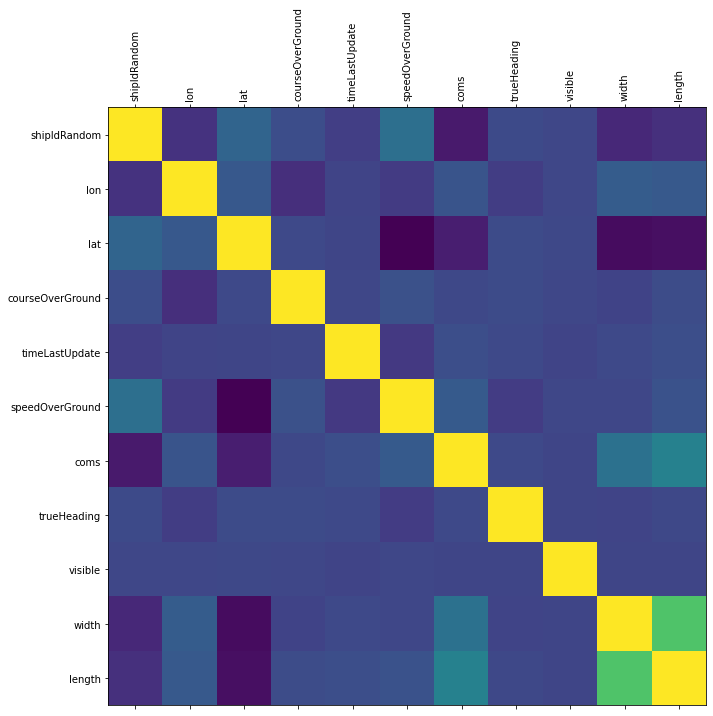

In [21]:
plot_corr(allData)

Controleren op hoog correlerende kolommen, dit kan nadelig zijn voor ons model in de toekomst.

In [22]:
cor_matrix = allData.corr().abs()
print(cor_matrix)

                  shipIdRandom       lon       lat  courseOverGround  \
shipIdRandom          1.000000  0.079849  0.141915          0.035977   
lon                   0.079849  1.000000  0.086521          0.091945   
lat                   0.141915  0.086521  1.000000          0.016570   
courseOverGround      0.035977  0.091945  0.016570          1.000000   
timeLastUpdate        0.028840  0.007046  0.001349          0.003177   
speedOverGround       0.195733  0.043170  0.263847          0.047807   
coms                  0.170736  0.062822  0.156651          0.012138   
trueHeading           0.020842  0.036681  0.025211          0.025604   
visible               0.003649  0.006283  0.010893          0.003476   
width                 0.116921  0.104903  0.223862          0.009090   
length                0.089575  0.088347  0.214217          0.029635   

                  timeLastUpdate  speedOverGround      coms  trueHeading  \
shipIdRandom            0.028840         0.195733  0.170736

Alleen de helft zonder de diagonaal (upper right triangle) wordt genomen. Anders heb je dubbele correlaties, aangezien elke kolom een keer op de x-as en een keer op de y-as benoemd wordt. Daarnaast interesseert ons de diagonaal niet, omdat elke kolommen vanzelfsprekend met zichzelf maximaal correleert.

In [23]:
import numpy as np
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                  shipIdRandom       lon       lat  courseOverGround  \
shipIdRandom               NaN  0.079849  0.141915          0.035977   
lon                        NaN       NaN  0.086521          0.091945   
lat                        NaN       NaN       NaN          0.016570   
courseOverGround           NaN       NaN       NaN               NaN   
timeLastUpdate             NaN       NaN       NaN               NaN   
speedOverGround            NaN       NaN       NaN               NaN   
coms                       NaN       NaN       NaN               NaN   
trueHeading                NaN       NaN       NaN               NaN   
visible                    NaN       NaN       NaN               NaN   
width                      NaN       NaN       NaN               NaN   
length                     NaN       NaN       NaN               NaN   

                  timeLastUpdate  speedOverGround      coms  trueHeading  \
shipIdRandom            0.028840         0.195733  0.170736

C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/2970884815.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


Slechts de kolommen length en width lijken een correlatiecoëfficient te hebben die groter is dan 0.60 of kleiner dan -0.60, wat in onze ogen te groot is om ons model niet te beïnvloeden. We kiezen ervoor om de kolom 'width' weg te halen, aangezien wij denken dat we meer hebben aan de kolom 'length', omdat dit eventueel inzicht kan bieden wanneer de brug open zou moeten gaan. Ook worden de kolommen 'location' en 'extras' weggehaald, omdat dit redundant is.

In [24]:
allData = allData.drop('width', axis = 1)
allData = allData.drop('location', axis = 1)
allData = allData.drop('extras', axis = 1)
allData.head(5)

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length
0,166367.273194,4.513998,52.157102,183.7,1630454381000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69
1,887837.602732,4.501615,52.161200,284.0,1630454396694,PLEASURE_CRAFT,UNDEFINED,0.0,0,HIGH,511,NOT_AVAILABLE,True,13
2,45316.395011,4.502595,52.161103,178.2,1630454383434,SAILING,UNDEFINED,0.2,0,HIGH,511,NOT_AVAILABLE,True,14
0,448425.058403,4.502093,52.145572,240.9,1630508426000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55
1,448425.058403,4.500578,52.145080,241.3,1630508556000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55


Statistische waarden van de data bekijken en de outliers verwijderen.

In [25]:
allData.describe()

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,speedOverGround,coms,trueHeading,length
count,97092.000000,97092.000000,97092.000000,97092.000000,9.709200e+04,97092.000000,97092.000000,97092.000000,97092.000000
mean,513195.071464,4.496772,52.155564,175.203980,1.631695e+12,2.221430,0.090574,509.320068,17.885789
std,277274.418703,0.016507,0.007443,114.587801,7.328989e+08,1.986365,0.413832,25.638308,17.534249
min,2343.582886,4.456257,52.126127,0.000000,1.630454e+12,0.000000,0.000000,0.000000,0.000000
25%,290912.293817,4.485425,52.153837,74.300000,1.631092e+12,0.000000,0.000000,511.000000,10.000000
50%,587672.189538,4.499087,52.158065,176.100000,1.631686e+12,2.500000,0.000000,511.000000,14.000000
75%,747955.740272,4.505332,52.161050,278.500000,1.632319e+12,3.800000,0.000000,511.000000,17.000000
max,999982.116823,4.537353,52.164508,359.900000,1.633047e+12,36.100000,2.000000,511.000000,889.000000


speedOverGround van 36 is enorm hoog, vooral als je weet dat 12 km per uur de max is en 1 knoop: 1.8 km per uur is. Daarnaast is een length van 889 meter ook enorm lang, zelfs de grote containerschepen die de hele wereld rondreizen zijn niet zo groot. Dit moet worden aangepakt. Ten slotte is een lengte van 0 meter niet mogelijk voor een schip, dit halen we ook weg.

In [26]:
from scipy import stats
allData = allData[allData['length']>0]
allData = allData[(np.abs(stats.zscore(allData['speedOverGround']))<4)]
allData = allData[(np.abs(stats.zscore(allData['length']))<4)]

Controleren of de outliers inderdaad weg zijn.

In [27]:
allData.describe()

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,speedOverGround,coms,trueHeading,length
count,96709.000000,96709.000000,96709.000000,96709.000000,9.670900e+04,96709.000000,96709.000000,96709.000000,96709.000000
mean,512583.830937,4.496765,52.155583,175.104762,1.631694e+12,2.213733,0.090891,509.322845,17.812168
std,276995.362024,0.016481,0.007431,114.581794,7.338126e+08,1.960738,0.414520,25.629208,13.728156
min,2343.582886,4.456257,52.126127,0.000000,1.630454e+12,0.000000,0.000000,0.000000,2.000000
25%,290912.293817,4.485427,52.153862,74.200000,1.631091e+12,0.000000,0.000000,511.000000,10.000000
50%,587672.189538,4.499083,52.158097,176.000000,1.631683e+12,2.500000,0.000000,511.000000,14.000000
75%,747955.740272,4.505325,52.161050,278.400000,1.632320e+12,3.800000,0.000000,511.000000,17.000000
max,999982.116823,4.537353,52.164508,359.900000,1.633047e+12,10.100000,2.000000,511.000000,80.000000


Alles ziet er nu goed uit.

# Algoritme maken om de aankomsttijd te bepalen:

Test uitvoeren om 1 schip locatie op te halen

In [28]:
locations = allData[['lon', 'lat']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[1]

[4.501615, 52.1612]

Om de schiplocaties te bepalen gebruiken we voor nu alleen de eerste 10. Dit doen we omdat alle 97092 schiplocaties te veel is en heel lang duurt voor het renderen.

In [29]:
locations10 = allData[:10]
locations10

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length
0,166367.273194,4.513998,52.157102,183.7,1630454381000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69
1,887837.602732,4.501615,52.161200,284.0,1630454396694,PLEASURE_CRAFT,UNDEFINED,0.0,0,HIGH,511,NOT_AVAILABLE,True,13
2,45316.395011,4.502595,52.161103,178.2,1630454383434,SAILING,UNDEFINED,0.2,0,HIGH,511,NOT_AVAILABLE,True,14
0,448425.058403,4.502093,52.145572,240.9,1630508426000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55
1,448425.058403,4.500578,52.145080,241.3,1630508556000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55
2,448425.058403,4.485338,52.140455,250.3,1630511266000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55
3,448425.058403,4.485362,52.140477,250.3,1630537706342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55
4,448425.058403,4.509402,52.148580,219.6,1630508085000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,HIGH,511,NOT_AVAILABLE,True,55
5,448425.058403,4.512808,52.151892,197.7,1630507875000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,HIGH,511,NOT_AVAILABLE,True,55
6,448425.058403,4.485347,52.140473,250.3,1630513995813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55


Om het gebied in kaart te brengen waar de schepen waren is de volgende code geschreven a.d.h.v. de import functie folium. Met deze functie kan je coördinaten visueel in kaart brengen. Het gebied dat wij in kaart brengen is door het gemiddelde van de latitude en longtitude te nemen gemaakt. Het omringende gebied wordt hierbij getoond.

In [30]:
vaarkaart = folium.Map(location=[allData.lat.mean(), allData.lon.mean()], zoom_start=14, control_scale=True)
vaarkaartschepen = folium.Map(location=[allData.lat.mean(), allData.lon.mean()], zoom_start=14, control_scale=True)
vaarkaartbruggen = folium.Map(location=[allData.lat.mean(), allData.lon.mean()], zoom_start=14, control_scale=True)
vaarkaartschepen_bruggen = folium.Map(location=[allData.lat.mean(), allData.lon.mean()], zoom_start=14, control_scale=True)
vaarkaartschip = folium.Map(location=[allData.lat.mean(), allData.lon.mean()], zoom_start=14, control_scale=True)
vaarkaart

Deze 3 kolommen hebben we nodig om de schepen in kaart te brengen en visueel te laten zien waar ze zich bevinden.

In [31]:
determine_location = locations10[["shipIdRandom", "lat", "lon"]]
determine_location

,shipIdRandom,lat,lon
0,166367.273194,52.157102,4.513998
1,887837.602732,52.161200,4.501615
2,45316.395011,52.161103,4.502595
0,448425.058403,52.145572,4.502093
1,448425.058403,52.145080,4.500578
2,448425.058403,52.140455,4.485338
3,448425.058403,52.140477,4.485362
4,448425.058403,52.148580,4.509402
5,448425.058403,52.151892,4.512808
6,448425.058403,52.140473,4.485347


Met deze code brengen we de 10 schepen die we voor nu gebruiken in kaart. Wanneer je over een punt hovert krijg je de shipId te zien.

In [32]:
for point in range(0, len(determine_location)):    
    folium.Marker([determine_location['lat'].iloc[point], determine_location['lon'].iloc[point]], popup=determine_location['shipIdRandom'].iloc[point], tooltip=determine_location['shipIdRandom'].iloc[point]).add_to(vaarkaartschepen)    

In [33]:
vaarkaartschepen

Hieronder wordt een nieuwe dataframe geïntroduceerd die gaat over de bruggen die we gebruiken voor de analyse en de bijbehorende latitude en longitude.

In [34]:
data = {'Brug': ['Waddingerbrug', 'Stevensbrug', 'Hoflandbrug', 'Hooghkamerbrug', 'Lammebrug', 'Kanaalbrug, Leiden', 'Julius Caesarbrug', 'Wilhelminabrug Leiden', 'Spanjaardsbrug', 'Leiderdorpsebrug', 'Rhijnvreugdbrug', 'Doesbrug (Leiderdorp)'], 'lat': [52.1507258473227, 52.15622, 52.1464347278504, 52.1357576476869, 52.1406762108161, 52.1447374758646, 52.1496877018278, 52.1548236944958, 52.1612262367983, 52.152140313801, 52.146909, 52.14224], 'lon': [4.46410031209974, 4.45536, 4.4660503508031, 4.46800053463046, 4.48727551905725, 4.49947725533811, 4.51081573963165, 4.51379398001624, 4.51469356997116, 4.52218119140384, 4.524245, 4.53133]} 

bruggenDF = pd.DataFrame(data)

print(bruggenDF)

                     Brug        lat       lon
0           Waddingerbrug  52.150726  4.464100
1             Stevensbrug  52.156220  4.455360
2             Hoflandbrug  52.146435  4.466050
3          Hooghkamerbrug  52.135758  4.468001
4               Lammebrug  52.140676  4.487276
5      Kanaalbrug, Leiden  52.144737  4.499477
6       Julius Caesarbrug  52.149688  4.510816
7   Wilhelminabrug Leiden  52.154824  4.513794
8          Spanjaardsbrug  52.161226  4.514694
9        Leiderdorpsebrug  52.152140  4.522181
10        Rhijnvreugdbrug  52.146909  4.524245
11  Doesbrug (Leiderdorp)  52.142240  4.531330


Toont alleen de bruggen op de kaart. Je ziet nu waar de bruggen zich bevinden.

In [35]:
for point in range(0, len(bruggenDF)):    
    folium.Marker([bruggenDF['lat'].iloc[point], bruggenDF['lon'].iloc[point]], popup=bruggenDF['Brug'].iloc[point], tooltip=bruggenDF['Brug'].iloc[point]).add_to(vaarkaartbruggen)    

In [36]:
vaarkaartbruggen

We brengen nu de bruggen en schepen samen in een kaart.
- bruggen rood
- schepen blauw

In [37]:
for point in range(0, len(bruggenDF)):    
    folium.CircleMarker([bruggenDF['lat'].iloc[point], bruggenDF['lon'].iloc[point]], popup=bruggenDF['Brug'].iloc[point], tooltip=bruggenDF['Brug'].iloc[point], color='red', radius=5, weigth=5).add_to(vaarkaartschepen_bruggen)

for point in range(0, len(determine_location)):    
    folium.CircleMarker([determine_location['lat'].iloc[point], determine_location['lon'].iloc[point]], popup=determine_location['shipIdRandom'].iloc[point], tooltip=determine_location['shipIdRandom'].iloc[point], color='blue', radius=2, weight=5).add_to(vaarkaartschepen_bruggen)

In [38]:
vaarkaartschepen_bruggen

Afstand berekenen kunnen we op 2 manieren doen geopy of haversine. We gebruiken haversine, omdat dit de wereld daadwerkelijk als een bol beschouwt. Dit werd ons overigens ook aangeraden door Michael.

In [39]:
import haversine as hs

schip1=(52.157102,4.513998)
schip2=(52.161200,4.501615)
brug=(52.150726,4.464100)


Afstand berekenen tussen schip en brug.

In [40]:
hs.haversine(schip1,brug,unit='km')

3.4772310055645272

Voor het gemak gaan we eerst 1 schip analyseren. We pakken een schip die op 01-09-2021 vaarde in het eerste parquet file. Hiervoor hebben we uit de opgeschoonde data de rows 3 t/m 612 nodig

In [41]:
firstday_firstparquetfile = allData[3:612]
firstday_firstparquetfile

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length
0,448425.058403,4.502093,52.145572,240.9,1630508426000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55
1,448425.058403,4.500578,52.145080,241.3,1630508556000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55
2,448425.058403,4.485338,52.140455,250.3,1630511266000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55
3,448425.058403,4.485362,52.140477,250.3,1630537706342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55
4,448425.058403,4.509402,52.148580,219.6,1630508085000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,HIGH,511,NOT_AVAILABLE,True,55
5,448425.058403,4.512808,52.151892,197.7,1630507875000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,HIGH,511,NOT_AVAILABLE,True,55
6,448425.058403,4.485347,52.140473,250.3,1630513995813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55
7,448425.058403,4.485400,52.140515,250.3,1630517635000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55
8,448425.058403,4.485388,52.140495,250.3,1630532206000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55
9,448425.058403,4.485393,52.140457,250.3,1630524016974,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55


We gaan het schip analyseren met het shipIdRandom nummer 448425.05840331793. We printen alle coördinaten die dit schip heeft doorgegeven op 01-09-2021 en staan in het eerste parquet file.

In [42]:
for x in range(0, len(firstday_firstparquetfile)):
    if firstday_firstparquetfile['shipIdRandom'].iloc[x] == 448425.05840331793:
        print("shipIdRandom: {}, long: {}, lat: {}".format(firstday_firstparquetfile['shipIdRandom'].iloc[x], firstday_firstparquetfile['lon'].iloc[x], firstday_firstparquetfile['lat'].iloc[x]))


shipIdRandom: 448425.05840331793, long: 4.502093333333334, lat: 52.14557166666667
shipIdRandom: 448425.05840331793, long: 4.500578333333333, lat: 52.14508
shipIdRandom: 448425.05840331793, long: 4.485338333333333, lat: 52.140454999999996
shipIdRandom: 448425.05840331793, long: 4.485361666666666, lat: 52.14047666666667
shipIdRandom: 448425.05840331793, long: 4.509401666666666, lat: 52.14858
shipIdRandom: 448425.05840331793, long: 4.512808333333334, lat: 52.151891666666664
shipIdRandom: 448425.05840331793, long: 4.485346666666667, lat: 52.14047333333333
shipIdRandom: 448425.05840331793, long: 4.4854, lat: 52.140515
shipIdRandom: 448425.05840331793, long: 4.485388333333333, lat: 52.140495
shipIdRandom: 448425.05840331793, long: 4.485393333333334, lat: 52.140456666666665
shipIdRandom: 448425.05840331793, long: 4.53094, lat: 52.141798333333334


Schip en zijn route visueel in kaart brengen

In [43]:
for point in range(0, len(bruggenDF)):    
    folium.Circle([bruggenDF['lat'].iloc[point], bruggenDF['lon'].iloc[point]], popup=bruggenDF['Brug'].iloc[point], tooltip=bruggenDF['Brug'].iloc[point], color='red', radius=10, weigth=10).add_to(vaarkaartschip)

for x in range(0, len(firstday_firstparquetfile)):
    if firstday_firstparquetfile['shipIdRandom'].iloc[x] == 448425.05840331793:
        #print("shipIdRandom: {}, long: {}, lat: {}".format(firstday_firstparquetfile['shipIdRandom'].iloc[x], firstday_firstparquetfile['lon'].iloc[x], firstday_firstparquetfile['lat'].iloc[x]))
        folium.Circle([firstday_firstparquetfile['lat'].iloc[x], firstday_firstparquetfile['lon'].iloc[x]], popup=firstday_firstparquetfile['shipIdRandom'].iloc[x], tooltip=firstday_firstparquetfile['shipIdRandom'].iloc[x], color='blue', radius=4, weigth=10).add_to(vaarkaartschip)
   

In [44]:
vaarkaartschip

Van elke boot de afstand naar alle bruggen, daarna kijken welke kant de boot opgaat, dus naar welke brug gaat de boot?

In [45]:
locationsBrug = bruggenDF[['lat', 'lon']]
locationsBrugList = locationsBrug.values.tolist()
print(len(locationsBrugList))
locationsBoot = allData[['lat', 'lon']]
locationsBootList = locationsBoot.values.tolist()
print(len(locationsBootList))
Brug = bruggenDF[['Brug']]
BrugList = Brug.values.tolist()
print(len(BrugList))
hs.haversine(locationsBrugList[1],locationsBootList[1],unit='km')

12
96709
12


3.2035328490352093

voor elke rij de afstand naar elke brug berekenen en inladen in een list om later de dataframe mee aan te vullen.

In [46]:
print(BrugList)
afstandNaarWaddingerbrug = []
afstandNaarStevensbrug = []
afstandNaarHoflandbrug = []
afstandNaarHooghkamerbrug = []
afstandNaarLammebrug = []
afstandNaarKanaalbrugLeiden = []
afstandNaarJuliusCaesarbrug = []
afstandNaarWilhelminabrugLeiden = []
afstandNaarSpanjaardsbrug = []
afstandNaarLeiderdorpsebrug = []
afstandNaarRhijnvreugdbrug = []
afstandNaarDoesbrugLeiderdorp = []
for bootrow in locationsBootList:
    i = 1
    for brugrow in locationsBrugList:
        if i == 1:
            afstandNaarWaddingerbrug.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 2:
            afstandNaarStevensbrug.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 3:
            afstandNaarHoflandbrug.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 4:
            afstandNaarHooghkamerbrug.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 5:
            afstandNaarLammebrug.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 6:
            afstandNaarKanaalbrugLeiden.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 7:
            afstandNaarJuliusCaesarbrug.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 8:
            afstandNaarWilhelminabrugLeiden.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 9:
            afstandNaarSpanjaardsbrug.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 10:
            afstandNaarLeiderdorpsebrug.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 11:
            afstandNaarRhijnvreugdbrug.append(hs.haversine(brugrow,bootrow,unit='m'))
        elif i == 12:
            afstandNaarDoesbrugLeiderdorp.append(hs.haversine(brugrow,bootrow,unit='m'))
        i = i + 1
print(len(afstandNaarDoesbrugLeiderdorp))   

[['Waddingerbrug'], ['Stevensbrug'], ['Hoflandbrug'], ['Hooghkamerbrug'], ['Lammebrug'], ['Kanaalbrug, Leiden'], ['Julius Caesarbrug'], ['Wilhelminabrug Leiden'], ['Spanjaardsbrug'], ['Leiderdorpsebrug'], ['Rhijnvreugdbrug'], ['Doesbrug (Leiderdorp)']]
96709


Kolommen toevoegen aan de opgeschoonde dataframe mbt de afstand van elke rij (bootmeetmoment) naar elke brug. 

In [47]:
allData['afstandNaarWaddingerbrug'] = afstandNaarWaddingerbrug
allData['afstandNaarStevensbrug'] = afstandNaarStevensbrug
allData['afstandNaarHoflandbrug'] = afstandNaarHoflandbrug
allData['afstandNaarHooghkamerbrug'] = afstandNaarHooghkamerbrug
allData['afstandNaarLammebrug'] = afstandNaarLammebrug
allData['afstandNaarKanaalbrugLeiden'] = afstandNaarKanaalbrugLeiden
allData['afstandNaarJuliusCaesarbrug'] = afstandNaarJuliusCaesarbrug
allData['afstandNaarWilhelminabrugLeiden'] = afstandNaarWilhelminabrugLeiden
allData['afstandNaarSpanjaardsbrug'] = afstandNaarSpanjaardsbrug
allData['afstandNaarLeiderdorpsebrug'] = afstandNaarLeiderdorpsebrug
allData['afstandNaarRhijnvreugdbrug'] = afstandNaarRhijnvreugdbrug
allData['afstandNaarDoesbrugLeiderdorp'] = afstandNaarDoesbrugLeiderdorp

Checken of de kolommen inderdaad toegevoegd zijn.

In [48]:
allData.head(100)

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp
0,166367.273194,4.513998,52.157102,183.7,1630454381000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69,3477.228346,4001.431262,3479.700439,3934.944916,2580.759293,1694.619842,852.510497,253.682645,461.077434,784.850987,1331.638279,2032.062432
1,887837.602732,4.501615,52.161200,284.0,1630454396694,PLEASURE_CRAFT,UNDEFINED,0.0,0,HIGH,511,NOT_AVAILABLE,True,13,2811.794854,3203.532849,2929.618081,3641.978174,2483.011177,1836.352532,1425.715813,1092.219703,892.116416,1727.206982,2215.573687,2924.871888
2,45316.395011,4.502595,52.161103,178.2,1630454383434,SAILING,UNDEFINED,0.2,0,HIGH,511,NOT_AVAILABLE,True,14,2868.440488,3267.598238,2979.330042,3676.208641,2500.340443,1832.191675,1387.733266,1034.990240,825.378212,1666.908304,2161.655203,2871.070154
0,448425.058403,4.502093,52.145572,240.9,1630508426000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55,2654.927319,3401.247617,2461.265329,2569.814586,1148.373022,201.172563,750.785795,1302.190818,1941.403372,1553.077965,1518.808685,2029.163069
1,448425.058403,4.500578,52.145080,241.3,1630508556000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55,2566.925028,3324.540933,2360.841447,2453.012569,1031.432730,84.236135,866.283858,1409.578169,2037.342276,1670.021128,1627.651742,2122.079775
2,448425.058403,4.485338,52.140455,250.3,1630511266000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1845.120858,2693.863812,1474.609704,1293.411300,134.468929,1075.955408,2018.987568,2514.467499,3057.103918,2829.891568,2750.219768,3144.840175
3,448425.058403,4.485362,52.140477,250.3,1630537706342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.882109,2693.506055,1474.947049,1295.841712,132.479002,1073.462081,2016.391557,2511.707053,3054.240466,2827.370785,2748.054067,3143.099060
4,448425.058403,4.509402,52.148580,219.6,1630508085000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,HIGH,511,NOT_AVAILABLE,True,55,3100.081717,3783.609855,2967.580983,3164.631885,1746.988853,800.709392,156.460760,756.181896,1451.803239,957.592308,1029.698534,1654.057625
5,448425.058403,4.512808,52.151892,197.7,1630507875000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,HIGH,511,NOT_AVAILABLE,True,55,3325.724239,3948.719923,3247.496974,3545.067391,2142.568921,1208.390711,280.253004,332.889584,1045.895582,640.068233,957.011542,1658.003996
6,448425.058403,4.485347,52.140473,250.3,1630513995813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.306460,2692.969340,1474.199276,1294.755644,133.550417,1074.544221,2017.461565,2512.733083,3055.191136,2828.450377,2749.138935,3144.143953


Handmatig testen of de afstanden inderdaad goed zijn overgebracht naar de opschoonde dataframe

In [49]:
schip1=(52.157102,4.513998)
schip2=(52.161200,4.501615)
brugWaddingerbrug=(52.150726,4.464100)
brugStevensbrug=(52.156220,4.455360)
brugHoflandbrug=(52.146435,4.466050)

hs.haversine(schip1,brugHoflandbrug,unit='m')

3479.7038574984767

Aangezien de snelheden van de boten enorm verschillen, is het wellicht handig om te ontdekken of er een bepaalde trend is en of er ook zoiets is als een "spits" op het water. Dit kan van pas komen bij het berekenen van de aankomsttijd van boot x bij brug y.

<AxesSubplot:xlabel='timeLastUpdate'>

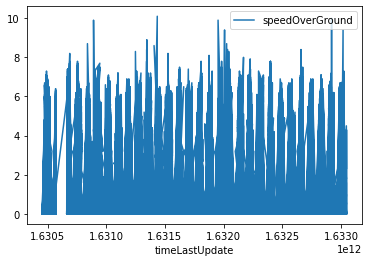

In [50]:
allData.plot.line(x='timeLastUpdate', y='speedOverGround')

Dit ziet er onoverzichtelijk uit, laten we de data van een week nemen, eerst de unix timestamp even omzetten naar een 'date' timestamp.

In [51]:
allData['timeLastUpdate'] = pd.to_datetime(allData['timeLastUpdate'],unit='ms')

In [52]:
allData.head(10)

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp
0,166367.273194,4.513998,52.157102,183.7,2021-08-31 23:59:41.000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69,3477.228346,4001.431262,3479.700439,3934.944916,2580.759293,1694.619842,852.510497,253.682645,461.077434,784.850987,1331.638279,2032.062432
1,887837.602732,4.501615,52.161200,284.0,2021-08-31 23:59:56.694,PLEASURE_CRAFT,UNDEFINED,0.0,0,HIGH,511,NOT_AVAILABLE,True,13,2811.794854,3203.532849,2929.618081,3641.978174,2483.011177,1836.352532,1425.715813,1092.219703,892.116416,1727.206982,2215.573687,2924.871888
2,45316.395011,4.502595,52.161103,178.2,2021-08-31 23:59:43.434,SAILING,UNDEFINED,0.2,0,HIGH,511,NOT_AVAILABLE,True,14,2868.440488,3267.598238,2979.330042,3676.208641,2500.340443,1832.191675,1387.733266,1034.990240,825.378212,1666.908304,2161.655203,2871.070154
0,448425.058403,4.502093,52.145572,240.9,2021-09-01 15:00:26.000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55,2654.927319,3401.247617,2461.265329,2569.814586,1148.373022,201.172563,750.785795,1302.190818,1941.403372,1553.077965,1518.808685,2029.163069
1,448425.058403,4.500578,52.145080,241.3,2021-09-01 15:02:36.000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55,2566.925028,3324.540933,2360.841447,2453.012569,1031.432730,84.236135,866.283858,1409.578169,2037.342276,1670.021128,1627.651742,2122.079775
2,448425.058403,4.485338,52.140455,250.3,2021-09-01 15:47:46.000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1845.120858,2693.863812,1474.609704,1293.411300,134.468929,1075.955408,2018.987568,2514.467499,3057.103918,2829.891568,2750.219768,3144.840175
3,448425.058403,4.485362,52.140477,250.3,2021-09-01 23:08:26.342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.882109,2693.506055,1474.947049,1295.841712,132.479002,1073.462081,2016.391557,2511.707053,3054.240466,2827.370785,2748.054067,3143.099060
4,448425.058403,4.509402,52.148580,219.6,2021-09-01 14:54:45.000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,HIGH,511,NOT_AVAILABLE,True,55,3100.081717,3783.609855,2967.580983,3164.631885,1746.988853,800.709392,156.460760,756.181896,1451.803239,957.592308,1029.698534,1654.057625
5,448425.058403,4.512808,52.151892,197.7,2021-09-01 14:51:15.000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,HIGH,511,NOT_AVAILABLE,True,55,3325.724239,3948.719923,3247.496974,3545.067391,2142.568921,1208.390711,280.253004,332.889584,1045.895582,640.068233,957.011542,1658.003996
6,448425.058403,4.485347,52.140473,250.3,2021-09-01 16:33:15.813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.306460,2692.969340,1474.199276,1294.755644,133.550417,1074.544221,2017.461565,2512.733083,3055.191136,2828.450377,2749.138935,3144.143953


In [53]:
plotData = allData[(allData['timeLastUpdate'] > "2021-09-05 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-13 00:00:00.001")]

In [54]:
plotData.head(10)

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp
0,670286.769626,4.533442,52.143727,157.6,2021-09-06 06:58:28.136,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.2,0,LOW,511,NOT_AVAILABLE,True,10,4794.961418,5505.575971,4608.391529,4553.064775,3168.624408,2320.378286,1680.132694,1822.004731,2328.619352,1210.615277,720.436494,219.298967
1,670286.769626,4.533292,52.143777,329.0,2021-09-06 21:57:43.230,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.4,0,LOW,511,NOT_AVAILABLE,True,10,4783.958671,5494.267747,4597.814670,4544.109507,3159.047453,2309.889575,1668.533922,1810.710965,2318.358259,1199.830869,708.789738,217.061929
2,670286.769626,4.533265,52.143725,343.7,2021-09-06 01:03:44.119,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.6,0,LOW,511,NOT_AVAILABLE,True,10,4783.097389,5493.960028,4596.374488,4541.203294,3156.618214,2308.346253,1669.136200,1813.280403,2322.175849,1203.145119,710.052905,211.427787
3,747955.740272,4.499862,52.161603,356.2,2021-09-06 13:48:54.532,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2722.992990,3094.147180,2857.575413,3603.509303,2480.381329,1875.583742,1521.170466,1213.090968,1012.573501,1850.817884,2331.726219,3040.607747
4,747955.740272,4.499888,52.161630,356.2,2021-09-06 14:06:52.596,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2725.939940,3096.505704,2860.793919,3606.971426,2483.793044,1878.574934,1522.862422,1213.513156,1010.883144,1851.010014,2332.508278,3041.424246
5,747955.740272,4.499862,52.161603,356.2,2021-09-06 14:58:47.760,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2722.992990,3094.147180,2857.575413,3603.509303,2480.381329,1875.583742,1521.170466,1213.090968,1012.573501,1850.817884,2331.726219,3040.607747
6,747955.740272,4.499862,52.161612,356.2,2021-09-06 15:49:48.564,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2723.404509,3094.326302,2858.122274,3604.248237,2481.250644,1876.510277,1521.977603,1213.666957,1012.612202,1851.344736,2332.375526,3041.263835
7,747955.740272,4.499928,52.161613,356.2,2021-09-06 23:45:45.527,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2727.561524,3098.823739,2861.903484,3607.141326,2483.002216,1876.764654,1519.911377,1210.224549,1008.076746,1847.711848,2329.263952,3038.186012
8,747955.740272,4.501938,52.161060,256.9,2021-09-06 13:36:52.802,TUG,AT_ANCHOR,2.2,0,HIGH,511,NOT_AVAILABLE,True,17,2825.523063,3222.628083,2939.274739,3643.880807,2477.536679,1822.734382,1402.087434,1065.340362,870.254229,1700.212084,2189.044416,2898.367071
9,747955.740272,4.499868,52.161600,356.2,2021-09-06 17:34:48.649,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2723.235953,3094.521795,2857.723904,3603.488209,2480.191143,1875.219544,1520.624228,1212.504360,1012.103899,1850.233068,2331.142061,3040.024181


<AxesSubplot:xlabel='timeLastUpdate'>

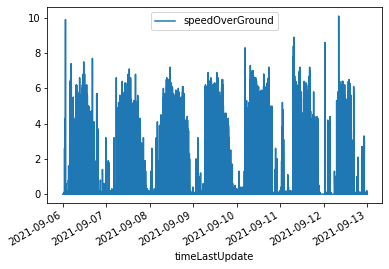

In [55]:
plotData.plot.line(x='timeLastUpdate', y='speedOverGround')

Laten we voor een beter beeld ook een plot maken van elke dag van bovenstaande week.

<AxesSubplot:xlabel='timeLastUpdate'>

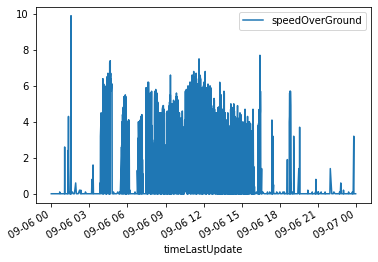

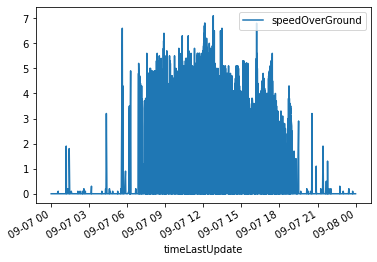

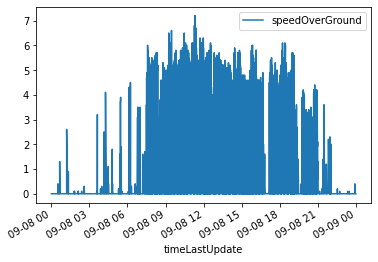

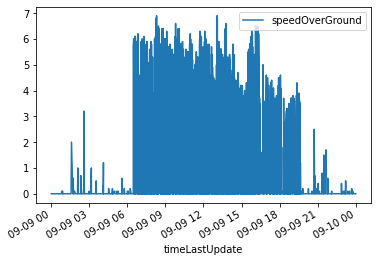

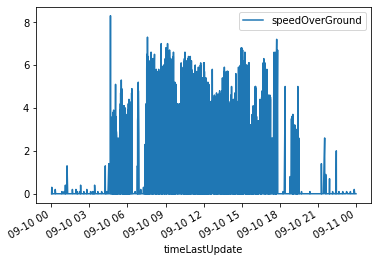

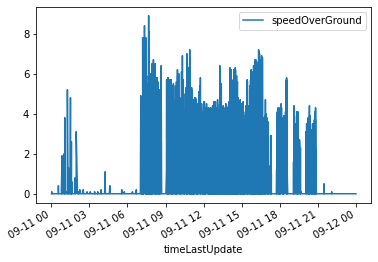

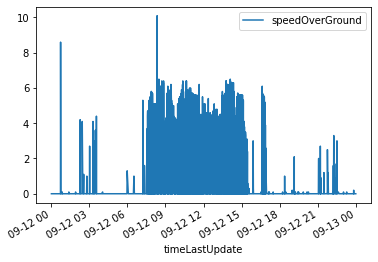

In [56]:

plotData = allData[(allData['timeLastUpdate'] > "2021-09-05 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-07 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='speedOverGround')

plotData = allData[(allData['timeLastUpdate'] > "2021-09-06 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-08 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='speedOverGround')

plotData = allData[(allData['timeLastUpdate'] > "2021-09-07 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-09 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='speedOverGround')

plotData = allData[(allData['timeLastUpdate'] > "2021-09-08 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-10 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='speedOverGround')

plotData = allData[(allData['timeLastUpdate'] > "2021-09-09 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-11 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='speedOverGround')

plotData = allData[(allData['timeLastUpdate'] > "2021-09-10 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-12 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='speedOverGround')

plotData = allData[(allData['timeLastUpdate'] > "2021-09-11 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-13 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='speedOverGround')


Om het nog duidelijker te maken gaan we gebruik maken vande moving average van pandas rolling. Dit wordt overigens een nieuwe kolom.

In [57]:
rollingData = allData[(allData['timeLastUpdate'] > "2021-09-05 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-13 00:00:00.001")]
rollingData['Moving Average'] = rollingData['speedOverGround'].rolling(window=10).mean() 
rollingData.head(20)



C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/1903382300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollingData['Moving Average'] = rollingData['speedOverGround'].rolling(window=10).mean()


,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp,Moving Average
0,670286.769626,4.533442,52.143727,157.6,2021-09-06 06:58:28.136,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.2,0,LOW,511,NOT_AVAILABLE,True,10,4794.961418,5505.575971,4608.391529,4553.064775,3168.624408,2320.378286,1680.132694,1822.004731,2328.619352,1210.615277,720.436494,219.298967,NaN
1,670286.769626,4.533292,52.143777,329.0,2021-09-06 21:57:43.230,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.4,0,LOW,511,NOT_AVAILABLE,True,10,4783.958671,5494.267747,4597.814670,4544.109507,3159.047453,2309.889575,1668.533922,1810.710965,2318.358259,1199.830869,708.789738,217.061929,NaN
2,670286.769626,4.533265,52.143725,343.7,2021-09-06 01:03:44.119,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.6,0,LOW,511,NOT_AVAILABLE,True,10,4783.097389,5493.960028,4596.374488,4541.203294,3156.618214,2308.346253,1669.136200,1813.280403,2322.175849,1203.145119,710.052905,211.427787,NaN
3,747955.740272,4.499862,52.161603,356.2,2021-09-06 13:48:54.532,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2722.992990,3094.147180,2857.575413,3603.509303,2480.381329,1875.583742,1521.170466,1213.090968,1012.573501,1850.817884,2331.726219,3040.607747,NaN
4,747955.740272,4.499888,52.161630,356.2,2021-09-06 14:06:52.596,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2725.939940,3096.505704,2860.793919,3606.971426,2483.793044,1878.574934,1522.862422,1213.513156,1010.883144,1851.010014,2332.508278,3041.424246,NaN
5,747955.740272,4.499862,52.161603,356.2,2021-09-06 14:58:47.760,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2722.992990,3094.147180,2857.575413,3603.509303,2480.381329,1875.583742,1521.170466,1213.090968,1012.573501,1850.817884,2331.726219,3040.607747,NaN
6,747955.740272,4.499862,52.161612,356.2,2021-09-06 15:49:48.564,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2723.404509,3094.326302,2858.122274,3604.248237,2481.250644,1876.510277,1521.977603,1213.666957,1012.612202,1851.344736,2332.375526,3041.263835,NaN
7,747955.740272,4.499928,52.161613,356.2,2021-09-06 23:45:45.527,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2727.561524,3098.823739,2861.903484,3607.141326,2483.002216,1876.764654,1519.911377,1210.224549,1008.076746,1847.711848,2329.263952,3038.186012,NaN
8,747955.740272,4.501938,52.161060,256.9,2021-09-06 13:36:52.802,TUG,AT_ANCHOR,2.2,0,HIGH,511,NOT_AVAILABLE,True,17,2825.523063,3222.628083,2939.274739,3643.880807,2477.536679,1822.734382,1402.087434,1065.340362,870.254229,1700.212084,2189.044416,2898.367071,NaN
9,747955.740272,4.499868,52.161600,356.2,2021-09-06 17:34:48.649,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2723.235953,3094.521795,2857.723904,3603.488209,2480.191143,1875.219544,1520.624228,1212.504360,1012.103899,1850.233068,2331.142061,3040.024181,0.64


Aangezien we een window van 10 hebben gepakt, kunnen de eerste 9 rijen geen Moving Average samen kunnen stellen. Dit pakken we aan door het te centreren, dus dan kijkt hij bij het maken van de average niet alleen naar de afgelopen waarden, maar kijkt, voor de helft ook naar de komende waarden.

In [58]:
rollingData = allData[(allData['timeLastUpdate'] > "2021-09-05 23:59:59.999") & (allData['timeLastUpdate'] < "2021-09-13 00:00:00.001")]
rollingData['Moving Average'] = rollingData['speedOverGround'].rolling(window=15, center = True).mean() 
rollingData.head(20)

C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/2070028090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rollingData['Moving Average'] = rollingData['speedOverGround'].rolling(window=15, center = True).mean()


,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp,Moving Average
0,670286.769626,4.533442,52.143727,157.6,2021-09-06 06:58:28.136,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,0.2,0,LOW,511,NOT_AVAILABLE,True,10,4794.961418,5505.575971,4608.391529,4553.064775,3168.624408,2320.378286,1680.132694,1822.004731,2328.619352,1210.615277,720.436494,219.298967,NaN
1,670286.769626,4.533292,52.143777,329.0,2021-09-06 21:57:43.230,PLEASURE_CRAFT,UNDER_WAY_USING_ENGINE,1.4,0,LOW,511,NOT_AVAILABLE,True,10,4783.958671,5494.267747,4597.814670,4544.109507,3159.047453,2309.889575,1668.533922,1810.710965,2318.358259,1199.830869,708.789738,217.061929,NaN
2,670286.769626,4.533265,52.143725,343.7,2021-09-06 01:03:44.119,NOT_AVAILABLE,UNDER_WAY_USING_ENGINE,2.6,0,LOW,511,NOT_AVAILABLE,True,10,4783.097389,5493.960028,4596.374488,4541.203294,3156.618214,2308.346253,1669.136200,1813.280403,2322.175849,1203.145119,710.052905,211.427787,NaN
3,747955.740272,4.499862,52.161603,356.2,2021-09-06 13:48:54.532,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2722.992990,3094.147180,2857.575413,3603.509303,2480.381329,1875.583742,1521.170466,1213.090968,1012.573501,1850.817884,2331.726219,3040.607747,NaN
4,747955.740272,4.499888,52.161630,356.2,2021-09-06 14:06:52.596,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2725.939940,3096.505704,2860.793919,3606.971426,2483.793044,1878.574934,1522.862422,1213.513156,1010.883144,1851.010014,2332.508278,3041.424246,NaN
5,747955.740272,4.499862,52.161603,356.2,2021-09-06 14:58:47.760,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2722.992990,3094.147180,2857.575413,3603.509303,2480.381329,1875.583742,1521.170466,1213.090968,1012.573501,1850.817884,2331.726219,3040.607747,NaN
6,747955.740272,4.499862,52.161612,356.2,2021-09-06 15:49:48.564,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2723.404509,3094.326302,2858.122274,3604.248237,2481.250644,1876.510277,1521.977603,1213.666957,1012.612202,1851.344736,2332.375526,3041.263835,NaN
7,747955.740272,4.499928,52.161613,356.2,2021-09-06 23:45:45.527,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2727.561524,3098.823739,2861.903484,3607.141326,2483.002216,1876.764654,1519.911377,1210.224549,1008.076746,1847.711848,2329.263952,3038.186012,0.846667
8,747955.740272,4.501938,52.161060,256.9,2021-09-06 13:36:52.802,TUG,AT_ANCHOR,2.2,0,HIGH,511,NOT_AVAILABLE,True,17,2825.523063,3222.628083,2939.274739,3643.880807,2477.536679,1822.734382,1402.087434,1065.340362,870.254229,1700.212084,2189.044416,2898.367071,1.093333
9,747955.740272,4.499868,52.161600,356.2,2021-09-06 17:34:48.649,TUG,AT_ANCHOR,0.0,0,HIGH,511,NOT_AVAILABLE,True,17,2723.235953,3094.521795,2857.723904,3603.488209,2480.191143,1875.219544,1520.624228,1212.504360,1012.103899,1850.233068,2331.142061,3040.024181,1.253333


En nu visualiseren.

<AxesSubplot:xlabel='timeLastUpdate'>

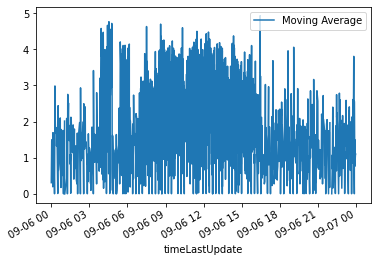

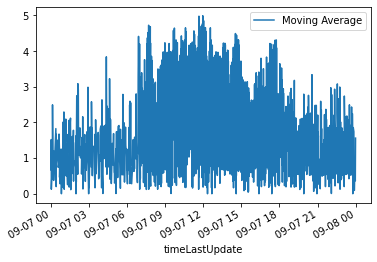

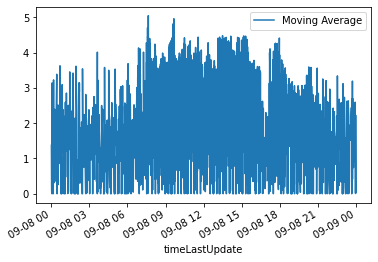

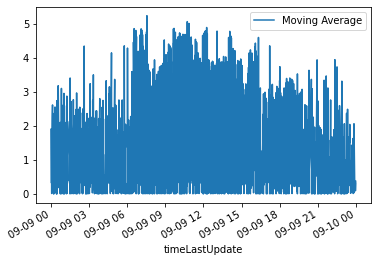

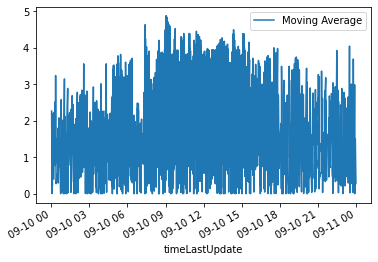

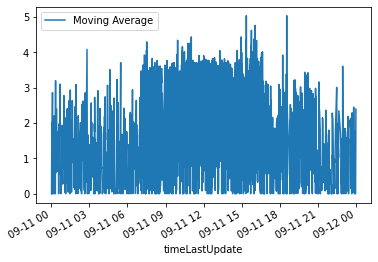

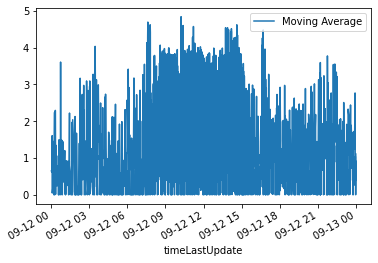

In [59]:
plotData = rollingData[(rollingData['timeLastUpdate'] > "2021-09-05 23:59:59.999") & (rollingData['timeLastUpdate'] < "2021-09-07 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='Moving Average')

plotData = rollingData[(rollingData['timeLastUpdate'] > "2021-09-06 23:59:59.999") & (rollingData['timeLastUpdate'] < "2021-09-08 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='Moving Average')

plotData = rollingData[(rollingData['timeLastUpdate'] > "2021-09-07 23:59:59.999") & (rollingData['timeLastUpdate'] < "2021-09-09 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='Moving Average')

plotData = rollingData[(rollingData['timeLastUpdate'] > "2021-09-08 23:59:59.999") & (rollingData['timeLastUpdate'] < "2021-09-10 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='Moving Average')

plotData = rollingData[(rollingData['timeLastUpdate'] > "2021-09-09 23:59:59.999") & (rollingData['timeLastUpdate'] < "2021-09-11 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='Moving Average')

plotData = rollingData[(rollingData['timeLastUpdate'] > "2021-09-10 23:59:59.999") & (rollingData['timeLastUpdate'] < "2021-09-12 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='Moving Average')

plotData = rollingData[(rollingData['timeLastUpdate'] > "2021-09-11 23:59:59.999") & (rollingData['timeLastUpdate'] < "2021-09-13 00:00:00.001")]
plotData.plot.line(x='timeLastUpdate', y='Moving Average')

Wat goed te zien is, is dat men in het algemeen tussen 07:00 en 17:00 het hardst vaart. Daarnaast is het ook zo dat er flinke fluctiaties zijn op een dag, maar in het algemeen kan men wel zeggen dat voor 07:00 en na 17:00 het gemiddeld gezien rustiger is. Dit kunnen we meenemen in het verdere onderzoek, mochten wij echt een "tijd tot destinatie" willen doorgeven.

Nu bepalen welke brug de boot als volgende tegen zal komen.

In [60]:
allData.head(10)
courseBoot = []
longitudeBoot = []
for index, row in allData.iterrows():
    courseBoot.append(row["courseOverGround"])
    longitudeBoot.append(row["lon"])
    

In [61]:
data = {'Brug': ['Stevensbrug', 'Waddingerbrug', 'Hoflandbrug', 'Hooghkamerbrug', 'Lammebrug', 'Kanaalbrug, Leiden', 'Julius Caesarbrug', 'Wilhelminabrug Leiden', 'Spanjaardsbrug', 'Leiderdorpsebrug', 'Rhijnvreugdbrug', 'Doesbrug (Leiderdorp)'], 'lat': [52.15622, 52.1507258473227, 52.1464347278504, 52.1357576476869, 52.1406762108161, 52.1447374758646, 52.1496877018278, 52.1548236944958, 52.1612262367983, 52.152140313801, 52.146909, 52.14224], 'lon': [4.45536, 4.46410031209974, 4.4660503508031, 4.46800053463046, 4.48727551905725, 4.49947725533811, 4.51081573963165, 4.51379398001624, 4.51469356997116, 4.52218119140384, 4.524245, 4.53133]} 

bruggen = pd.DataFrame(data)

print(bruggen)

longitudeBrug = []
naamBrug = []

# Nu hebben we courseBoot, longitudeBoot, naamBrug, longitudeBrug. Hiermee kunnnen we de volgende brug bepalen.

for index, row in bruggen.iterrows():
    print(index)
    naamBrug.append(row["Brug"])
    longitudeBrug.append(row["lon"])

print(naamBrug)
print(longitudeBrug)

# Nu hebben we courseBoot, longitudeBoot, naamBrug, longitudeBrug. 
# Hiermee kunnnen we de volgende brug bepalen per boot-meetmoment door middel van de graden die de boot maakt.

volgendeBrug = []

for index, row in allData.iterrows():
    indexBrugLinks = 0
    indexBrugRechts = 0
    counter = 0
    for item in longitudeBrug:
        if (row["lon"] < item) and counter == 0 and ( 0 < row["courseOverGround"] < 180 ) :
            volgendeBrug.append("Stevensbrug")
            counter = counter + 1
        elif (row["lon"] < item) and counter == 0 and ( 180 < row["courseOverGround"] < 360 ) :
            volgendeBrug.append("Geen volgende brug")
            counter = counter + 1
        elif (row["lon"] > item) and counter == 0:
            indexBrugRechts = indexBrugRechts + 1
            counter = counter + 1
        elif (row["lon"] > item) and counter != 0:
            indexBrugLinks = indexBrugLinks + 1
            indexBrugRechts = indexBrugRechts + 1
 
    if indexBrugRechts == 12 and (0 < row["courseOverGround"] < 180):
        volgendeBrug.append("Geen volgende brug")
    elif indexBrugRechts == 12 and (180 < row["courseOverGround"] < 360):
        volgendeBrug.append("Doesbrug (Leiderdorp)")
        
    elif indexBrugLinks == 0 and indexBrugRechts == 1 and (0 < row["courseOverGround"] < 180):
        volgendeBrug.append("Waddingerbrug")
    elif indexBrugLinks == 0 and indexBrugRechts == 1 and (180 < row["courseOverGround"] < 360):
        volgendeBrug.append("Stevensbrug")
        
    elif (indexBrugLinks == 1 and indexBrugRechts == 2 and (0 < row["courseOverGround"] < 180)) or row["courseOverGround"] == 180:
        volgendeBrug.append("Hoflandbrug")
    elif (indexBrugLinks == 1 and indexBrugRechts == 2 and (180 < row["courseOverGround"] < 360)) or row["courseOverGround"] == 0:
        volgendeBrug.append("Waddingerbrug")
        
    elif (indexBrugLinks == 2 and indexBrugRechts == 3 and (0 < row["courseOverGround"] < 180)) or row["courseOverGround"] == 180:
        volgendeBrug.append("Hooghkamerbrug")
    elif (indexBrugLinks == 2 and indexBrugRechts == 3 and (180 < row["courseOverGround"] < 360)) or row["courseOverGround"] == 0:
        volgendeBrug.append("Hoflandbrug")
        
    elif indexBrugLinks ==3 and indexBrugRechts == 4 and (0 < row["courseOverGround"] < 180):
        volgendeBrug.append("Lammebrug")
    elif indexBrugLinks == 3 and indexBrugRechts == 4 and (180 < row["courseOverGround"] < 360):
        volgendeBrug.append("Hooghkamerbrug")
        
    elif indexBrugLinks == 4 and indexBrugRechts == 5 and (0 < row["courseOverGround"] < 180):
        volgendeBrug.append("Kanaalbrug, Leiden")
    elif indexBrugLinks == 4 and indexBrugRechts == 5 and (180 < row["courseOverGround"] < 360):
        volgendeBrug.append("Lammebrug")
        
    elif indexBrugLinks == 5 and indexBrugRechts == 6 and (0 < row["courseOverGround"] < 180):
        volgendeBrug.append("Julius Caesarbrug")
    elif indexBrugLinks == 5 and indexBrugRechts == 6 and (180 < row["courseOverGround"] < 360):
        volgendeBrug.append("Kanaalbrug, Leiden")
        
    elif indexBrugLinks == 6 and indexBrugRechts == 7 and (0 < row["courseOverGround"] < 180):
        volgendeBrug.append("Wilhelminabrug Leiden")
    elif indexBrugLinks == 6 and indexBrugRechts == 7 and (180 < row["courseOverGround"] < 360):
        volgendeBrug.append("Julius Caesarbrug")
        
    elif (indexBrugLinks == 7 and indexBrugRechts == 8 and (0 < row["courseOverGround"] < 180)) or row["courseOverGround"] == 0:
        volgendeBrug.append("Spanjaardsbrug")
    elif (indexBrugLinks == 7 and indexBrugRechts == 8 and (180 < row["courseOverGround"] < 360)) or row["courseOverGround"] == 180:
        volgendeBrug.append("Wilhelminabrug Leiden")
        
    elif (indexBrugLinks == 8 and indexBrugRechts == 9 and (0 < row["courseOverGround"] < 180)) or row["courseOverGround"] == 0:
        volgendeBrug.append("Leiderdorpsebrug")
    elif (indexBrugLinks == 8 and indexBrugRechts == 9 and (180 < row["courseOverGround"] < 360)) or row["courseOverGround"] == 180:
        volgendeBrug.append("Spanjaardsbrug")
        
    elif indexBrugLinks == 9 and indexBrugRechts == 10 and (0 < row["courseOverGround"] < 180):
        volgendeBrug.append("Rhijnvreugdbrug")
    elif indexBrugLinks == 9 and indexBrugRechts == 10 and (180 < row["courseOverGround"] < 360):
        volgendeBrug.append("Leiderdorpsebrug")
        
    elif indexBrugLinks == 10 and indexBrugRechts == 11 and (0 < row["courseOverGround"] < 180):
        volgendeBrug.append("Doesbrug (Leiderdorp)")
    elif indexBrugLinks == 10 and indexBrugRechts == 11 and (180 < row["courseOverGround"] < 360):
        volgendeBrug.append("Rhijnvreugdbrug")


print(len(volgendeBrug))
print(len(allData))
        




                     Brug        lat       lon
0             Stevensbrug  52.156220  4.455360
1           Waddingerbrug  52.150726  4.464100
2             Hoflandbrug  52.146435  4.466050
3          Hooghkamerbrug  52.135758  4.468001
4               Lammebrug  52.140676  4.487276
5      Kanaalbrug, Leiden  52.144737  4.499477
6       Julius Caesarbrug  52.149688  4.510816
7   Wilhelminabrug Leiden  52.154824  4.513794
8          Spanjaardsbrug  52.161226  4.514694
9        Leiderdorpsebrug  52.152140  4.522181
10        Rhijnvreugdbrug  52.146909  4.524245
11  Doesbrug (Leiderdorp)  52.142240  4.531330
0
1
2
3
4
5
6
7
8
9
10
11
['Stevensbrug', 'Waddingerbrug', 'Hoflandbrug', 'Hooghkamerbrug', 'Lammebrug', 'Kanaalbrug, Leiden', 'Julius Caesarbrug', 'Wilhelminabrug Leiden', 'Spanjaardsbrug', 'Leiderdorpsebrug', 'Rhijnvreugdbrug', 'Doesbrug (Leiderdorp)']
[4.45536, 4.46410031209974, 4.4660503508031, 4.46800053463046, 4.48727551905725, 4.49947725533811, 4.51081573963165, 4.51379398001624,

Lengte van de twee lists zijn even lang, dit is een goed teken, laten we hieronder de kolom toevoegen aan de df en
handmatig wat "volgendeBrug" waarden checken.

In [62]:
# even checken of er waarden zijn met courseOverGround van 0 of 180, dit was ik in eerste instantie namelijk vergeten.
# zonder dit mee te nemen sla je eigenlijk een paar boot-meetmomenten over, maar dit had ik al snel door door de lengte van
# de verkregen list te controleren met de lengte van de df.
missingCounter = 0
for index, row in allData.iterrows():
    if (row["courseOverGround"] == 180) or (row["courseOverGround"] == 0):
        missingCounter = missingCounter + 1
print(missingCounter)
# print het aantal rows met 0 of 180 graden

6599


In [63]:
# toevoegen kolom 'volgendeBrug' aan dataframe.
allData['volgendeBrug'] = volgendeBrug
allData.head(50)

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp,volgendeBrug
0,166367.273194,4.513998,52.157102,183.7,2021-08-31 23:59:41.000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69,3477.228346,4001.431262,3479.700439,3934.944916,2580.759293,1694.619842,852.510497,253.682645,461.077434,784.850987,1331.638279,2032.062432,Wilhelminabrug Leiden
1,887837.602732,4.501615,52.161200,284.0,2021-08-31 23:59:56.694,PLEASURE_CRAFT,UNDEFINED,0.0,0,HIGH,511,NOT_AVAILABLE,True,13,2811.794854,3203.532849,2929.618081,3641.978174,2483.011177,1836.352532,1425.715813,1092.219703,892.116416,1727.206982,2215.573687,2924.871888,"Kanaalbrug, Leiden"
2,45316.395011,4.502595,52.161103,178.2,2021-08-31 23:59:43.434,SAILING,UNDEFINED,0.2,0,HIGH,511,NOT_AVAILABLE,True,14,2868.440488,3267.598238,2979.330042,3676.208641,2500.340443,1832.191675,1387.733266,1034.990240,825.378212,1666.908304,2161.655203,2871.070154,Julius Caesarbrug
0,448425.058403,4.502093,52.145572,240.9,2021-09-01 15:00:26.000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55,2654.927319,3401.247617,2461.265329,2569.814586,1148.373022,201.172563,750.785795,1302.190818,1941.403372,1553.077965,1518.808685,2029.163069,"Kanaalbrug, Leiden"
1,448425.058403,4.500578,52.145080,241.3,2021-09-01 15:02:36.000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55,2566.925028,3324.540933,2360.841447,2453.012569,1031.432730,84.236135,866.283858,1409.578169,2037.342276,1670.021128,1627.651742,2122.079775,"Kanaalbrug, Leiden"
2,448425.058403,4.485338,52.140455,250.3,2021-09-01 15:47:46.000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1845.120858,2693.863812,1474.609704,1293.411300,134.468929,1075.955408,2018.987568,2514.467499,3057.103918,2829.891568,2750.219768,3144.840175,Hooghkamerbrug
3,448425.058403,4.485362,52.140477,250.3,2021-09-01 23:08:26.342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.882109,2693.506055,1474.947049,1295.841712,132.479002,1073.462081,2016.391557,2511.707053,3054.240466,2827.370785,2748.054067,3143.099060,Hooghkamerbrug
4,448425.058403,4.509402,52.148580,219.6,2021-09-01 14:54:45.000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,HIGH,511,NOT_AVAILABLE,True,55,3100.081717,3783.609855,2967.580983,3164.631885,1746.988853,800.709392,156.460760,756.181896,1451.803239,957.592308,1029.698534,1654.057625,"Kanaalbrug, Leiden"
5,448425.058403,4.512808,52.151892,197.7,2021-09-01 14:51:15.000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,HIGH,511,NOT_AVAILABLE,True,55,3325.724239,3948.719923,3247.496974,3545.067391,2142.568921,1208.390711,280.253004,332.889584,1045.895582,640.068233,957.011542,1658.003996,Julius Caesarbrug
6,448425.058403,4.485347,52.140473,250.3,2021-09-01 16:33:15.813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.306460,2692.969340,1474.199276,1294.755644,133.550417,1074.544221,2017.461565,2512.733083,3055.191136,2828.450377,2749.138935,3144.143953,Hooghkamerbrug


In [64]:
# afstand naar de volgende brug in een nieuwe kolom zetten
afstandVB = []
for index, row in allData.iterrows():
    if row["volgendeBrug"] == "Stevensbrug":
        afstandVB.append(row["afstandNaarStevensbrug"])
    elif row["volgendeBrug"] == "Waddingerbrug":
        afstandVB.append(row["afstandNaarWaddingerbrug"])
    elif row["volgendeBrug"] == "Hoflandbrug":
        afstandVB.append(row["afstandNaarHoflandbrug"])
    elif row["volgendeBrug"] == "Hooghkamerbrug":
        afstandVB.append(row["afstandNaarHooghkamerbrug"])
    elif row["volgendeBrug"] == "Lammebrug":
        afstandVB.append(row["afstandNaarLammebrug"])
    elif row["volgendeBrug"] == "Kanaalbrug, Leiden":
        afstandVB.append(row["afstandNaarKanaalbrugLeiden"])
    elif row["volgendeBrug"] == "Julius Caesarbrug":
        afstandVB.append(row["afstandNaarJuliusCaesarbrug"])
    elif row["volgendeBrug"] == "Wilhelminabrug Leiden":
        afstandVB.append(row["afstandNaarWilhelminabrugLeiden"])
    elif row["volgendeBrug"] == "Spanjaardsbrug":
        afstandVB.append(row["afstandNaarSpanjaardsbrug"])
    elif row["volgendeBrug"] == "Leiderdorpsebrug":
        afstandVB.append(row["afstandNaarLeiderdorpsebrug"])
    elif row["volgendeBrug"] == "Rhijnvreugdbrug":
        afstandVB.append(row["afstandNaarRhijnvreugdbrug"])
    elif row["volgendeBrug"] == "Doesbrug (Leiderdorp)":
        afstandVB.append(row["afstandNaarDoesbrugLeiderdorp"])
    elif row["volgendeBrug"] == "Geen volgende brug":
        afstandVB.append(0)
    


In [65]:
#controle of er genoeg waarden zijn verkregen als dat er rijen zijn in de dataframe, zo ja, nieuwe kolom aanmaken
print(len(afstandVB))
print(len(allData))

96709
96709


In [66]:
#nieuwe kolom aanmaken/toevoegen en checken of de waarden kloppen
allData['afstandVolgendeBrug'] = afstandVB
allData.head(10)


,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp,volgendeBrug,afstandVolgendeBrug
0,166367.273194,4.513998,52.157102,183.7,2021-08-31 23:59:41.000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69,3477.228346,4001.431262,3479.700439,3934.944916,2580.759293,1694.619842,852.510497,253.682645,461.077434,784.850987,1331.638279,2032.062432,Wilhelminabrug Leiden,253.682645
1,887837.602732,4.501615,52.161200,284.0,2021-08-31 23:59:56.694,PLEASURE_CRAFT,UNDEFINED,0.0,0,HIGH,511,NOT_AVAILABLE,True,13,2811.794854,3203.532849,2929.618081,3641.978174,2483.011177,1836.352532,1425.715813,1092.219703,892.116416,1727.206982,2215.573687,2924.871888,"Kanaalbrug, Leiden",1836.352532
2,45316.395011,4.502595,52.161103,178.2,2021-08-31 23:59:43.434,SAILING,UNDEFINED,0.2,0,HIGH,511,NOT_AVAILABLE,True,14,2868.440488,3267.598238,2979.330042,3676.208641,2500.340443,1832.191675,1387.733266,1034.990240,825.378212,1666.908304,2161.655203,2871.070154,Julius Caesarbrug,1387.733266
0,448425.058403,4.502093,52.145572,240.9,2021-09-01 15:00:26.000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55,2654.927319,3401.247617,2461.265329,2569.814586,1148.373022,201.172563,750.785795,1302.190818,1941.403372,1553.077965,1518.808685,2029.163069,"Kanaalbrug, Leiden",201.172563
1,448425.058403,4.500578,52.145080,241.3,2021-09-01 15:02:36.000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55,2566.925028,3324.540933,2360.841447,2453.012569,1031.432730,84.236135,866.283858,1409.578169,2037.342276,1670.021128,1627.651742,2122.079775,"Kanaalbrug, Leiden",84.236135
2,448425.058403,4.485338,52.140455,250.3,2021-09-01 15:47:46.000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1845.120858,2693.863812,1474.609704,1293.411300,134.468929,1075.955408,2018.987568,2514.467499,3057.103918,2829.891568,2750.219768,3144.840175,Hooghkamerbrug,1293.411300
3,448425.058403,4.485362,52.140477,250.3,2021-09-01 23:08:26.342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.882109,2693.506055,1474.947049,1295.841712,132.479002,1073.462081,2016.391557,2511.707053,3054.240466,2827.370785,2748.054067,3143.099060,Hooghkamerbrug,1295.841712
4,448425.058403,4.509402,52.148580,219.6,2021-09-01 14:54:45.000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,HIGH,511,NOT_AVAILABLE,True,55,3100.081717,3783.609855,2967.580983,3164.631885,1746.988853,800.709392,156.460760,756.181896,1451.803239,957.592308,1029.698534,1654.057625,"Kanaalbrug, Leiden",800.709392
5,448425.058403,4.512808,52.151892,197.7,2021-09-01 14:51:15.000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,HIGH,511,NOT_AVAILABLE,True,55,3325.724239,3948.719923,3247.496974,3545.067391,2142.568921,1208.390711,280.253004,332.889584,1045.895582,640.068233,957.011542,1658.003996,Julius Caesarbrug,280.253004
6,448425.058403,4.485347,52.140473,250.3,2021-09-01 16:33:15.813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.306460,2692.969340,1474.199276,1294.755644,133.550417,1074.544221,2017.461565,2512.733083,3055.191136,2828.450377,2749.138935,3144.143953,Hooghkamerbrug,1294.755644


In [67]:
# ETA kolom maken + controle om uiteindelijk als output te kunnen krijgen van het (regressie) model
ETA = []
for index, row in allData.iterrows():
    if row["speedOverGround"] == 0:
        ETA.append(0.0000000)
    elif row["speedOverGround"] != 0:
        ETA.append((row["afstandVolgendeBrug"]/((1.852*row["speedOverGround"])/3.6)))
print(len(ETA))
print(len(allData))
allData['ETA'] = ETA
allData.head(10)

96709
96709


,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp,volgendeBrug,afstandVolgendeBrug,ETA
0,166367.273194,4.513998,52.157102,183.7,2021-08-31 23:59:41.000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69,3477.228346,4001.431262,3479.700439,3934.944916,2580.759293,1694.619842,852.510497,253.682645,461.077434,784.850987,1331.638279,2032.062432,Wilhelminabrug Leiden,253.682645,4931.196115
1,887837.602732,4.501615,52.161200,284.0,2021-08-31 23:59:56.694,PLEASURE_CRAFT,UNDEFINED,0.0,0,HIGH,511,NOT_AVAILABLE,True,13,2811.794854,3203.532849,2929.618081,3641.978174,2483.011177,1836.352532,1425.715813,1092.219703,892.116416,1727.206982,2215.573687,2924.871888,"Kanaalbrug, Leiden",1836.352532,0.000000
2,45316.395011,4.502595,52.161103,178.2,2021-08-31 23:59:43.434,SAILING,UNDEFINED,0.2,0,HIGH,511,NOT_AVAILABLE,True,14,2868.440488,3267.598238,2979.330042,3676.208641,2500.340443,1832.191675,1387.733266,1034.990240,825.378212,1666.908304,2161.655203,2871.070154,Julius Caesarbrug,1387.733266,13487.688330
0,448425.058403,4.502093,52.145572,240.9,2021-09-01 15:00:26.000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55,2654.927319,3401.247617,2461.265329,2569.814586,1148.373022,201.172563,750.785795,1302.190818,1941.403372,1553.077965,1518.808685,2029.163069,"Kanaalbrug, Leiden",201.172563,170.020947
1,448425.058403,4.500578,52.145080,241.3,2021-09-01 15:02:36.000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55,2566.925028,3324.540933,2360.841447,2453.012569,1031.432730,84.236135,866.283858,1409.578169,2037.342276,1670.021128,1627.651742,2122.079775,"Kanaalbrug, Leiden",84.236135,109.161298
2,448425.058403,4.485338,52.140455,250.3,2021-09-01 15:47:46.000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1845.120858,2693.863812,1474.609704,1293.411300,134.468929,1075.955408,2018.987568,2514.467499,3057.103918,2829.891568,2750.219768,3144.840175,Hooghkamerbrug,1293.411300,0.000000
3,448425.058403,4.485362,52.140477,250.3,2021-09-01 23:08:26.342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.882109,2693.506055,1474.947049,1295.841712,132.479002,1073.462081,2016.391557,2511.707053,3054.240466,2827.370785,2748.054067,3143.099060,Hooghkamerbrug,1295.841712,0.000000
4,448425.058403,4.509402,52.148580,219.6,2021-09-01 14:54:45.000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,HIGH,511,NOT_AVAILABLE,True,55,3100.081717,3783.609855,2967.580983,3164.631885,1746.988853,800.709392,156.460760,756.181896,1451.803239,957.592308,1029.698534,1654.057625,"Kanaalbrug, Leiden",800.709392,420.663390
5,448425.058403,4.512808,52.151892,197.7,2021-09-01 14:51:15.000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,HIGH,511,NOT_AVAILABLE,True,55,3325.724239,3948.719923,3247.496974,3545.067391,2142.568921,1208.390711,280.253004,332.889584,1045.895582,640.068233,957.011542,1658.003996,Julius Caesarbrug,280.253004,126.690293
6,448425.058403,4.485347,52.140473,250.3,2021-09-01 16:33:15.813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.306460,2692.969340,1474.199276,1294.755644,133.550417,1074.544221,2017.461565,2512.733083,3055.191136,2828.450377,2749.138935,3144.143953,Hooghkamerbrug,1294.755644,0.000000


Afstand tot dichtstbijzijnde brug nauwkeuriger maken. Gezien er alleen tussen de hooghkamerbrug en lammebrug een "knik" in zit, is dat de enige uitzondering, omdat we alleen geïnteresseerd zijn naar de volgende brug, dus niet naar de vijfde brug erna, dan zou het anders aangepakt moeten worden natuurlijk. En opnieuw de afstand naar de volgende brug berekend + ETA en aangepast in de df. Afstand naar volgende brug is nauwkeurig en afstand naar elke brug is hemelsbreed.

In [68]:
Hooghkamerbrug=  (52.135758,  4.468001)
Lammebrug=  (52.140676,  4.487276)

volgendeBrugAfstand = []

hooghLamKnik = (52.133658, 4.469901)
counter = 0
afstandVB = []
for index, row in allData.iterrows():
    if row["volgendeBrug"] == "Stevensbrug":
        afstandVB.append(row["afstandNaarStevensbrug"])
    elif row["volgendeBrug"] == "Waddingerbrug":
        afstandVB.append(row["afstandNaarWaddingerbrug"])
    elif row["volgendeBrug"] == "Hoflandbrug":
        afstandVB.append(row["afstandNaarHoflandbrug"])
    if (row["volgendeBrug"] == "Hooghkamerbrug") or (row["volgendeBrug"] == "Lammebrug"):
        if (row["lon"] < 4.469901) and (0 < row["courseOverGround"] < 180):
            bootCoord = []
            bootCoord.append(row["lat"])
            bootCoord.append(row["lon"])
            afstandVB.append(hs.haversine(bootCoord, hooghLamKnik ,unit='m') + hs.haversine(hooghLamKnik, Lammebrug ,unit='m'))
            
            counter = counter + 1
        elif (row["lon"] > 4.469901) and (180 < row["courseOverGround"] < 360):
            bootCoord = []
            bootCoord.append(row["lat"])
            bootCoord.append(row["lon"])
            afstandVB.append(hs.haversine(bootCoord, hooghLamKnik ,unit='m') + hs.haversine(hooghLamKnik, Hooghkamerbrug ,unit='m'))
            
            counter = counter + 1
        
        elif row["volgendeBrug"] == "Hooghkamerbrug":
            afstandVB.append(row["afstandNaarHooghkamerbrug"])
        elif row["volgendeBrug"] == "Lammebrug":
            afstandVB.append(row["afstandNaarLammebrug"])
    elif row["volgendeBrug"] == "Kanaalbrug, Leiden":
        afstandVB.append(row["afstandNaarKanaalbrugLeiden"])
    elif row["volgendeBrug"] == "Julius Caesarbrug":
        afstandVB.append(row["afstandNaarJuliusCaesarbrug"])
    elif row["volgendeBrug"] == "Wilhelminabrug Leiden":
        afstandVB.append(row["afstandNaarWilhelminabrugLeiden"])
    elif row["volgendeBrug"] == "Spanjaardsbrug":
        afstandVB.append(row["afstandNaarSpanjaardsbrug"])
    elif row["volgendeBrug"] == "Leiderdorpsebrug":
        afstandVB.append(row["afstandNaarLeiderdorpsebrug"])
    elif row["volgendeBrug"] == "Rhijnvreugdbrug":
        afstandVB.append(row["afstandNaarRhijnvreugdbrug"])
    elif row["volgendeBrug"] == "Doesbrug (Leiderdorp)":
        afstandVB.append(row["afstandNaarDoesbrugLeiderdorp"])
    elif row["volgendeBrug"] == "Geen volgende brug":
        afstandVB.append(0)

print(len(afstandVB))
print(len(allData))

allData['afstandVolgendeBrug'] = afstandVB

ETA = []
for index, row in allData.iterrows():
    if row["speedOverGround"] == 0:
        ETA.append((row["afstandVolgendeBrug"]/((1.852*0.025)/3.6))/60)
    elif row["speedOverGround"] != 0:
        ETA.append((row["afstandVolgendeBrug"]/((1.852*row["speedOverGround"])/3.6))/60)
print(len(ETA))
print(len(allData))
allData['ETA'] = ETA
allData.head(10)
#hoeveel rijen er nu nauwkeuriger zijn: counter
print(counter)
allData.head(10)

96709
96709
96709
96709
22172


,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp,volgendeBrug,afstandVolgendeBrug,ETA
0,166367.273194,4.513998,52.157102,183.7,2021-08-31 23:59:41.000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69,3477.228346,4001.431262,3479.700439,3934.944916,2580.759293,1694.619842,852.510497,253.682645,461.077434,784.850987,1331.638279,2032.062432,Wilhelminabrug Leiden,253.682645,82.186602
1,887837.602732,4.501615,52.161200,284.0,2021-08-31 23:59:56.694,PLEASURE_CRAFT,UNDEFINED,0.0,0,HIGH,511,NOT_AVAILABLE,True,13,2811.794854,3203.532849,2929.618081,3641.978174,2483.011177,1836.352532,1425.715813,1092.219703,892.116416,1727.206982,2215.573687,2924.871888,"Kanaalbrug, Leiden",1836.352532,2379.722503
2,45316.395011,4.502595,52.161103,178.2,2021-08-31 23:59:43.434,SAILING,UNDEFINED,0.2,0,HIGH,511,NOT_AVAILABLE,True,14,2868.440488,3267.598238,2979.330042,3676.208641,2500.340443,1832.191675,1387.733266,1034.990240,825.378212,1666.908304,2161.655203,2871.070154,Julius Caesarbrug,1387.733266,224.794805
0,448425.058403,4.502093,52.145572,240.9,2021-09-01 15:00:26.000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55,2654.927319,3401.247617,2461.265329,2569.814586,1148.373022,201.172563,750.785795,1302.190818,1941.403372,1553.077965,1518.808685,2029.163069,"Kanaalbrug, Leiden",201.172563,2.833682
1,448425.058403,4.500578,52.145080,241.3,2021-09-01 15:02:36.000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55,2566.925028,3324.540933,2360.841447,2453.012569,1031.432730,84.236135,866.283858,1409.578169,2037.342276,1670.021128,1627.651742,2122.079775,"Kanaalbrug, Leiden",84.236135,1.819355
2,448425.058403,4.485338,52.140455,250.3,2021-09-01 15:47:46.000,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1845.120858,2693.863812,1474.609704,1293.411300,134.468929,1075.955408,2018.987568,2514.467499,3057.103918,2829.891568,2750.219768,3144.840175,Hooghkamerbrug,1563.732482,2026.435182
3,448425.058403,4.485362,52.140477,250.3,2021-09-01 23:08:26.342,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.882109,2693.506055,1474.947049,1295.841712,132.479002,1073.462081,2016.391557,2511.707053,3054.240466,2827.370785,2748.054067,3143.099060,Hooghkamerbrug,1566.430959,2029.932129
4,448425.058403,4.509402,52.148580,219.6,2021-09-01 14:54:45.000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,HIGH,511,NOT_AVAILABLE,True,55,3100.081717,3783.609855,2967.580983,3164.631885,1746.988853,800.709392,156.460760,756.181896,1451.803239,957.592308,1029.698534,1654.057625,"Kanaalbrug, Leiden",800.709392,7.011056
5,448425.058403,4.512808,52.151892,197.7,2021-09-01 14:51:15.000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,HIGH,511,NOT_AVAILABLE,True,55,3325.724239,3948.719923,3247.496974,3545.067391,2142.568921,1208.390711,280.253004,332.889584,1045.895582,640.068233,957.011542,1658.003996,Julius Caesarbrug,280.253004,2.111505
6,448425.058403,4.485347,52.140473,250.3,2021-09-01 16:33:15.813,CARGO,UNDER_WAY_USING_ENGINE,0.0,2,HIGH,511,NOT_AVAILABLE,True,55,1844.306460,2692.969340,1474.199276,1294.755644,133.550417,1074.544221,2017.461565,2512.733083,3055.191136,2828.450377,2749.138935,3144.143953,Hooghkamerbrug,1565.383378,2028.574572


In [69]:
# weghalen snelheden met 0.0, naar aanleiding van meeting met opdrachtgever, omdat de boten verschillende
# uitzonderingen kunnen hebben op deze snelheid.

allData = allData[allData.speedOverGround != 0.0]
allData.head(100)

,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp,volgendeBrug,afstandVolgendeBrug,ETA
0,166367.273194,4.513998,52.157102,183.7,2021-08-31 23:59:41.000,CARGO,UNDER_WAY_USING_ENGINE,0.1,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69,3477.228346,4001.431262,3479.700439,3934.944916,2580.759293,1694.619842,852.510497,253.682645,461.077434,784.850987,1331.638279,2032.062432,Wilhelminabrug Leiden,253.682645,82.186602
2,45316.395011,4.502595,52.161103,178.2,2021-08-31 23:59:43.434,SAILING,UNDEFINED,0.2,0,HIGH,511,NOT_AVAILABLE,True,14,2868.440488,3267.598238,2979.330042,3676.208641,2500.340443,1832.191675,1387.733266,1034.990240,825.378212,1666.908304,2161.655203,2871.070154,Julius Caesarbrug,1387.733266,224.794805
0,448425.058403,4.502093,52.145572,240.9,2021-09-01 15:00:26.000,CARGO,UNDER_WAY_USING_ENGINE,2.3,2,HIGH,511,NOT_AVAILABLE,True,55,2654.927319,3401.247617,2461.265329,2569.814586,1148.373022,201.172563,750.785795,1302.190818,1941.403372,1553.077965,1518.808685,2029.163069,"Kanaalbrug, Leiden",201.172563,2.833682
1,448425.058403,4.500578,52.145080,241.3,2021-09-01 15:02:36.000,CARGO,UNDER_WAY_USING_ENGINE,1.5,2,HIGH,511,NOT_AVAILABLE,True,55,2566.925028,3324.540933,2360.841447,2453.012569,1031.432730,84.236135,866.283858,1409.578169,2037.342276,1670.021128,1627.651742,2122.079775,"Kanaalbrug, Leiden",84.236135,1.819355
4,448425.058403,4.509402,52.148580,219.6,2021-09-01 14:54:45.000,CARGO,UNDER_WAY_USING_ENGINE,3.7,2,HIGH,511,NOT_AVAILABLE,True,55,3100.081717,3783.609855,2967.580983,3164.631885,1746.988853,800.709392,156.460760,756.181896,1451.803239,957.592308,1029.698534,1654.057625,"Kanaalbrug, Leiden",800.709392,7.011056
5,448425.058403,4.512808,52.151892,197.7,2021-09-01 14:51:15.000,CARGO,UNDER_WAY_USING_ENGINE,4.3,2,HIGH,511,NOT_AVAILABLE,True,55,3325.724239,3948.719923,3247.496974,3545.067391,2142.568921,1208.390711,280.253004,332.889584,1045.895582,640.068233,957.011542,1658.003996,Julius Caesarbrug,280.253004,2.111505
10,448425.058403,4.530940,52.141798,291.7,2021-09-01 14:22:15.000,CARGO,UNDER_WAY_USING_ENGINE,3.1,2,HIGH,511,NOT_AVAILABLE,True,55,4667.565347,5400.438841,4457.845405,4347.573768,2982.376867,2171.724810,1629.486659,1861.826405,2428.060262,1296.004194,729.147146,55.858868,Rhijnvreugdbrug,729.147146,7.620154
20,738074.442864,4.472907,52.134652,54.3,2021-09-01 08:10:57.000,OTHER_TYPE,UNDER_WAY_USING_ENGINE,4.8,0,HIGH,511,NOT_AVAILABLE,True,12,1885.690200,2680.552951,1391.258813,356.720226,1187.613310,2132.089929,3080.205443,3579.864384,4106.235914,3884.289588,3759.260562,4075.498509,Lammebrug,1187.613310,8.015749
21,738074.442864,4.468333,52.131548,25.5,2021-09-01 08:06:57.000,OTHER_TYPE,UNDER_WAY_USING_ENGINE,4.2,0,HIGH,511,NOT_AVAILABLE,True,12,2151.922281,2882.669673,1662.610154,468.605901,1643.631845,2582.342246,3531.759688,4040.044817,4571.336368,4329.656078,4180.555182,4460.799117,Lammebrug,1677.391719,12.938844
22,738074.442864,4.465477,52.128412,24.1,2021-09-01 08:03:57.000,OTHER_TYPE,UNDER_WAY_USING_ENGINE,4.3,0,HIGH,511,NOT_AVAILABLE,True,12,2483.004359,3168.280105,2004.458156,834.805101,2018.282656,2946.237750,3894.998116,4415.565034,4959.109321,4683.647411,4507.446119,4750.326413,Hoflandbrug,2004.458156,15.102151


In [70]:
# bruggen nogmaals printen voor gemak tijdens programmeren.
print(bruggen)

                     Brug        lat       lon
0             Stevensbrug  52.156220  4.455360
1           Waddingerbrug  52.150726  4.464100
2             Hoflandbrug  52.146435  4.466050
3          Hooghkamerbrug  52.135758  4.468001
4               Lammebrug  52.140676  4.487276
5      Kanaalbrug, Leiden  52.144737  4.499477
6       Julius Caesarbrug  52.149688  4.510816
7   Wilhelminabrug Leiden  52.154824  4.513794
8          Spanjaardsbrug  52.161226  4.514694
9        Leiderdorpsebrug  52.152140  4.522181
10        Rhijnvreugdbrug  52.146909  4.524245
11  Doesbrug (Leiderdorp)  52.142240  4.531330


In [71]:
# nu met behulp van het algoritme kijken hoe nauwkeurig onze voorspellingen zijn:
# MAE: mean absolute error. Onze gekozen measure, omdat je hierdoor inzicht krijgt in de gemiddelde 'fout' die de code maakt
# met de eenheid waarmee gewerkt word (bij ons minuten).
from sklearn.metrics import mean_absolute_error
def MAEBerekenen(brug, lat, lon, allData):  

    allData = allData[allData.volgendeBrug == brug]
    
    allData.head(100)
    
        # De daadwerkelijke 'aannkomsttijden' terughalen, niet exact, aangezien niet elke boot precies op het moment dat
        # hij bij de boot is een signaal stuurt.
    import datetime
    changedTimes = []
    voorspelling = []
    werkelijk = []
    for index, row in allData.iterrows():
        time_now = row['timeLastUpdate']
        time_change = datetime.timedelta(minutes=300)
        new_time = row['timeLastUpdate'] + time_change
        changedTimes.append(new_time)
        iD = row['shipIdRandom']
        alleData = allData
        alleData = alleData[alleData.timeLastUpdate < new_time]
        alleData = alleData[alleData.timeLastUpdate > time_now]
        alleData = alleData[alleData.shipIdRandom == iD]
        for index, rij in alleData.iterrows():
                
            if (rij['shipIdRandom'] == iD) and (rij['timeLastUpdate'] < new_time) and (rij['timeLastUpdate'] > time_now) and (rij['volgendeBrug'] == brug) and ( lon-0.001< rij['lon'] <  lon+0.001) and (lat-0.001< rij['lat'] < lat+0.001) :
                voorsp = int(row['ETA'])
                duration = rij['timeLastUpdate'] - time_now
                duration_in_s = duration.total_seconds()
                minutes = divmod(duration_in_s, 60)[0]
                werk = minutes
                voorspelling.append(voorsp)
                werkelijk.append(werk)

    index = 0
    percentageGoed = []
    MAE = mean_absolute_error(werkelijk, voorspelling)
    print('MAE als deze brug de volgende is:',MAE)
    return MAE

        


In [72]:
# voorspelling nauwkeurigheid berekenen per brug, kan interessanter zijn dan alles in een keer, daarnaast is het 
# computationeel gezien eigenlijk ook sneller
ind = 0
while ind < len(bruggen):
    print(bruggen['Brug'][ind],':')
    MAEBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData)
    ind = ind+1

Stevensbrug :
MAE als deze brug de volgende is: 32.345238095238095
Waddingerbrug :
MAE als deze brug de volgende is: 39.917115177610334
Hoflandbrug :
MAE als deze brug de volgende is: 43.04783599088838
Hooghkamerbrug :
MAE als deze brug de volgende is: 35.282680822826805
Lammebrug :
MAE als deze brug de volgende is: 24.341007194244604
Kanaalbrug, Leiden :
MAE als deze brug de volgende is: 21.41592920353982
Julius Caesarbrug :
MAE als deze brug de volgende is: 17.972847168347556
Wilhelminabrug Leiden :
MAE als deze brug de volgende is: 9.315742397137745
Spanjaardsbrug :
MAE als deze brug de volgende is: 22.118950437317785
Leiderdorpsebrug :
MAE als deze brug de volgende is: 9.941070354780518
Rhijnvreugdbrug :
MAE als deze brug de volgende is: 11.497568881685575
Doesbrug (Leiderdorp) :
MAE als deze brug de volgende is: 16.13296903460838


Het lijkt er dus op dat ons algoritme het het beste doet bij de Wilhelminabrug Leiden en Leiderdorpsebrug. Of deze MAE aantrekkelijk is, beoordeelt de opdrachtgever of degene die deze brug/bruggen bestuurd.

# Machine Learning model maken:

In [73]:
# kolom met werkelijke aankomsttijden aanmaken voor het machine learning model (regressie)
def werkelijkeWaardenBerekenen(brug, lat, lon, allData):  

    allData = allData[allData.volgendeBrug == brug]
    
    allData.head(100)
    
        # De daadwerkelijke 'aannkomsttijden' terughalen, niet exact, aangezien niet elke boot precies op het moment dat
        # hij bij de boot is een signaal stuurt.
    import datetime
    changedTimes = []
    voorspelling = []
    werkelijk = []
    for index, row in allData.iterrows():
        time_now = row['timeLastUpdate']
        time_change = datetime.timedelta(minutes=300)
        new_time = row['timeLastUpdate'] + time_change
        changedTimes.append(new_time)
        iD = row['shipIdRandom']
        
        dataExtraColumn = allData
        alleData = allData
        alleData = alleData[alleData.timeLastUpdate < new_time]
        alleData = alleData[alleData.timeLastUpdate > time_now]
        alleData = alleData[alleData.shipIdRandom == iD]
        counter = 0
        for index, rij in alleData.iterrows():
                
            
            if (rij['shipIdRandom'] == iD) and (rij['timeLastUpdate'] < new_time) and (rij['timeLastUpdate'] > time_now) and (rij['volgendeBrug'] == brug) and ( lon-0.001< rij['lon'] <  lon+0.001) and (lat-0.001< rij['lat'] < lat+0.001) :
                voorsp = int(row['ETA'])
                duration = rij['timeLastUpdate'] - time_now
                duration_in_s = duration.total_seconds()
                minutes = divmod(duration_in_s, 60)[0]
                werk = minutes
                counter = 1
        
        if counter == 0:
            werkelijk.append(123456789)
        elif counter == 1:
            werkelijk.append(werk)
            

   
    dataExtraColumn['werkelijkeETA'] = werkelijk
    
    return werkelijk
    

        

De werkelijke afstand wordt nu per brug berekend en gestopt in een aparte array.

In [74]:
ind = 0
regressieDF = None
tel = 0
werkelijk1 = None
werkelijk2 = None
werkelijk3 = None
werkelijk4 = None
werkelijk5 = None
werkelijk6 = None
werkelijk7 = None
werkelijk8 = None
werkelijk9 = None
werkelijk10 = None
werkelijk11= None
werkelijk12= None

while ind < len(bruggen):
    print(bruggen['Brug'][ind])
    if tel == 0:
        werkelijk1 = werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData)
        brug1 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug1['werkelijkeETA'] = werkelijk1
        tel = 1
    elif tel == 1:
        werkelijk2 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug2 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug2['werkelijkeETA'] = werkelijk2
        tel = 2
    elif tel == 2:
        werkelijk3 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug3 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug3['werkelijkeETA'] = werkelijk3
        tel = 3
    elif tel == 3:
        werkelijk4 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug4 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug4['werkelijkeETA'] = werkelijk4
        tel = 4
    elif tel == 4:
        werkelijk5 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug5 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug5['werkelijkeETA'] = werkelijk5
        tel = 5
    elif tel == 5:
        werkelijk6 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug6 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug6['werkelijkeETA'] = werkelijk6
        tel = 6
    elif tel == 6:
        werkelijk7 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug7 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug7['werkelijkeETA'] = werkelijk7
        tel = 7
    elif tel == 7:
        werkelijk8 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug8 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug8['werkelijkeETA'] = werkelijk8
        tel = 8
    elif tel == 8:
        werkelijk9 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug9 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug9['werkelijkeETA'] = werkelijk9
        tel = 9
    elif tel == 9:
        werkelijk10 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug10 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug10['werkelijkeETA'] = werkelijk10
        tel = 10
    elif tel == 10:
        werkelijk11 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug11 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug11['werkelijkeETA'] = werkelijk11
        tel = 11
    elif tel == 11:
        werkelijk12 = (werkelijkeWaardenBerekenen(bruggen['Brug'][ind],  bruggen['lat'][ind],  bruggen['lon'][ind], allData))
        brug12 = allData[allData.volgendeBrug == bruggen['Brug'][ind]]
        brug12['werkelijkeETA'] = werkelijk12
        tel = 12
    ind = ind+1

Stevensbrug


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3949295380.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataExtraColumn['werkelijkeETA'] = werkelijk
C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug1['werkelijkeETA'] = werkelijk1


Waddingerbrug


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug2['werkelijkeETA'] = werkelijk2


Hoflandbrug


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug3['werkelijkeETA'] = werkelijk3


Hooghkamerbrug


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug4['werkelijkeETA'] = werkelijk4


Lammebrug


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug5['werkelijkeETA'] = werkelijk5


Kanaalbrug, Leiden


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug6['werkelijkeETA'] = werkelijk6


Julius Caesarbrug


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug7['werkelijkeETA'] = werkelijk7


Wilhelminabrug Leiden


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug8['werkelijkeETA'] = werkelijk8


Spanjaardsbrug


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug9['werkelijkeETA'] = werkelijk9


Leiderdorpsebrug


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug10['werkelijkeETA'] = werkelijk10


Rhijnvreugdbrug


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug11['werkelijkeETA'] = werkelijk11


Doesbrug (Leiderdorp)


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3757630175.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brug12['werkelijkeETA'] = werkelijk12


In [75]:
#alles in 1 dataframe zetten
regressieDF = brug1
regressieDF = regressieDF.append(brug2)
regressieDF = regressieDF.append(brug3)
regressieDF = regressieDF.append(brug4)
regressieDF = regressieDF.append(brug5)
regressieDF = regressieDF.append(brug6)
regressieDF = regressieDF.append(brug7)
regressieDF = regressieDF.append(brug8)
regressieDF = regressieDF.append(brug9)
regressieDF = regressieDF.append(brug10)
regressieDF = regressieDF.append(brug11)
regressieDF = regressieDF.append(brug12)
print(len(regressieDF))
regressieDF.head(100)


64697


,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp,volgendeBrug,afstandVolgendeBrug,ETA,werkelijkeETA
230,843525.307813,4.463575,52.151018,321.1,2021-09-01 10:34:55.000,WING_IN_GROUND,UNDER_WAY_USING_ENGINE,2.9,0,HIGH,511,NOT_AVAILABLE,True,2,48.397378,805.391748,536.929781,1723.576158,1984.403147,2547.299434,3226.552195,3452.190984,3667.360071,4000.439672,4164.686229,4725.119237,Stevensbrug,805.391748,8.997450,123456789.0
236,843525.307813,4.457355,52.154583,317.9,2021-09-01 13:50:47.000,WING_IN_GROUND,UNDER_WAY_USING_ENGINE,2.9,0,HIGH,511,NOT_AVAILABLE,True,2,629.099275,227.251722,1083.030909,2215.779315,2561.113283,3075.443696,3687.791876,3850.455177,3980.587596,4431.020272,4642.849943,5230.695692,Stevensbrug,227.251722,2.538747,123456789.0
465,705918.414650,4.456403,52.155442,321.2,2021-09-01 13:53:59.000,PASSENGER,MOORED,1.4,0,HIGH,511,NOT_AVAILABLE,True,27,742.105856,112.055347,1198.446048,2327.427709,2670.741738,3170.760130,3767.016891,3915.851929,4028.021599,4502.557946,4724.881873,5318.879966,Stevensbrug,112.055347,2.593073,123456789.0
466,705918.414650,4.458578,52.153718,321.2,2021-09-01 13:50:08.000,PASSENGER,MOORED,3.8,0,HIGH,511,NOT_AVAILABLE,True,27,502.648177,354.381587,956.996648,2098.080689,2436.656587,2963.840589,3592.034482,3768.945835,3918.014259,4342.813437,4543.861458,5125.449772,Stevensbrug,354.381587,3.021328,123456789.0
467,705918.414650,4.457188,52.154747,323.3,2021-09-01 13:51:49.000,PASSENGER,MOORED,2.2,0,HIGH,511,NOT_AVAILABLE,True,27,649.823306,205.905188,1104.454007,2236.670524,2581.152754,3092.557746,3701.748376,3861.735111,3988.432233,4443.509023,4657.384061,5246.445928,Stevensbrug,205.905188,3.032179,123456789.0
516,189695.791254,4.463368,52.126502,217.7,2021-09-01 08:23:31.283,PLEASURE_CRAFT,UNDEFINED,0.1,0,HIGH,511,NOT_AVAILABLE,True,13,2694.072896,3349.418350,2224.003969,1076.691764,2268.669943,3191.441377,4139.153142,4664.741273,5212.994025,4923.145083,4734.079308,4957.719560,Stevensbrug,3349.418350,1085.124735,123456789.0
647,166367.273194,4.456495,52.155313,321.5,2021-09-01 05:09:02.000,CARGO,UNDER_WAY_USING_ENGINE,4.5,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69,727.619970,127.119671,1183.089321,2311.881733,2657.048802,3159.629114,3758.457847,3909.380158,4024.161332,4495.188900,4715.913283,5308.950633,Stevensbrug,127.119671,0.915188,123456789.0
648,166367.273194,4.462672,52.151585,316.5,2021-09-01 05:04:51.000,CARGO,UNDER_WAY_USING_ENGINE,4.0,2,LOW,511,NOT_ENGAGED_IN_SPECIAL_MANEUVER,True,69,136.482682,717.252138,617.342410,1797.098072,2071.202604,2624.198250,3291.537961,3506.310940,3707.276951,4060.568749,4233.204473,4798.664658,Stevensbrug,717.252138,5.809278,123456789.0
811,843525.307813,4.457865,52.154250,317.9,2021-09-01 13:50:17.118,WING_IN_GROUND,UNDER_WAY_USING_ENGINE,3.6,0,HIGH,511,NOT_AVAILABLE,True,2,578.385706,277.829635,1032.999372,2169.453674,2511.014711,3029.823260,3648.056258,3816.116869,3953.526008,4394.173976,4601.948812,5187.477806,Stevensbrug,277.829635,2.500267,123456789.0
906,158378.501568,4.460218,52.152787,308.2,2021-09-01 07:50:14.000,PASSENGER,UNDER_WAY_USING_ENGINE,5.1,0,HIGH,511,NOT_AVAILABLE,True,14,350.225680,505.573019,810.680362,1966.598162,2285.150443,2824.241183,3469.265043,3662.106401,3832.859439,4228.034287,4417.103070,4991.852182,Stevensbrug,505.573019,3.211619,123456789.0


In [76]:
# de rijen die we niet gebruiken verwijderen
regressieDF = regressieDF[regressieDF.werkelijkeETA != 123456789.0]
print(len(regressieDF))
regressieDF.head(100)

10241


,shipIdRandom,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,coms,positionAccuracy,trueHeading,specialManeuverIndicator,visible,length,afstandNaarWaddingerbrug,afstandNaarStevensbrug,afstandNaarHoflandbrug,afstandNaarHooghkamerbrug,afstandNaarLammebrug,afstandNaarKanaalbrugLeiden,afstandNaarJuliusCaesarbrug,afstandNaarWilhelminabrugLeiden,afstandNaarSpanjaardsbrug,afstandNaarLeiderdorpsebrug,afstandNaarRhijnvreugdbrug,afstandNaarDoesbrugLeiderdorp,volgendeBrug,afstandVolgendeBrug,ETA,werkelijkeETA
400,310080.637086,4.458953,52.153483,310.2,2021-09-04 15:04:49.000,PASSENGER,UNDER_WAY_USING_ENGINE,2.1,0,HIGH,511,NOT_AVAILABLE,True,10,466.182078,390.762929,921.285441,2065.430700,2400.553281,2930.996423,3563.470951,3744.335092,3898.720986,4316.278602,4514.342033,5094.209558,Stevensbrug,390.762929,6.028431,5.0
2146,310080.637086,4.459823,52.152938,304.4,2021-09-04 15:03:18.000,PASSENGER,UNDER_WAY_USING_ENGINE,1.8,0,HIGH,511,NOT_AVAILABLE,True,10,381.671029,475.262255,838.739541,1990.229379,2316.862507,2855.153084,3497.779080,3687.999944,3854.918446,4255.290364,4446.262972,5022.013780,Stevensbrug,475.262255,8.554036,6.0
2161,310080.637086,4.458363,52.154057,318.6,2021-09-04 10:25:19.582,PASSENGER,UNDER_WAY_USING_ENGINE,3.3,0,HIGH,511,NOT_AVAILABLE,True,10,538.863326,315.983197,996.677730,2138.388136,2470.923906,2990.473515,3611.443539,3782.556275,3924.516343,4359.130237,4564.709130,5149.111938,Stevensbrug,315.983197,3.102132,284.0
2704,310080.637086,4.460765,52.152560,305.8,2021-09-04 15:02:09.000,PASSENGER,UNDER_WAY_USING_ENGINE,3.0,0,HIGH,511,NOT_AVAILABLE,True,10,305.576421,549.179047,770.676668,1932.476860,2240.165713,2780.909437,3429.723877,3626.554631,3803.030126,4190.397518,4376.539686,4949.711301,Stevensbrug,549.179047,5.930659,7.0
2705,310080.637086,4.457560,52.154585,319.3,2021-09-04 15:07:19.216,PASSENGER,UNDER_WAY_USING_ENGINE,2.0,0,HIGH,511,NOT_AVAILABLE,True,10,619.070097,235.750489,1075.588983,2211.408333,2550.089575,3062.443189,3673.986820,3836.468712,3966.812312,4417.072116,4629.136330,5217.248347,Stevensbrug,235.750489,3.818852,2.0
2723,310080.637086,4.459720,52.153108,312.7,2021-09-04 10:23:59.000,PASSENGER,UNDER_WAY_USING_ENGINE,3.5,0,HIGH,511,NOT_AVAILABLE,True,10,399.368132,456.280631,858.616108,2010.351551,2333.711341,2867.909579,3506.784823,3694.006952,3857.289265,4262.766048,4456.109564,5033.360180,Stevensbrug,456.280631,4.223517,285.0
3224,310080.637086,4.458408,52.153917,315.3,2021-09-04 15:05:49.238,PASSENGER,UNDER_WAY_USING_ENGINE,2.2,0,HIGH,511,NOT_AVAILABLE,True,10,526.014476,329.916329,981.840758,2122.632055,2459.124009,2982.233943,3606.343998,3779.876341,3924.710875,4355.336894,4559.006220,5142.198047,Stevensbrug,329.916329,4.858379,4.0
3239,310080.637086,4.460683,52.152573,306.7,2021-09-04 10:23:10.595,PASSENGER,UNDER_WAY_USING_ENGINE,3.5,0,HIGH,511,NOT_AVAILABLE,True,10,310.726135,544.348421,774.605784,1935.340526,2245.540737,2786.665421,3435.409238,3632.009792,3808.044328,4195.985028,4382.266288,4955.474854,Stevensbrug,544.348421,5.038708,286.0
3241,310080.637086,4.458693,52.153818,317.7,2021-09-04 10:24:59.000,PASSENGER,UNDER_WAY_USING_ENGINE,3.4,0,HIGH,511,NOT_AVAILABLE,True,10,504.309790,350.756565,962.308905,2106.288362,2437.005078,2960.225613,3585.653337,3760.753269,3907.986708,4335.433513,4537.989427,5120.629663,Stevensbrug,350.756565,3.342236,284.0
3772,310080.637086,4.460438,52.152702,306.1,2021-09-04 15:02:29.000,PASSENGER,UNDER_WAY_USING_ENGINE,2.4,0,HIGH,511,NOT_AVAILABLE,True,10,332.701521,522.575139,795.122868,1953.480319,2267.454378,2807.014395,3453.402872,3647.728846,3820.647360,4212.880321,4400.869281,4975.048365,Stevensbrug,522.575139,7.054200,7.0


In [77]:
# Alle kolommen droppen behalve degene die we willen gaan gebruiken en dat zijn 'lon' en 'lat' (de locatie, heel belangrijk dus),
# 'timeLastUpdate' (belangrijk om te weten, aangezien het op sommige momenten drukker is dan op andere),
# 'courseOverGround' (belangrijk, omdat het machine learning model dan na kan gaan naar welke brug het schip gaat),
# 'shipType' (kan van innvloed zijn bij bijvoorbeeld bochten en mbt de snelheid),
# 'status' (dit geeft inzicht of de boot onderweg is en de engine gebruikt),
# 'positionAccuracy' (handig om te weten mbt of de positie accuraat is, ja of nee),
# 'length' (handig mbt de max snelheid en mbt eventuele bochten),
# 'speedOverGround' (heel belangrijk, zo kun je weten wat de ruwe tijd van aankomst kan zijn),
# 'volgendeBrug' (zelfgemaakte variabele, kan eventueel nog gedropt worden),
# 'afstandVolgendeBrug' (zelfgemaakte variabele, kan eventueel nog gedropt worden),
# 'werkelijkeETA' (heel belangrijk, omdat dit de kolom is die we juist willen gaan voorspellen)

regressieDF.drop(regressieDF.columns.difference(['lon','lat', 'timeLastUpdate','courseOverGround', 'shipType', 'status', 'positionAccuracy', 'length', 'speedOverGround', 'volgendeBrug', 'afstandVolgendeBrug', 'werkelijkeETA']), 1, inplace=True)
regressieDF.head(10)

C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/773735505.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  regressieDF.drop(regressieDF.columns.difference(['lon','lat', 'timeLastUpdate','courseOverGround', 'shipType', 'status', 'positionAccuracy', 'length', 'speedOverGround', 'volgendeBrug', 'afstandVolgendeBrug', 'werkelijkeETA']), 1, inplace=True)


,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,positionAccuracy,length,volgendeBrug,afstandVolgendeBrug,werkelijkeETA
400,4.458953,52.153483,310.2,2021-09-04 15:04:49.000,PASSENGER,UNDER_WAY_USING_ENGINE,2.1,HIGH,10,Stevensbrug,390.762929,5.0
2146,4.459823,52.152938,304.4,2021-09-04 15:03:18.000,PASSENGER,UNDER_WAY_USING_ENGINE,1.8,HIGH,10,Stevensbrug,475.262255,6.0
2161,4.458363,52.154057,318.6,2021-09-04 10:25:19.582,PASSENGER,UNDER_WAY_USING_ENGINE,3.3,HIGH,10,Stevensbrug,315.983197,284.0
2704,4.460765,52.152560,305.8,2021-09-04 15:02:09.000,PASSENGER,UNDER_WAY_USING_ENGINE,3.0,HIGH,10,Stevensbrug,549.179047,7.0
2705,4.457560,52.154585,319.3,2021-09-04 15:07:19.216,PASSENGER,UNDER_WAY_USING_ENGINE,2.0,HIGH,10,Stevensbrug,235.750489,2.0
2723,4.459720,52.153108,312.7,2021-09-04 10:23:59.000,PASSENGER,UNDER_WAY_USING_ENGINE,3.5,HIGH,10,Stevensbrug,456.280631,285.0
3224,4.458408,52.153917,315.3,2021-09-04 15:05:49.238,PASSENGER,UNDER_WAY_USING_ENGINE,2.2,HIGH,10,Stevensbrug,329.916329,4.0
3239,4.460683,52.152573,306.7,2021-09-04 10:23:10.595,PASSENGER,UNDER_WAY_USING_ENGINE,3.5,HIGH,10,Stevensbrug,544.348421,286.0
3241,4.458693,52.153818,317.7,2021-09-04 10:24:59.000,PASSENGER,UNDER_WAY_USING_ENGINE,3.4,HIGH,10,Stevensbrug,350.756565,284.0
3772,4.460438,52.152702,306.1,2021-09-04 15:02:29.000,PASSENGER,UNDER_WAY_USING_ENGINE,2.4,HIGH,10,Stevensbrug,522.575139,7.0


In [78]:
# er is gekozen om gebruik te maken van linear regression, omdat dit volgens ons, maar ook vooral volgens onze begeleider
# vanuit Provinciehuis Zuid-Holland het beste is om dit probleem te tackelen.
# linear regression vereist numerieke waarde. Nu dateTime en categorische waarden omzetten.
# eerste dateTime naar unix.
import time
import datetime

unixTime = []

for index, row in regressieDF.iterrows():
    unixTime.append(datetime.datetime.timestamp(row['timeLastUpdate'])*1000)



In [79]:
# nieuwe unix time in de dataframe zetten
regressieDF['timeLastUpdate'] = unixTime
regressieDF.head(10)

,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,positionAccuracy,length,volgendeBrug,afstandVolgendeBrug,werkelijkeETA
400,4.458953,52.153483,310.2,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,2.1,HIGH,10,Stevensbrug,390.762929,5.0
2146,4.459823,52.152938,304.4,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,1.8,HIGH,10,Stevensbrug,475.262255,6.0
2161,4.458363,52.154057,318.6,1.630744e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.3,HIGH,10,Stevensbrug,315.983197,284.0
2704,4.460765,52.152560,305.8,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.0,HIGH,10,Stevensbrug,549.179047,7.0
2705,4.457560,52.154585,319.3,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,2.0,HIGH,10,Stevensbrug,235.750489,2.0
2723,4.459720,52.153108,312.7,1.630744e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.5,HIGH,10,Stevensbrug,456.280631,285.0
3224,4.458408,52.153917,315.3,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,2.2,HIGH,10,Stevensbrug,329.916329,4.0
3239,4.460683,52.152573,306.7,1.630744e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.5,HIGH,10,Stevensbrug,544.348421,286.0
3241,4.458693,52.153818,317.7,1.630744e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.4,HIGH,10,Stevensbrug,350.756565,284.0
3772,4.460438,52.152702,306.1,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,2.4,HIGH,10,Stevensbrug,522.575139,7.0


In [80]:
# alle categorical data wordt hieronder omgezet naar numeriek (positionAccuracy kan als ordinaal worden gezien)
regressieDF["positionAccuracy"].unique()

regressieDF.replace("LOW",
"1",
           inplace=True)
regressieDF.replace("HIGH",
"2",
           inplace=True)

In [81]:
regressieDF.head(100)

,lon,lat,courseOverGround,timeLastUpdate,shipType,status,speedOverGround,positionAccuracy,length,volgendeBrug,afstandVolgendeBrug,werkelijkeETA
400,4.458953,52.153483,310.2,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,2.1,2,10,Stevensbrug,390.762929,5.0
2146,4.459823,52.152938,304.4,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,1.8,2,10,Stevensbrug,475.262255,6.0
2161,4.458363,52.154057,318.6,1.630744e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.3,2,10,Stevensbrug,315.983197,284.0
2704,4.460765,52.152560,305.8,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.0,2,10,Stevensbrug,549.179047,7.0
2705,4.457560,52.154585,319.3,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,2.0,2,10,Stevensbrug,235.750489,2.0
2723,4.459720,52.153108,312.7,1.630744e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.5,2,10,Stevensbrug,456.280631,285.0
3224,4.458408,52.153917,315.3,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,2.2,2,10,Stevensbrug,329.916329,4.0
3239,4.460683,52.152573,306.7,1.630744e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.5,2,10,Stevensbrug,544.348421,286.0
3241,4.458693,52.153818,317.7,1.630744e+12,PASSENGER,UNDER_WAY_USING_ENGINE,3.4,2,10,Stevensbrug,350.756565,284.0
3772,4.460438,52.152702,306.1,1.630761e+12,PASSENGER,UNDER_WAY_USING_ENGINE,2.4,2,10,Stevensbrug,522.575139,7.0


In [82]:
regressieDF.shape

(10241, 12)

In [83]:
#starten met basic kolommen als input voor het model en dan uitbreiden om zo 
#de beste input te achterhalen om zo de beste output te kunnen genereren.
probeer1 = regressieDF
probeer1.drop(regressieDF.columns.difference(['lon','lat', 'courseOverGround', 'speedOverGround', 'werkelijkeETA']), 1, inplace=True)
probeer1.head(100)
# categorische data naar numeriek mbv one-hot encoding (nu nog niet gebruikt)
#from sklearn.preprocessing import OneHotEncoder

#encoder = OneHotEncoder(handle_unknown='ignore')

 
#encoder_df = pd.DataFrame(encoder.fit_transform(probeer1[['volgendeBrug']]).toarray())
#probeer1 = probeer1.join(encoder_df)

#probeer1.drop('volgendeBrug', axis=1, inplace=True)

print(probeer1.shape)
probeer1.head(100)


(10241, 5)


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3775925024.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  probeer1.drop(regressieDF.columns.difference(['lon','lat', 'courseOverGround', 'speedOverGround', 'werkelijkeETA']), 1, inplace=True)


,lon,lat,courseOverGround,speedOverGround,werkelijkeETA
400,4.458953,52.153483,310.2,2.1,5.0
2146,4.459823,52.152938,304.4,1.8,6.0
2161,4.458363,52.154057,318.6,3.3,284.0
2704,4.460765,52.152560,305.8,3.0,7.0
2705,4.457560,52.154585,319.3,2.0,2.0
2723,4.459720,52.153108,312.7,3.5,285.0
3224,4.458408,52.153917,315.3,2.2,4.0
3239,4.460683,52.152573,306.7,3.5,286.0
3241,4.458693,52.153818,317.7,3.4,284.0
3772,4.460438,52.152702,306.1,2.4,7.0


In [84]:
# list met independent variables
xcolumns = []
for col in probeer1.columns:
    print(col)
    xcolumns.append(col)
xcolumns.remove("werkelijkeETA")
print(xcolumns)

lon
lat
courseOverGround
speedOverGround
werkelijkeETA
['lon', 'lat', 'courseOverGround', 'speedOverGround']


In [85]:
# variabelen die gebruikt worden voor train en test datasets + normalizeren
from sklearn import preprocessing
X = preprocessing.normalize(probeer1[xcolumns].values)
y = probeer1["werkelijkeETA"].values
split_test_size = 0.30

In [86]:
# data splitten in train en test datasets en controle of de split inderdaad 70/30 is.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
print("{0:0.2f}% in training set".format((len(X_train)/len(regressieDF.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(regressieDF.index)) * 100))

69.99% in training set
30.01% in test set


In [87]:
 # We gebruiken de linear regression classifier + tuning + k-fold cross validation en returnen de beste estimator.
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from numpy import *
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

# model en parameters toewijzen
model = LinearRegression()
# grid search toepassen
param_grid = {'fit_intercept': [True, False],
              'n_jobs': [-1]}

grid = GridSearchCV(model,param_grid, cv=KFold(n_splits=3))
grid.fit(X_train,y_train)

print(grid.best_estimator_)

grid_predictions = grid.predict(X_test) 
#de beste parameters toepassen
grid.best_params_

LinearRegression(n_jobs=-1)


{'fit_intercept': True, 'n_jobs': -1}

In [88]:
# model met optimale params instellen en trainen
regressor = LinearRegression(fit_intercept= True, n_jobs= -1)
regressor.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [89]:
# model met optimale params testen
y_pred = regressor.predict(X_test)
vergelijkenDF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
vergelijkenDF.head(100)

,Actual,Predicted
0,2.0,41.204234
1,5.0,18.250721
2,0.0,20.514266
3,12.0,18.542322
4,31.0,12.186301
5,2.0,16.145130
6,3.0,16.401879
7,3.0,34.698418
8,4.0,5.641995
9,11.0,35.874865


In [90]:
# MAE totaal, dit is aan de opdrachtgever of aan degene die de bruggen bestuurd om te bepalen of dit goed genoeg is 
# om in de praktijk te brengen.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 27.339201778063842


In [91]:
# nogmaal proberen maar dan met extra kolom(men)
# BELANGRIJK: niet alle opties zijn hieronder te zien, slechts de beste.

#alles in 1 dataframe zetten
regressieDF = brug1
regressieDF = regressieDF.append(brug2)
regressieDF = regressieDF.append(brug3)
regressieDF = regressieDF.append(brug4)
regressieDF = regressieDF.append(brug5)
regressieDF = regressieDF.append(brug6)
regressieDF = regressieDF.append(brug7)
regressieDF = regressieDF.append(brug8)
regressieDF = regressieDF.append(brug9)
regressieDF = regressieDF.append(brug10)
regressieDF = regressieDF.append(brug11)
regressieDF = regressieDF.append(brug12)

regressieDF.head(100)

# de rijen die we niet gebruiken verwijderen
regressieDF = regressieDF[regressieDF.werkelijkeETA != 123456789.0]

regressieDF.head(100)

regressieDF.drop(regressieDF.columns.difference(['lon','lat', 'timeLastUpdate','courseOverGround', 'shipType', 'status', 'positionAccuracy', 'length', 'speedOverGround', 'volgendeBrug', 'afstandVolgendeBrug', 'werkelijkeETA']), 1, inplace=True)
regressieDF.head(10)

unixTime = []

for index, row in regressieDF.iterrows():
    unixTime.append(datetime.datetime.timestamp(row['timeLastUpdate'])*1000)
    
regressieDF['timeLastUpdate'] = unixTime
regressieDF.head(10)

# alle categorical data wordt hieronder omgezet naar numeriek (positionAccuracy kan als ordinaal worden gezien)
regressieDF["positionAccuracy"].unique()

regressieDF.replace("LOW",
"1",
           inplace=True)
regressieDF.replace("HIGH",
"2",
           inplace=True)

probeer1 = regressieDF
probeer1.drop(regressieDF.columns.difference(['lon','lat', 'courseOverGround', 'speedOverGround','length', 'werkelijkeETA']), 1, inplace=True)
probeer1.head(100)

probeer1.head(100)

# independent variables
xcolumns = []
for col in probeer1.columns:
    
    xcolumns.append(col)
xcolumns.remove("werkelijkeETA")
#print(xcolumns)

# variabelen die gebruikt worden voor train en test datasets + normalizeren
from sklearn import preprocessing
X = preprocessing.normalize(probeer1[xcolumns].values)
y = probeer1["werkelijkeETA"].values
split_test_size = 0.30

# data splitten in train en test datasets en controle of de split inderdaad 70/30 is.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
print("{0:0.2f}% in training set".format((len(X_train)/len(regressieDF.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(regressieDF.index)) * 100))

# model en parameters toewijzen
model = LinearRegression()
# grid search toepassen
param_grid = {'fit_intercept': [True, False],
              'n_jobs': [-1]}

grid = GridSearchCV(model,param_grid, cv=KFold(n_splits=3))
grid.fit(X_train,y_train)

print(grid.best_estimator_)

grid_predictions = grid.predict(X_test) 
#de beste parameters toepassen
grid.best_params_

C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3480045555.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  regressieDF.drop(regressieDF.columns.difference(['lon','lat', 'timeLastUpdate','courseOverGround', 'shipType', 'status', 'positionAccuracy', 'length', 'speedOverGround', 'volgendeBrug', 'afstandVolgendeBrug', 'werkelijkeETA']), 1, inplace=True)


69.99% in training set
30.01% in test set
LinearRegression(n_jobs=-1)


C:\Users\team3\AppData\Local\Temp\5/ipykernel_12184/3480045555.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  probeer1.drop(regressieDF.columns.difference(['lon','lat', 'courseOverGround', 'speedOverGround','length', 'werkelijkeETA']), 1, inplace=True)


{'fit_intercept': True, 'n_jobs': -1}

In [92]:
# model met optimale params instellen, trainen en testen
regressor = LinearRegression(fit_intercept= True, n_jobs= -1)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
vergelijkenDF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
vergelijkenDF.head(100)

# MAE totaal, dit is aan de opdrachtgever of aan degene die de bruggen bestuurd om te bepalen of dit goed genoeg is 
# om in de praktijk te brengen.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 27.230999615229514


# Conclusie

Het lijkt erop dat ons machine learning model een MAE heeft van ongeveer 27 minuten (nadat de beste params + beste combinatie van independent variabelen zijn gekozen). Dit betekend dus dat het gemiddeld gezien zo is dat het model er 27 minuten naast kan zitten. Dit verschilt (gemiddeld) gezien niet veel met ons eigen algoritme. 

Dit model is overigens wel van alle data, dus niet per brug, zoals het eigen geschreven algoritme wel voor gebruikt kan worden. Het eigen geschreven algoritme kan dus gedeeltelijk worden gebruikt (per brug). Het is aan de opdrachtgever om te bepalen of dit goede MAE's zijn of juist niet.

Om het machine learning model te verbeteren is het in ieder geval nodig om exact te weten wanneer de boot aankomt bij de brug, dus niet 'ongeveer', zoals we dat nu wel genoodzaakt om te doen. Als deze data er is, zou het zeer waarschijnlijk zijn dat het machine learning model beter zal presteren.